# ***Library***

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date, timedelta
import warnings

from google.colab import drive

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from matplotlib.ticker import FuncFormatter, ScalarFormatter

import plotly.express as px
import plotly.graph_objects as go

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error

# **CLEANING DATA**

## Load Data

In [ ]:
# Ubah code ini untuk menyesuaikan Lokasi data anda
drive.mount('/content/drive')
path_data = '/content/drive/My Drive/MSIB/Project_Kelompok/dataset/'
os.listdir(path_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['dataset.csv',
 'dataset.gsheet',
 'dataset_kurir.csv',
 'data_feature.gsheet',
 'dataset_case5.gsheet',
 'dataset_case5.csv',
 'Data_Feature.csv',
 'temp_data',
 'Data_Feature_Add_Column.csv',
 'data feature.csv']

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv(path_data + 'dataset.csv', parse_dates=['Waktu Pembaruan','Sinkronisasi Terakhir', 'Waktu Pembayaran', 'Waktu Pengiriman', 'Waktu Penyelesaian', 'Kirim Sebelum'])

<ipython-input-269-facc73ba2adb>:3: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-269-facc73ba2adb>:3: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-269-facc73ba2adb>:3: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-269-facc73ba2adb>:3: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-269-facc73ba2adb>:3: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format t

## Exploratory Data Analyst

In [ ]:
df.head()

NO.  Biaya Kartu Kredit     Waktu Pembaruan Sinkronisasi Terakhir  \
0    1                 0.0 2024-05-15 09:32:00   2024-05-15 09:35:00   
1    2                 0.0 2024-05-14 17:45:00   2024-05-14 13:09:00   
2    3                 0.0 2024-05-15 11:07:00   2024-05-15 11:15:00   
3    3                 NaN 2024-05-15 11:07:00   2024-05-15 11:15:00   
4    4                 0.0 2024-05-15 06:05:00   2024-05-15 06:05:00   

  Adalah Pesanan Palsu Tanggal Pembuatan   Status   Jenis Pesanan    Channel  \
0                Tidak  14-05-2024 11:29  Selesai  Pesanan Normal   Toko Ijo   
1                Tidak  14-05-2024 10:19  Selesai  Pesanan Normal  Toko Biru   
2                Tidak  14-05-2024 09:06  Selesai  Pesanan Normal   Toko Ijo   
3                Tidak  14-05-2024 09:06  Selesai  Pesanan Normal   Toko Ijo   
4                Tidak  14-05-2024 08:16  Selesai  Pesanan Normal   Toko Ijo   

  Nama Toko      Pembayaran    Waktu Pembayaran    Waktu Pengiriman  \
0    Toko 1  Online Payment 2024-05-14 11:52:00                 NaT   
1    Toko 2          Bank 1 2024-05-14 10:19:00                 NaT   
2    Toko 3  Digital Wallet 2024-05-14 09:06:00 2024-05-14 13:40:00   
3    Toko 3  Digital Wallet 2024-05-14 09:06:00 2024-05-14 13:40:00   
4    Toko 3  Digital Wallet 2024-05-14 08:16:00 2024-05-14 13:40:00   

   Waktu Penyelesaian Catatan Pembeli       Variant Produk       Nama Gudang  \
0 2024-05-15 09:32:00             NaN  COMBO (500ML+330ML)  DefaultWarehouse   
1 2024-05-15 09:32:00             NaN                  1PC  DefaultWarehouse   
2 2024-05-15 11:07:00             NaN                 2pcs  DefaultWarehouse   
3 2024-05-15 11:07:00             NaN            1pc 300ML  DefaultWarehouse   
4 2024-05-15 06:05:00             NaN                  1pc  DefaultWarehouse   

  Status Produk  Harga Awal Produk  Harga Promosi  Jumlah Adalah Hadiah  \
0       Selesai           989800.0       890820.0       1         Tidak   
1       Selesai            99900.0        99900.0       1         Tidak   
2       Selesai            79800.0        75012.0       1         Tidak   
3       Selesai           199900.0       199900.0       1         Tidak   
4       Selesai            39900.0        39900.0       1         Tidak   

   Total Berat(g)  Harga Total Promosi  Subtotal                      Invoice  \
0           650.0               890820  890820.0                          NaN   
1           250.0                99900   99900.0  INV/20240514/MPL/3903641486   
2           900.0                75012  274912.0  INV/20240514/MPL/3903641486   
3             NaN               199900       NaN  INV/20240514/MPL/3903641486   
4           250.0                39900   39900.0  INV/20240514/MPL/3903641486   

     Kurir     Provinsi                               Kota       Kecamatan  \
0  Kurir 1   JAWA BARAT                         KOTA DEPOK            BEJI   
1  Kurir 3  DKI Jakarta  Kota Administrasi Jakarta Selatan  Kebayoran Lama   
2  Kurir 2   JAWA TIMUR                      KAB. SIDOARJO        GEDANGAN   
3  Kurir 2   JAWA TIMUR                      KAB. SIDOARJO        GEDANGAN   
4  Kurir 1   JAWA TIMUR                      KOTA SURABAYA          TANDES   

        Kirim Sebelum Mata Uang     Total  Biaya Pengiriman  \
0 2024-05-14 23:59:00       IDR  829152.0               0.0   
1 2024-05-15 16:00:00       IDR  135800.0           35000.0   
2 2024-05-14 23:59:00       IDR  235242.0               0.0   
3 2024-05-14 23:59:00       IDR       NaN               NaN   
4 2024-05-14 23:59:00       IDR   35431.0               0.0   

   Biaya Kirim Ditanggung Pembeli  Pajak  Asuransi  Total Diskon  \
0                         29500.0    0.0       0.0           0.0   
1                             0.0    0.0     900.0       23993.0   
2                             0.0    0.0       0.0       10000.0   
3                             NaN    NaN       NaN           NaN   
4                             0.0    0.0       0.0     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829 entries, 0 to 4828
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NO.                             4829 non-null   int64         
 1   Biaya Kartu Kredit              3312 non-null   float64       
 2   Waktu Pembaruan                 4829 non-null   datetime64[ns]
 3   Sinkronisasi Terakhir           4829 non-null   datetime64[ns]
 4   Adalah Pesanan Palsu            4829 non-null   object        
 5   Tanggal Pembuatan               4829 non-null   object        
 6   Status                          4829 non-null   object        
 7   Jenis Pesanan                   4829 non-null   object        
 8   Channel                         4829 non-null   object        
 9   Nama Toko                       4829 non-null   object        
 10  Pembayaran                      4829 non-null   object        
 11  Wakt

In [ ]:
df.describe()

NO.  Biaya Kartu Kredit             Waktu Pembaruan  \
count  4829.000000              3312.0                        4829   
mean   1644.739076                 0.0  2024-04-03 23:57:15.133568   
min       1.000000                 0.0         2024-02-15 21:57:00   
25%     799.000000                 0.0         2024-03-17 02:35:00   
50%    1651.000000                 0.0         2024-04-03 15:05:00   
75%    2479.000000                 0.0         2024-04-23 22:00:00   
max    3313.000000                 0.0         2024-05-15 13:09:00   
std     956.319890                 0.0                         NaN   

               Sinkronisasi Terakhir               Waktu Pembayaran  \
count                           4829                           4829   
mean   2024-04-04 03:39:35.845930752  2024-03-30 00:23:57.167115520   
min              2024-02-15 15:08:00            2024-02-15 02:37:00   
25%              2024-03-17 03:54:00            2024-03-11 08:05:00   
50%              2024-04-03 18:21:00            2024-03-29 09:20:00   
75%              2024-04-22 09:43:00            2024-04-19 10:13:00   
max              2024-05-15 12:46:00            2024-05-14 11:52:00   
std                              NaN                            NaN   

                    Waktu Pengiriman             Waktu Penyelesaian  \
count                           4827                           4829   
mean   2024-04-04 11:26:28.738346752  2024-04-05 06:28:12.337958144   
min              2024-03-14 15:53:00            2024-02-20 15:25:00   
25%              2024-03-20 14:35:00            2024-03-20 03:53:00   
50%              2024-03-30 16:13:00            2024-04-03 15:05:00   
75%              2024-04-20 14:55:00            2024-04-23 22:58:00   
max              2024-05-14 13:40:00            2024-05-15 12:35:00   
std                              NaN                            NaN   

       Harga Awal Produk  Harga Promosi       Jumlah  Total Berat(g)  \
count       4.794000e+03   4.797000e+03  4829.000000     3312.000000   
mean        2.379475e+05   1.949630e+05     1.106647      690.570350   
min         0.000000e+00   0.000000e+00     1.000000        1.000000   
25%         5.990000e+04   5.000000e+04     1.000000      250.000000   
50%         1.207000e+05   9.990000e+04     1.000000      450.000000   
75%         1.998000e+05   1.838160e+05     1.000000      850.000000   
max         5.499999e+06   5.499999e+06    60.000000    10575.000000   
std         4.079388e+05   3.690355e+05     0.945060      942.898524   

       Harga Total Promosi      Subtotal                  Kirim Sebelum  \
count         4.829000e+03  3.312000e+03                           4829   
mean          2.056060e+05  2.995986e+05  2024-04-01 21:56:08.573203456   
min           0.000000e+00  6.900000e+03            2024-02-16 16:00:00   
25%           5.339200e+04  8.991000e+04            2024-03-13 22:03:00   
50%           1.086300e+05  1.656000e+05            2024-04-02 04:54:00   
75%           1.878120e+05  3.085300e+05            2024-04-22 23:30:00   
max           5.499999e+06  5.499999e+06            2024-06-26 10:51:00   
std           3.735183e+05  4.717736e+05                            NaN   

              Total  Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli   Pajak  \
count  3.312000e+03       3312.000000                     3312.000000  3312.0   
mean   2.690407e+05       4166.125302                     1986.790761     0.0   
min   -5.180000e+04     -35000.000000                        0.000000     0.0   
25%    8.109900e+04          0.000000                        0.000000     0.0   
50%    1.414440e+05          0.000000                        0.000000     0.0   
75%    2.667502e+05          0.000000                        0.000000     0.0   
max    5.506999e+06     130800.000000                   175000.000000     0.0   
std    4.586806e+05      11291.118279                     7732.291009     0.0   

           Asuransi  Total Diskon  Subsidi Market

In [ ]:
df.isnull().sum()

NO.                                  0
Biaya Kartu Kredit                1517
Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Adalah Pesanan Palsu                 0
Tanggal Pembuatan                    0
Status                               0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     2
Waktu Penyelesaian                   0
Catatan Pembeli                     37
Variant Produk                       0
Nama Gudang                          0
Status Produk                        0
Harga Awal Produk                   35
Harga Promosi                       32
Jumlah                               0
Adalah Hadiah                        0
Total Berat(g)                    1517
Harga Total Promosi                  0
Subtotal                          1517
Invoice                  

Terdapat banyak missing value, tapi tidak semuanya akan di handle
yang menjadi point penting disini adalah ada 21 Variable yang memiliki missing value yang sama yaitu sebanyak 1517

dimana setelah ditelusuri ini adalah sebuah sub pesanan yang terpisah dengan baris checkout. Maka penanganan dari data ini adalah penyatuan baris data yang terpisah dengan pesanan utama

## Feature Engineering

### Drop Kolom Yang Tidak Diperlukan

Data ini dibuat khusus analisis transaksi dimana terdapat banyak klom yang tidak diperlukan dan harus di drop
1. Biaya Kartu Kredit : semua value 0
2. Adalah Pesanan Palsu : Semua value Tidak
3. Status : Semua value selesai
4. Nama Gudang : semua value DefaultWareHouse
5. Status Produk : hanya 5 yang refund (dengan id pesanan sama)
6. Adalah Hadiah : semua value tidak
7. Invoice : hanya sekedar invoice, tidak bisa di proses
8. Mata uang : semua IDR
9. Pajak : value 0 semua
10. Subsidi Marketplace : semua value 0
11. Potongan Harga : semua value 0
12. Koin Cashback Penjual : semua alue 0
13. Jumlah Pengembalian Dana : semua value 0
14. Biaya Layanan Kartu kredit : seua value 0
15. Catatan Penjual : tidak diperlukan
16. Waktu Pembatalan : semua value 0
17. Alamat Penerima Encoded : tidak diperlukan
18. Status Invoice : yang sudah hanya 5
19. Status Packing list : yang sudah hanya 1

In [ ]:
df.drop(columns=['NO.','Biaya Kartu Kredit','Adalah Pesanan Palsu','Status','Nama Gudang','Status Produk','Adalah Hadiah','Mata Uang','Pajak','Subsidi Marketplace','Potongan Harga','Koin Cashback Penjual','Jumlah Pengembalian Dana','Biaya Layanan Kartu Kredit','Catatan Pembeli','Catatan Penjual','Waktu Pembatalan','Alamat Penerima Encoded', 'Invoice','Kurir','Provinsi','Kecamatan','Kirim Sebelum','Status Label Pengiriman','Status Invoice','Status Packing List'], inplace=True)

In [ ]:
df.head()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan   Jenis Pesanan  \
0 2024-05-15 09:32:00   2024-05-15 09:35:00  14-05-2024 11:29  Pesanan Normal   
1 2024-05-14 17:45:00   2024-05-14 13:09:00  14-05-2024 10:19  Pesanan Normal   
2 2024-05-15 11:07:00   2024-05-15 11:15:00  14-05-2024 09:06  Pesanan Normal   
3 2024-05-15 11:07:00   2024-05-15 11:15:00  14-05-2024 09:06  Pesanan Normal   
4 2024-05-15 06:05:00   2024-05-15 06:05:00  14-05-2024 08:16  Pesanan Normal   

     Channel Nama Toko      Pembayaran    Waktu Pembayaran  \
0   Toko Ijo    Toko 1  Online Payment 2024-05-14 11:52:00   
1  Toko Biru    Toko 2          Bank 1 2024-05-14 10:19:00   
2   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 09:06:00   
3   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 09:06:00   
4   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 08:16:00   

     Waktu Pengiriman  Waktu Penyelesaian       Variant Produk  \
0                 NaT 2024-05-15 09:32:00  COMBO (500ML+330ML)   
1                 NaT 2024-05-15 09:32:00                  1PC   
2 2024-05-14 13:40:00 2024-05-15 11:07:00                 2pcs   
3 2024-05-14 13:40:00 2024-05-15 11:07:00            1pc 300ML   
4 2024-05-14 13:40:00 2024-05-15 06:05:00                  1pc   

   Harga Awal Produk  Harga Promosi  Jumlah  Total Berat(g)  \
0           989800.0       890820.0       1           650.0   
1            99900.0        99900.0       1           250.0   
2            79800.0        75012.0       1           900.0   
3           199900.0       199900.0       1             NaN   
4            39900.0        39900.0       1           250.0   

   Harga Total Promosi  Subtotal                               Kota     Total  \
0               890820  890820.0                         KOTA DEPOK  829152.0   
1                99900   99900.0  Kota Administrasi Jakarta Selatan  135800.0   
2                75012  274912.0                      KAB. SIDOARJO  235242.0   
3               199900       NaN                      KAB. SIDOARJO       NaN   
4                39900   39900.0                      KOTA SURABAYA   35431.0   

   Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli  Asuransi  Total Diskon  \
0               0.0                         29500.0       0.0           0.0   
1           35000.0                             0.0     900.0       23993.0   
2               0.0                             0.0       0.0       10000.0   
3               NaN                             NaN       NaN           NaN   
4               0.0                             0.0       0.0           0.0   

   Biaya Komisi  Biaya Layanan  Ongkir Dibayar Sistem  \
0      -35633.0       -26035.0               -29500.0   
1           0.0            0.0                    0.0   
2      -10596.0       -19074.0                    0.0   
3           NaN            NaN                    NaN   
4       -1596.0        -2873.0                    0.0   

   Potongan Biaya Pengiriman  Koin  Voucher Channel  Diskon Penjual  \
0                    20000.0   0.0          89082.0             0.0   
1                    17000.0   0.0           6993.0             0.0   
2                     8000.0   0.0          26492.0         10000.0   
3                        NaN   NaN              NaN             NaN   
4                     9000.0   0.0              0.0             0.0   

  Alasan Pembatalan  SKU_1  SKU_2  SKU_3  SKU_4  SKU_5  SKU_6  \
0               NaN    103  105.0    NaN    NaN    NaN    NaN   
1               NaN     61    NaN    NaN    NaN    NaN    NaN   
2               NaN      6    NaN    NaN    NaN    NaN    NaN   
3               NaN     64    NaN    NaN    NaN    NaN    NaN   
4               NaN     62    NaN    NaN    NaN    NaN    NaN   

                                   ID Pesanan Hashed  
0  747909763bd0341883eb2726872231248ee39bdf9d6fbf...  
1  d85e99b5b5713d2cbdfaba295c3d2041d820a6b01c40bf...  
2  0325a079588410476b3ba5a73bd1a7d2814d35f22c5897...  
3  0325a079588410476b3ba5a7

## Menyatukan kolom " ID Pesanan Hashed" Yang Sama Menjadi 1 Transaksi Tunggal Lengkap

ini adalah fungsi untuk menggabungkan 1 transasksi yang terpisah menjadi 1
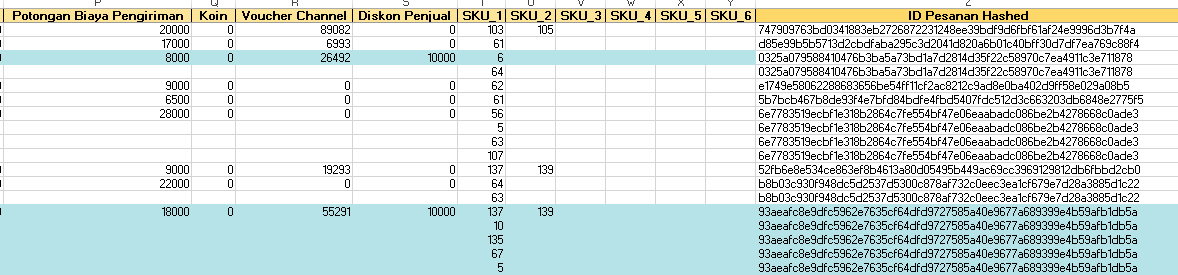

In [ ]:
# Drop kolom yang tidak diperlukan
df = df.drop(columns=['Harga Promosi', 'Jumlah', 'Harga Total Promosi'])

# Memastikan kolom yang diperlukan ada di dataframe
required_columns = ['ID Pesanan Hashed', 'Waktu Pembayaran', 'Variant Produk', 'Harga Awal Produk', 'Total Berat(g)', 'Subtotal', 'Total', 'Biaya Pengiriman', 'Biaya Kirim Ditanggung Pembeli', 'Asuransi', 'Total Diskon', 'Biaya Komisi', 'Biaya Layanan', 'Ongkir Dibayar Sistem', 'Potongan Biaya Pengiriman', 'Koin', 'Voucher Channel', 'Diskon Penjual', 'SKU_1', 'SKU_2', 'SKU_3', 'SKU_4', 'SKU_5', 'SKU_6',
                    'Waktu Pembaruan', 'Sinkronisasi Terakhir', 'Tanggal Pembuatan', 'Jenis Pesanan', 'Channel', 'Nama Toko', 'Pembayaran', 'Waktu Pengiriman', 'Waktu Penyelesaian', 'Alasan Pembatalan', 'Kota']
for column in required_columns:
    if column not in df.columns:
        print(f"Kolom {column} tidak ada dalam dataset")
        exit()

# Grupkan berdasarkan ID Pesanan Hashed dan Waktu Pembayaran
grouped = df.groupby(['ID Pesanan Hashed', 'Waktu Pembayaran'])

# Inisialisasi dataframe baru
new_columns = required_columns + [f'SKU_{i}' for i in range(7, 13)]
new_df = pd.DataFrame(columns=new_columns)

# Iterasi melalui setiap grup dan gabungkan data
for name, group in grouped:
    if len(group) > 1:  # Proses hanya grup yang memiliki lebih dari satu baris
        new_row = {}
        new_row['ID Pesanan Hashed'], new_row['Waktu Pembayaran'] = name

        # Gabungkan semua value string (Variant Produk)
        new_row['Variant Produk'] = ' '.join(group['Variant Produk'].astype(str))

        # Jumlahkan nilai numerik
        for col in ['Harga Awal Produk', 'Total Berat(g)', 'Subtotal', 'Total', 'Biaya Pengiriman', 'Biaya Kirim Ditanggung Pembeli', 'Asuransi', 'Total Diskon', 'Biaya Komisi', 'Biaya Layanan', 'Ongkir Dibayar Sistem', 'Potongan Biaya Pengiriman', 'Koin', 'Voucher Channel', 'Diskon Penjual']:
            new_row[col] = group[col].sum()

        # Gabungkan SKU values tanpa ada missing values
        sku_values = group[['SKU_1', 'SKU_2', 'SKU_3', 'SKU_4', 'SKU_5', 'SKU_6']].values.flatten()
        sku_values = [sku for sku in sku_values if pd.notna(sku)]
        for i in range(1, 13):
            if i <= len(sku_values):
                new_row[f'SKU_{i}'] = sku_values[i-1]
            else:
                new_row[f'SKU_{i}'] = None

        # Mengambil nilai yang pertama untuk kolom-kolom tambahan
        for col in ['Waktu Pembaruan', 'Sinkronisasi Terakhir', 'Tanggal Pembuatan', 'Jenis Pesanan', 'Channel', 'Nama Toko', 'Pembayaran', 'Waktu Pengiriman', 'Waktu Penyelesaian', 'Alasan Pembatalan', 'Kota']:
            new_row[col] = group[col].iloc[0]

        # Append the new row to new_df using pd.concat
        new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index=True)

# Hapus baris yang memiliki duplikasi ID Pesanan Hashed dan Waktu Pembayaran dalam DataFrame asli
df = df[df.duplicated(subset=['ID Pesanan Hashed', 'Waktu Pembayaran'], keep=False) == False]

# Append new_df to the original dataframe using pd.concat
df = pd.concat([df, new_df], ignore_index=True)

# Pindahkan kolom 'ID Pesanan Hashed' ke akhir dataframe
cols = [col for col in df.columns if col != 'ID Pesanan Hashed'] + ['ID Pesanan Hashed']
df = df[cols]

# Simpan dataframe baru ke file csv
df.to_csv('dataset_Clean_ID_Pesanan.csv', index=False)


## Cek Data Yang Sudah Dibersihkan

In [ ]:
df2 = pd.read_csv('dataset_Clean_ID_Pesanan.csv')
df2.tail(10)

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan  \
3302  2024-03-05 07:13:00   2024-03-06 01:24:00  02-03-2024 09:45   
3303  2024-03-25 16:27:00   2024-03-25 16:27:00  18-03-2024 19:57   
3304  2024-04-20 20:36:00   2024-04-20 20:45:00  17-04-2024 21:59   
3305  2024-02-18 18:35:00   2024-02-24 16:09:00  15-02-2024 21:52   
3306  2024-03-14 21:05:00   2024-03-15 05:54:00  13-03-2024 11:41   
3307  2024-04-06 16:42:00   2024-04-06 16:52:00  04-04-2024 17:12   
3308  2024-03-14 20:40:00   2024-03-14 20:40:00  10-03-2024 14:08   
3309  2024-05-14 20:52:00   2024-05-14 20:56:00  12-05-2024 08:21   
3310  2024-04-06 12:38:00   2024-04-06 12:38:00  05-04-2024 05:30   
3311  2024-04-13 15:47:00   2024-04-06 08:36:00  05-04-2024 15:29   

       Jenis Pesanan    Channel Nama Toko      Pembayaran  \
3302  Pesanan Normal   Toko Ijo    Toko 3  Online Payment   
3303  Pesanan Normal   Toko Ijo    Toko 1  Digital Wallet   
3304  Pesanan Normal   Toko Ijo    Toko 1  Digital Wallet   
3305  Pesanan Normal   Toko Ijo    Toko 1  Online Payment   
3306  Pesanan Normal   Toko Ijo    Toko 1          Bank 6   
3307  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet   
3308  Pesanan Normal   Toko Ijo    Toko 1  Online Payment   
3309  Pesanan Normal   Toko Ijo    Toko 1  Online Payment   
3310  Pesanan Normal   Toko Ijo    Toko 1          Kredit   
3311  Pesanan Normal  Toko Biru    Toko 2          Kredit   

         Waktu Pembayaran     Waktu Pengiriman   Waktu Penyelesaian  \
3302  2024-03-02 09:45:00  2024-03-16 01:39:00  2024-03-21 04:20:00   
3303  2024-03-18 19:57:00  2024-03-20 14:35:00  2024-03-25 16:27:00   
3304  2024-04-17 21:59:00  2024-04-18 15:41:00  2024-04-20 20:36:00   
3305  2024-02-16 09:50:00  2024-03-16 01:39:00  2024-02-21 16:26:00   
3306  2024-03-13 11:41:00  2024-03-14 16:18:00  2024-03-14 21:05:00   
3307  2024-04-04 17:12:00  2024-04-05 16:05:00  2024-04-06 16:42:00   
3308  2024-03-10 14:08:00  2024-03-21 06:00:00  2024-03-14 20:40:00   
3309  2024-05-12 08:31:00  2024-05-14 11:58:00  2024-05-14 20:52:00   
3310  2024-04-05 05:31:00  2024-04-05 17:40:00  2024-04-06 12:38:00   
3311  2024-04-05 15:29:00  2024-04-08 08:55:00  2024-04-14 04:06:00   

                                         Variant Produk  Harga Awal Produk  \
3302                                          2pcs 2pcs          2199800.0   
3303                             3pcs Pack @12patch 1pc           110600.0   
3304                               1pc Unit + Aksesoris           269800.0   
3305                                   1pc 3pcs 1pc 1pc          1284500.0   
3306                                      1pc FREE GIFT           209900.0   
3307                  Vanilla,1pc 1pc 1pc Pack @12patch            96700.0   
3308                               1pc Box @84patch 1pc           159800.0   
3309  Unit + Aksesoris Chamomile,1pc Vanilla,+Refill...           320600.0   
3310                           1pc Mix,3pcs + Pipet 1pc           220500.0   
3311  1PC 1 pcs 1PCS Vanilla/1 pcs Chamomile/1 pcs 1...           499050.0   

      Total Berat(g)   Subtotal                               Kota     Total  \
3302           850.0  1103816.0                        KOTA KEDIRI  994360.0   
3303           210.0   107558.0                      KAB. SIDOARJO   94322.0   
3304          1150.0   266780.0                 KOTA JAKARTA UTARA  230369.0   
3305          2610.0  1144049.0                         KAB. TUBAN  993348.0   
3306           750.0   209900.0                 KOTA JAKARTA UTARA  173990.0   
3307           450.0    88720.0                      KAB. SIDOARJO   68469.0   
3308           210.0   159800.0                       KAB. BANDUNG  141444.0   
3309           700.0   303736.0                     KOTA TANGERANG  251731.0   
3310           560.0   198450.0                 KOTA JAKARTA UTARA  171688.0   
3311          1100.0   570870.0  Kota Administrasi Jakarta Selatan  585670.0   

      Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli  

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Waktu Pembaruan                 3312 non-null   object 
 1   Sinkronisasi Terakhir           3312 non-null   object 
 2   Tanggal Pembuatan               3312 non-null   object 
 3   Jenis Pesanan                   3312 non-null   object 
 4   Channel                         3312 non-null   object 
 5   Nama Toko                       3312 non-null   object 
 6   Pembayaran                      3312 non-null   object 
 7   Waktu Pembayaran                3312 non-null   object 
 8   Waktu Pengiriman                3310 non-null   object 
 9   Waktu Penyelesaian              3312 non-null   object 
 10  Variant Produk                  3312 non-null   object 
 11  Harga Awal Produk               3312 non-null   float64
 12  Total Berat(g)                  33

In [ ]:
df2.describe()

Harga Awal Produk  Total Berat(g)      Subtotal         Total  \
count       3.312000e+03     3312.000000  3.312000e+03  3.312000e+03   
mean        3.444204e+05      690.570350  2.995986e+05  2.690407e+05   
std         5.567594e+05      942.898524  4.717736e+05  4.586806e+05   
min         1.490000e+03        1.000000  6.900000e+03 -5.180000e+04   
25%         9.990000e+04      250.000000  8.991000e+04  8.109900e+04   
50%         1.570790e+05      450.000000  1.656000e+05  1.414440e+05   
75%         2.999000e+05      850.000000  3.085300e+05  2.667502e+05   
max         5.499999e+06    10575.000000  5.499999e+06  5.506999e+06   

       Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli      Asuransi  \
count       3312.000000                     3312.000000   3312.000000   
mean        4166.125302                     1986.790761    307.608696   
std        11291.118279                     7732.291009   1463.205034   
min       -35000.000000                        0.000000      0.000000   
25%            0.000000                        0.000000      0.000000   
50%            0.000000                        0.000000      0.000000   
75%            0.000000                        0.000000      0.000000   
max       130800.000000                   175000.000000  23200.000000   

       Total Diskon   Biaya Komisi  Biaya Layanan  Ongkir Dibayar Sistem  \
count  3.312000e+03    3312.000000    3312.000000            3312.000000   
mean   2.001975e+04  -11705.947464   -8665.690821           -2031.444444   
std    9.708864e+04   18486.404609   10260.866271            7805.711082   
min    0.000000e+00 -193135.000000  -95346.000000         -175000.000000   
25%    0.000000e+00  -14240.000000  -11768.500000               0.000000   
50%    8.000000e+03   -5526.500000   -5794.000000               0.000000   
75%    1.472850e+04   -1436.000000   -1771.500000               0.000000   
max    1.980000e+06       0.000000       0.000000               0.000000   

       Potongan Biaya Pengiriman           Koin  Voucher Channel  \
count                3312.000000    3312.000000      3312.000000   
mean                16871.062802    2854.043176      8340.477657   
std                 12966.854731   13643.414679     21186.891555   
min                     0.000000       0.000000         0.000000   
25%                  9000.000000       0.000000         0.000000   
50%                 14000.000000       0.000000         0.000000   
75%                 20000.000000       0.000000      9990.000000   
max                130800.000000  335855.000000    288889.000000   

       Diskon Penjual        SKU_1        SKU_2       SKU_3       SKU_4  \
count    3.312000e+03  3312.000000  1489.000000  637.000000  330.000000   
mean     1.356411e+04    64.773551    77.376763   76.751962   92.048485   
std      9.531442e+04    32.877973    33.833734   32.891589   42.448296   
min      0.000000e+00     0.000000     2.000000    0.000000    0.000000   
25%      0.000000e+00    52.000000    60.000000   59.000000   60.000000   
50%      0.000000e+00    61.000000    63.000000   63.000000   73.000000   
75%      1.000000e+04    77.000000   105.000000  105.000000  145.000000   
max      1.980000e+06   142.000000   148.000000  150.000000  151.000000   

            SKU_5       SKU_6       SKU_7       SKU_8       SKU_9      SKU_10  \
count  162.000000   99.000000   57.000000   31.000000   14.000000   11.000000   
mean    79.598765   79.707071   84.105263   89.709677   96.214286   66.727273   
std     39.033583   40.000575   38.686784   40.005994   36.723873   21.927567   
min      0.000000    5.000000   13.000000   13.000000   38.000000   21.000000   
25%     57.000000   56.000000   59.000000   63.500000   63.250000   59.000000   
50%     67.000000   63.000000   67.000000   67.000000   98.500000   67.000000   
75%    107.000000  107.000000  113.000000  139.500000  123.250000   72.500000   
max    150.000000  153.000000  150.000000  152.000000  154.000000  112.000000 

In [ ]:
df2.isnull().sum()

Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Tanggal Pembuatan                    0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     2
Waktu Penyelesaian                   0
Variant Produk                       0
Harga Awal Produk                    0
Total Berat(g)                       0
Subtotal                             0
Kota                                 0
Total                                0
Biaya Pengiriman                     0
Biaya Kirim Ditanggung Pembeli       0
Asuransi                             0
Total Diskon                         0
Biaya Komisi                         0
Biaya Layanan                        0
Ongkir Dibayar Sistem                0
Potongan Biaya Pengiriman            0
Koin                                 0
Voucher Channel          

## Menambahkan Kolom "is_diskon" pada data yang sudah dibersihkan

Penambahan kolom ini digunakan untuk memudahkan identifikasi pengaruh diskon

In [ ]:
df2['is_diskon'] = np.where(df2['Harga Awal Produk'] > df2['Total'], 'Ya', 'Tidak')

In [ ]:
df2.head()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan  \
0  2024-05-15 09:32:00   2024-05-15 09:35:00  14-05-2024 11:29   
1  2024-05-14 17:45:00   2024-05-14 13:09:00  14-05-2024 10:19   
2  2024-05-15 06:05:00   2024-05-15 06:05:00  14-05-2024 08:16   
3  2024-05-15 11:22:00   2024-05-15 11:27:00  14-05-2024 07:34   
4  2024-05-14 14:03:00   2024-05-14 14:09:00  13-05-2024 12:44   

    Jenis Pesanan    Channel Nama Toko      Pembayaran     Waktu Pembayaran  \
0  Pesanan Normal   Toko Ijo    Toko 1  Online Payment  2024-05-14 11:52:00   
1  Pesanan Normal  Toko Biru    Toko 2          Bank 1  2024-05-14 10:19:00   
2  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet  2024-05-14 08:16:00   
3  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet  2024-05-14 07:34:00   
4  Pesanan Normal   Toko Ijo    Toko 1  Digital Wallet  2024-05-13 12:45:00   

      Waktu Pengiriman   Waktu Penyelesaian       Variant Produk  \
0                  NaN  2024-05-15 09:32:00  COMBO (500ML+330ML)   
1                  NaN  2024-05-15 09:32:00                  1PC   
2  2024-05-14 13:40:00  2024-05-15 06:05:00                  1pc   
3  2024-05-14 13:40:00  2024-05-15 11:22:00                  1pc   
4  2024-05-13 16:39:00  2024-05-14 14:03:00        100ML + 300ML   

   Harga Awal Produk  Total Berat(g)  Subtotal  \
0           989800.0           650.0  890820.0   
1            99900.0           250.0   99900.0   
2            39900.0           250.0   39900.0   
3            99900.0           250.0   99900.0   
4           139800.0           500.0  128616.0   

                                Kota     Total  Biaya Pengiriman  \
0                         KOTA DEPOK  829152.0               0.0   
1  Kota Administrasi Jakarta Selatan  135800.0           35000.0   
2                      KOTA SURABAYA   35431.0               0.0   
3                      KOTA SURABAYA   88711.0               0.0   
4                     KOTA TANGERANG  110224.0               0.0   

   Biaya Kirim Ditanggung Pembeli  Asuransi  Total Diskon  Biaya Komisi  \
0                         29500.0       0.0           0.0      -35633.0   
1                             0.0     900.0       23993.0           0.0   
2                             0.0       0.0           0.0       -1596.0   
3                             0.0       0.0           0.0       -3996.0   
4                             0.0       0.0           0.0      -10932.0   

   Biaya Layanan  Ongkir Dibayar Sistem  Potongan Biaya Pengiriman  Koin  \
0       -26035.0               -29500.0                    20000.0   0.0   
1            0.0                    0.0                    17000.0   0.0   
2        -2873.0                    0.0                     9000.0   0.0   
3        -7193.0                    0.0                     6500.0   0.0   
4        -7460.0                    0.0                     9000.0   0.0   

   Voucher Channel  Diskon Penjual Alasan Pembatalan  SKU_1  SKU_2  SKU_3  \
0          89082.0             0.0               NaN  103.0  105.0    NaN   
1           6993.0             0.0               NaN   61.0    NaN    NaN   
2              0.0             0.0               NaN   62.0    NaN    NaN   
3              0.0             0.0               NaN   61.0    NaN    NaN   
4          19293.0             0.0               NaN  137.0  139.0    NaN   

   SKU_4  SKU_5  SKU_6  SKU_7  SKU_8  SKU_9  SKU_10  SKU_11  SKU_12  \
0    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   

                                   ID Pesanan Hashed is_diskon  
0  747909763bd0341883eb2726872231248ee39bdf9d6fbf...        Ya  
1  d85e99b5b5713d2cbdfaba295c3d2041d820a6b01c40bf...     Tidak  
2  e1749e58062288683656

## Save Dataset Yang Sudah dibersihkan dan diberi tambahan Kolom

In [ ]:
df2.to_csv('dataset_Feature.csv', index=False)

# ***CASE 1***  Produk Suplemen mana yang paling diminati dan mengalami penjualan signifikan di platform e-commerce?

## Exploratory Data Analyst

In [ ]:
# Ubah code ini untuk menyesuaikan Lokasi data anda
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_case1 = pd.read_csv(path_data + 'dataset.csv', parse_dates=['Waktu Pembaruan','Sinkronisasi Terakhir', 'Waktu Pembayaran', 'Waktu Pengiriman', 'Waktu Penyelesaian', 'Kirim Sebelum'])

<ipython-input-284-ffba22e2d37e>:4: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-284-ffba22e2d37e>:4: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-284-ffba22e2d37e>:4: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-284-ffba22e2d37e>:4: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-284-ffba22e2d37e>:4: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format t

In [ ]:
df_case1.head()

NO.  Biaya Kartu Kredit     Waktu Pembaruan Sinkronisasi Terakhir  \
0    1                 0.0 2024-05-15 09:32:00   2024-05-15 09:35:00   
1    2                 0.0 2024-05-14 17:45:00   2024-05-14 13:09:00   
2    3                 0.0 2024-05-15 11:07:00   2024-05-15 11:15:00   
3    3                 NaN 2024-05-15 11:07:00   2024-05-15 11:15:00   
4    4                 0.0 2024-05-15 06:05:00   2024-05-15 06:05:00   

  Adalah Pesanan Palsu Tanggal Pembuatan   Status   Jenis Pesanan    Channel  \
0                Tidak  14-05-2024 11:29  Selesai  Pesanan Normal   Toko Ijo   
1                Tidak  14-05-2024 10:19  Selesai  Pesanan Normal  Toko Biru   
2                Tidak  14-05-2024 09:06  Selesai  Pesanan Normal   Toko Ijo   
3                Tidak  14-05-2024 09:06  Selesai  Pesanan Normal   Toko Ijo   
4                Tidak  14-05-2024 08:16  Selesai  Pesanan Normal   Toko Ijo   

  Nama Toko      Pembayaran    Waktu Pembayaran    Waktu Pengiriman  \
0    Toko 1  Online Payment 2024-05-14 11:52:00                 NaT   
1    Toko 2          Bank 1 2024-05-14 10:19:00                 NaT   
2    Toko 3  Digital Wallet 2024-05-14 09:06:00 2024-05-14 13:40:00   
3    Toko 3  Digital Wallet 2024-05-14 09:06:00 2024-05-14 13:40:00   
4    Toko 3  Digital Wallet 2024-05-14 08:16:00 2024-05-14 13:40:00   

   Waktu Penyelesaian Catatan Pembeli       Variant Produk       Nama Gudang  \
0 2024-05-15 09:32:00             NaN  COMBO (500ML+330ML)  DefaultWarehouse   
1 2024-05-15 09:32:00             NaN                  1PC  DefaultWarehouse   
2 2024-05-15 11:07:00             NaN                 2pcs  DefaultWarehouse   
3 2024-05-15 11:07:00             NaN            1pc 300ML  DefaultWarehouse   
4 2024-05-15 06:05:00             NaN                  1pc  DefaultWarehouse   

  Status Produk  Harga Awal Produk  Harga Promosi  Jumlah Adalah Hadiah  \
0       Selesai           989800.0       890820.0       1         Tidak   
1       Selesai            99900.0        99900.0       1         Tidak   
2       Selesai            79800.0        75012.0       1         Tidak   
3       Selesai           199900.0       199900.0       1         Tidak   
4       Selesai            39900.0        39900.0       1         Tidak   

   Total Berat(g)  Harga Total Promosi  Subtotal                      Invoice  \
0           650.0               890820  890820.0                          NaN   
1           250.0                99900   99900.0  INV/20240514/MPL/3903641486   
2           900.0                75012  274912.0  INV/20240514/MPL/3903641486   
3             NaN               199900       NaN  INV/20240514/MPL/3903641486   
4           250.0                39900   39900.0  INV/20240514/MPL/3903641486   

     Kurir     Provinsi                               Kota       Kecamatan  \
0  Kurir 1   JAWA BARAT                         KOTA DEPOK            BEJI   
1  Kurir 3  DKI Jakarta  Kota Administrasi Jakarta Selatan  Kebayoran Lama   
2  Kurir 2   JAWA TIMUR                      KAB. SIDOARJO        GEDANGAN   
3  Kurir 2   JAWA TIMUR                      KAB. SIDOARJO        GEDANGAN   
4  Kurir 1   JAWA TIMUR                      KOTA SURABAYA          TANDES   

        Kirim Sebelum Mata Uang     Total  Biaya Pengiriman  \
0 2024-05-14 23:59:00       IDR  829152.0               0.0   
1 2024-05-15 16:00:00       IDR  135800.0           35000.0   
2 2024-05-14 23:59:00       IDR  235242.0               0.0   
3 2024-05-14 23:59:00       IDR       NaN               NaN   
4 2024-05-14 23:59:00       IDR   35431.0               0.0   

   Biaya Kirim Ditanggung Pembeli  Pajak  Asuransi  Total Diskon  \
0                         29500.0    0.0       0.0           0.0   
1                             0.0    0.0     900.0       23993.0   
2                             0.0    0.0       0.0       10000.0   
3                             NaN    NaN       NaN           NaN   
4                             0.0    0.0       0.0     

In [ ]:
df_case1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829 entries, 0 to 4828
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NO.                             4829 non-null   int64         
 1   Biaya Kartu Kredit              3312 non-null   float64       
 2   Waktu Pembaruan                 4829 non-null   datetime64[ns]
 3   Sinkronisasi Terakhir           4829 non-null   datetime64[ns]
 4   Adalah Pesanan Palsu            4829 non-null   object        
 5   Tanggal Pembuatan               4829 non-null   object        
 6   Status                          4829 non-null   object        
 7   Jenis Pesanan                   4829 non-null   object        
 8   Channel                         4829 non-null   object        
 9   Nama Toko                       4829 non-null   object        
 10  Pembayaran                      4829 non-null   object        
 11  Wakt

In [ ]:
df_case1.isnull().sum()

NO.                                  0
Biaya Kartu Kredit                1517
Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Adalah Pesanan Palsu                 0
Tanggal Pembuatan                    0
Status                               0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     2
Waktu Penyelesaian                   0
Catatan Pembeli                     37
Variant Produk                       0
Nama Gudang                          0
Status Produk                        0
Harga Awal Produk                   35
Harga Promosi                       32
Jumlah                               0
Adalah Hadiah                        0
Total Berat(g)                    1517
Harga Total Promosi                  0
Subtotal                          1517
Invoice                  

In [ ]:
df_case1.describe()

NO.  Biaya Kartu Kredit             Waktu Pembaruan  \
count  4829.000000              3312.0                        4829   
mean   1644.739076                 0.0  2024-04-03 23:57:15.133568   
min       1.000000                 0.0         2024-02-15 21:57:00   
25%     799.000000                 0.0         2024-03-17 02:35:00   
50%    1651.000000                 0.0         2024-04-03 15:05:00   
75%    2479.000000                 0.0         2024-04-23 22:00:00   
max    3313.000000                 0.0         2024-05-15 13:09:00   
std     956.319890                 0.0                         NaN   

               Sinkronisasi Terakhir               Waktu Pembayaran  \
count                           4829                           4829   
mean   2024-04-04 03:39:35.845930752  2024-03-30 00:23:57.167115520   
min              2024-02-15 15:08:00            2024-02-15 02:37:00   
25%              2024-03-17 03:54:00            2024-03-11 08:05:00   
50%              2024-04-03 18:21:00            2024-03-29 09:20:00   
75%              2024-04-22 09:43:00            2024-04-19 10:13:00   
max              2024-05-15 12:46:00            2024-05-14 11:52:00   
std                              NaN                            NaN   

                    Waktu Pengiriman             Waktu Penyelesaian  \
count                           4827                           4829   
mean   2024-04-04 11:26:28.738346752  2024-04-05 06:28:12.337958144   
min              2024-03-14 15:53:00            2024-02-20 15:25:00   
25%              2024-03-20 14:35:00            2024-03-20 03:53:00   
50%              2024-03-30 16:13:00            2024-04-03 15:05:00   
75%              2024-04-20 14:55:00            2024-04-23 22:58:00   
max              2024-05-14 13:40:00            2024-05-15 12:35:00   
std                              NaN                            NaN   

       Harga Awal Produk  Harga Promosi       Jumlah  Total Berat(g)  \
count       4.794000e+03   4.797000e+03  4829.000000     3312.000000   
mean        2.379475e+05   1.949630e+05     1.106647      690.570350   
min         0.000000e+00   0.000000e+00     1.000000        1.000000   
25%         5.990000e+04   5.000000e+04     1.000000      250.000000   
50%         1.207000e+05   9.990000e+04     1.000000      450.000000   
75%         1.998000e+05   1.838160e+05     1.000000      850.000000   
max         5.499999e+06   5.499999e+06    60.000000    10575.000000   
std         4.079388e+05   3.690355e+05     0.945060      942.898524   

       Harga Total Promosi      Subtotal                  Kirim Sebelum  \
count         4.829000e+03  3.312000e+03                           4829   
mean          2.056060e+05  2.995986e+05  2024-04-01 21:56:08.573203456   
min           0.000000e+00  6.900000e+03            2024-02-16 16:00:00   
25%           5.339200e+04  8.991000e+04            2024-03-13 22:03:00   
50%           1.086300e+05  1.656000e+05            2024-04-02 04:54:00   
75%           1.878120e+05  3.085300e+05            2024-04-22 23:30:00   
max           5.499999e+06  5.499999e+06            2024-06-26 10:51:00   
std           3.735183e+05  4.717736e+05                            NaN   

              Total  Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli   Pajak  \
count  3.312000e+03       3312.000000                     3312.000000  3312.0   
mean   2.690407e+05       4166.125302                     1986.790761     0.0   
min   -5.180000e+04     -35000.000000                        0.000000     0.0   
25%    8.109900e+04          0.000000                        0.000000     0.0   
50%    1.414440e+05          0.000000                        0.000000     0.0   
75%    2.667502e+05          0.000000                        0.000000     0.0   
max    5.506999e+06     130800.000000                   175000.000000     0.0   
std    4.586806e+05      11291.118279                     7732.291009     0.0   

           Asuransi  Total Diskon  Subsidi Market

## Feature Engineering

***Kolom Yang Dihapus***
1. 'NO.' : Hanya menandakan urutan
2. 'Biaya Kartu Kredit' : Semua bernilai 0/null val
3. 'Adalah Pesanan Palsu' : Semua Tidak
3. 'Status': Semua Selesai
4. 'Nama Gudang' : Semua DefaultWareHaouse
5. 'Status Produk' : Semua Selesai (Kecuali 5 refund, itupun id yang sama)
6. 'Adalah Hadiah' : Semua Tidak
7. 'Mata Uang': Semua IDR
8. 'Pajak': Semua bernilai 0/null value
9. 'Subsidi Marketplace' : Semuanya 0/null value
10. 'Potongan Harga' : Semuanya 0/null value
11. 'Koin Cashback Penjual' : Semuanya 0/null value
12. 'Jumlah Pengembalian Dana': Semuanya 0/null value
13. 'Biaya Layanan Kartu Kredit' : Semuanya 0/null value
14. 'Catatan Pembeli': karena String dan tidak terlalu variatif
15. 'Catatan Penjual' : Karena String dan tidak terlalu variatif
16. 'Waktu Pembatalan' : Semuanya 0/null value
17. 'Alamat Penerima Encoded' : Hashed
18. 'ID Pesanan Hashed' : Hashed

In [ ]:
df_case1.drop(columns=['NO.','Biaya Kartu Kredit','Adalah Pesanan Palsu','Status','Nama Gudang','Status Produk','Adalah Hadiah','Mata Uang','Pajak','Subsidi Marketplace','Potongan Harga','Koin Cashback Penjual','Jumlah Pengembalian Dana','Biaya Layanan Kartu Kredit','Catatan Pembeli','Catatan Penjual','Waktu Pembatalan','Alamat Penerima Encoded','ID Pesanan Hashed'], inplace=True)

In [ ]:
df_case1.head()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan   Jenis Pesanan  \
0 2024-05-15 09:32:00   2024-05-15 09:35:00  14-05-2024 11:29  Pesanan Normal   
1 2024-05-14 17:45:00   2024-05-14 13:09:00  14-05-2024 10:19  Pesanan Normal   
2 2024-05-15 11:07:00   2024-05-15 11:15:00  14-05-2024 09:06  Pesanan Normal   
3 2024-05-15 11:07:00   2024-05-15 11:15:00  14-05-2024 09:06  Pesanan Normal   
4 2024-05-15 06:05:00   2024-05-15 06:05:00  14-05-2024 08:16  Pesanan Normal   

     Channel Nama Toko      Pembayaran    Waktu Pembayaran  \
0   Toko Ijo    Toko 1  Online Payment 2024-05-14 11:52:00   
1  Toko Biru    Toko 2          Bank 1 2024-05-14 10:19:00   
2   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 09:06:00   
3   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 09:06:00   
4   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 08:16:00   

     Waktu Pengiriman  Waktu Penyelesaian       Variant Produk  \
0                 NaT 2024-05-15 09:32:00  COMBO (500ML+330ML)   
1                 NaT 2024-05-15 09:32:00                  1PC   
2 2024-05-14 13:40:00 2024-05-15 11:07:00                 2pcs   
3 2024-05-14 13:40:00 2024-05-15 11:07:00            1pc 300ML   
4 2024-05-14 13:40:00 2024-05-15 06:05:00                  1pc   

   Harga Awal Produk  Harga Promosi  Jumlah  Total Berat(g)  \
0           989800.0       890820.0       1           650.0   
1            99900.0        99900.0       1           250.0   
2            79800.0        75012.0       1           900.0   
3           199900.0       199900.0       1             NaN   
4            39900.0        39900.0       1           250.0   

   Harga Total Promosi  Subtotal                      Invoice    Kurir  \
0               890820  890820.0                          NaN  Kurir 1   
1                99900   99900.0  INV/20240514/MPL/3903641486  Kurir 3   
2                75012  274912.0  INV/20240514/MPL/3903641486  Kurir 2   
3               199900       NaN  INV/20240514/MPL/3903641486  Kurir 2   
4                39900   39900.0  INV/20240514/MPL/3903641486  Kurir 1   

      Provinsi                               Kota       Kecamatan  \
0   JAWA BARAT                         KOTA DEPOK            BEJI   
1  DKI Jakarta  Kota Administrasi Jakarta Selatan  Kebayoran Lama   
2   JAWA TIMUR                      KAB. SIDOARJO        GEDANGAN   
3   JAWA TIMUR                      KAB. SIDOARJO        GEDANGAN   
4   JAWA TIMUR                      KOTA SURABAYA          TANDES   

        Kirim Sebelum     Total  Biaya Pengiriman  \
0 2024-05-14 23:59:00  829152.0               0.0   
1 2024-05-15 16:00:00  135800.0           35000.0   
2 2024-05-14 23:59:00  235242.0               0.0   
3 2024-05-14 23:59:00       NaN               NaN   
4 2024-05-14 23:59:00   35431.0               0.0   

   Biaya Kirim Ditanggung Pembeli  Asuransi  Total Diskon  Biaya Komisi  \
0                         29500.0       0.0           0.0      -35633.0   
1                             0.0     900.0       23993.0           0.0   
2                             0.0       0.0       10000.0      -10596.0   
3                             NaN       NaN           NaN           NaN   
4                             0.0       0.0           0.0       -1596.0   

   Biaya Layanan  Ongkir Dibayar Sistem  Potongan Biaya Pengiriman  Koin  \
0       -26035.0               -29500.0                    20000.0   0.0   
1            0.0                    0.0                    17000.0   0.0   
2       -19074.0                    0.0                     8000.0   0.0   
3            NaN                    NaN                        NaN   NaN   
4        -2873.0                    0.0                     9000.0   0.0   

   Voucher Channel  Diskon Penjual Status Label Pengiriman Status Invoice  \
0          89082.0             0.0           Belum Dicetak  Belum Dicetak   
1           6993.0             0.0           Belum Dicetak  Belum Dicetak   
2          26492.0         10000.0         Sedang me

In [ ]:
df_case1.describe()

Waktu Pembaruan          Sinkronisasi Terakhir  \
count                        4829                           4829   
mean   2024-04-03 23:57:15.133568  2024-04-04 03:39:35.845930752   
min           2024-02-15 21:57:00            2024-02-15 15:08:00   
25%           2024-03-17 02:35:00            2024-03-17 03:54:00   
50%           2024-04-03 15:05:00            2024-04-03 18:21:00   
75%           2024-04-23 22:00:00            2024-04-22 09:43:00   
max           2024-05-15 13:09:00            2024-05-15 12:46:00   
std                           NaN                            NaN   

                    Waktu Pembayaran               Waktu Pengiriman  \
count                           4829                           4827   
mean   2024-03-30 00:23:57.167115520  2024-04-04 11:26:28.738346752   
min              2024-02-15 02:37:00            2024-03-14 15:53:00   
25%              2024-03-11 08:05:00            2024-03-20 14:35:00   
50%              2024-03-29 09:20:00            2024-03-30 16:13:00   
75%              2024-04-19 10:13:00            2024-04-20 14:55:00   
max              2024-05-14 11:52:00            2024-05-14 13:40:00   
std                              NaN                            NaN   

                  Waktu Penyelesaian  Harga Awal Produk  Harga Promosi  \
count                           4829       4.794000e+03   4.797000e+03   
mean   2024-04-05 06:28:12.337958144       2.379475e+05   1.949630e+05   
min              2024-02-20 15:25:00       0.000000e+00   0.000000e+00   
25%              2024-03-20 03:53:00       5.990000e+04   5.000000e+04   
50%              2024-04-03 15:05:00       1.207000e+05   9.990000e+04   
75%              2024-04-23 22:58:00       1.998000e+05   1.838160e+05   
max              2024-05-15 12:35:00       5.499999e+06   5.499999e+06   
std                              NaN       4.079388e+05   3.690355e+05   

            Jumlah  Total Berat(g)  Harga Total Promosi      Subtotal  \
count  4829.000000     3312.000000         4.829000e+03  3.312000e+03   
mean      1.106647      690.570350         2.056060e+05  2.995986e+05   
min       1.000000        1.000000         0.000000e+00  6.900000e+03   
25%       1.000000      250.000000         5.339200e+04  8.991000e+04   
50%       1.000000      450.000000         1.086300e+05  1.656000e+05   
75%       1.000000      850.000000         1.878120e+05  3.085300e+05   
max      60.000000    10575.000000         5.499999e+06  5.499999e+06   
std       0.945060      942.898524         3.735183e+05  4.717736e+05   

                       Kirim Sebelum         Total  Biaya Pengiriman  \
count                           4829  3.312000e+03       3312.000000   
mean   2024-04-01 21:56:08.573203456  2.690407e+05       4166.125302   
min              2024-02-16 16:00:00 -5.180000e+04     -35000.000000   
25%              2024-03-13 22:03:00  8.109900e+04          0.000000   
50%              2024-04-02 04:54:00  1.414440e+05          0.000000   
75%              2024-04-22 23:30:00  2.667502e+05          0.000000   
max              2024-06-26 10:51:00  5.506999e+06     130800.000000   
std                              NaN  4.586806e+05      11291.118279   

       Biaya Kirim Ditanggung Pembeli      Asuransi  Total Diskon  \
count                     3312.000000   3312.000000  3.312000e+03   
mean                      1986.790761    307.608696  2.001975e+04   
min                          0.000000      0.000000  0.000000e+00   
25%                          0.000000      0.000000  0.000000e+00   
50%                          0.000000      0.000000  8.000000e+03   
75%                          0.000000      0.000000  1.472850e+04   
max                     175000.000000  23200.000000  1.980000e+06   
std                       7732.291009   1463.205034  9.708864e+04   

        Biaya Komisi  Biaya Layanan  Ongkir Dibayar Sistem  \
count    3312.000000    3312.000000            3312.000000   
mean   -11705.947464   -8665.690821          

In [ ]:
df_case1.isnull().sum()

Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Tanggal Pembuatan                    0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     2
Waktu Penyelesaian                   0
Variant Produk                       0
Harga Awal Produk                   35
Harga Promosi                       32
Jumlah                               0
Total Berat(g)                    1517
Harga Total Promosi                  0
Subtotal                          1517
Invoice                              1
Kurir                                0
Provinsi                             0
Kota                                 0
Kecamatan                            0
Kirim Sebelum                        0
Total                             1517
Biaya Pengiriman                  1517
Biaya Kirim Ditanggung Pe

## HANDLING MISSING VALUE

### Handling Missing Value "Waktu Pengiriman"

In [ ]:
fill_Waktu_Pengiriman  = '14-05-2024 13:40'
df_case1['Waktu Pengiriman'].fillna(fill_Waktu_Pengiriman, inplace =True)

In [ ]:
df_case1['Waktu Pengiriman'].head()

0   2024-05-14 13:40:00
1   2024-05-14 13:40:00
2   2024-05-14 13:40:00
3   2024-05-14 13:40:00
4   2024-05-14 13:40:00
Name: Waktu Pengiriman, dtype: datetime64[ns]

### Handling Missing Value "Invoice"

In [ ]:
fill_Invoice  = 'INV/20240514/MPL/3903641486'
df_case1['Invoice'].fillna(fill_Invoice, inplace =True)

In [ ]:
df_case1['Invoice'].isnull().sum()

0

In [ ]:
df_case1['Invoice'].head()

0    INV/20240514/MPL/3903641486
1    INV/20240514/MPL/3903641486
2    INV/20240514/MPL/3903641486
3    INV/20240514/MPL/3903641486
4    INV/20240514/MPL/3903641486
Name: Invoice, dtype: object

### Handling Missing Value "Alasan Pembatalan"bold text

In [ ]:
df_case1['Alasan Pembatalan'].value_counts()

Alasan Pembatalan
Others / change of mind                                         2646
Modify existing order (colour, size, address, voucher, etc.)    2061
Name: count, dtype: int64

In [ ]:
fill_Alasan_Pembatalan = 'Others / change of mind '
df_case1['Alasan Pembatalan'].fillna(fill_Alasan_Pembatalan, inplace =True)

In [ ]:
df_case1['Alasan Pembatalan'].isnull().sum()

0

### Cek Data

In [ ]:
df_case1.isnull().sum()

Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Tanggal Pembuatan                    0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     0
Waktu Penyelesaian                   0
Variant Produk                       0
Harga Awal Produk                   35
Harga Promosi                       32
Jumlah                               0
Total Berat(g)                    1517
Harga Total Promosi                  0
Subtotal                          1517
Invoice                              0
Kurir                                0
Provinsi                             0
Kota                                 0
Kecamatan                            0
Kirim Sebelum                        0
Total                             1517
Biaya Pengiriman                  1517
Biaya Kirim Ditanggung Pe

In [ ]:
df_case1.head()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan   Jenis Pesanan  \
0 2024-05-15 09:32:00   2024-05-15 09:35:00  14-05-2024 11:29  Pesanan Normal   
1 2024-05-14 17:45:00   2024-05-14 13:09:00  14-05-2024 10:19  Pesanan Normal   
2 2024-05-15 11:07:00   2024-05-15 11:15:00  14-05-2024 09:06  Pesanan Normal   
3 2024-05-15 11:07:00   2024-05-15 11:15:00  14-05-2024 09:06  Pesanan Normal   
4 2024-05-15 06:05:00   2024-05-15 06:05:00  14-05-2024 08:16  Pesanan Normal   

     Channel Nama Toko      Pembayaran    Waktu Pembayaran  \
0   Toko Ijo    Toko 1  Online Payment 2024-05-14 11:52:00   
1  Toko Biru    Toko 2          Bank 1 2024-05-14 10:19:00   
2   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 09:06:00   
3   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 09:06:00   
4   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 08:16:00   

     Waktu Pengiriman  Waktu Penyelesaian       Variant Produk  \
0 2024-05-14 13:40:00 2024-05-15 09:32:00  COMBO (500ML+330ML)   
1 2024-05-14 13:40:00 2024-05-15 09:32:00                  1PC   
2 2024-05-14 13:40:00 2024-05-15 11:07:00                 2pcs   
3 2024-05-14 13:40:00 2024-05-15 11:07:00            1pc 300ML   
4 2024-05-14 13:40:00 2024-05-15 06:05:00                  1pc   

   Harga Awal Produk  Harga Promosi  Jumlah  Total Berat(g)  \
0           989800.0       890820.0       1           650.0   
1            99900.0        99900.0       1           250.0   
2            79800.0        75012.0       1           900.0   
3           199900.0       199900.0       1             NaN   
4            39900.0        39900.0       1           250.0   

   Harga Total Promosi  Subtotal                      Invoice    Kurir  \
0               890820  890820.0  INV/20240514/MPL/3903641486  Kurir 1   
1                99900   99900.0  INV/20240514/MPL/3903641486  Kurir 3   
2                75012  274912.0  INV/20240514/MPL/3903641486  Kurir 2   
3               199900       NaN  INV/20240514/MPL/3903641486  Kurir 2   
4                39900   39900.0  INV/20240514/MPL/3903641486  Kurir 1   

      Provinsi                               Kota       Kecamatan  \
0   JAWA BARAT                         KOTA DEPOK            BEJI   
1  DKI Jakarta  Kota Administrasi Jakarta Selatan  Kebayoran Lama   
2   JAWA TIMUR                      KAB. SIDOARJO        GEDANGAN   
3   JAWA TIMUR                      KAB. SIDOARJO        GEDANGAN   
4   JAWA TIMUR                      KOTA SURABAYA          TANDES   

        Kirim Sebelum     Total  Biaya Pengiriman  \
0 2024-05-14 23:59:00  829152.0               0.0   
1 2024-05-15 16:00:00  135800.0           35000.0   
2 2024-05-14 23:59:00  235242.0               0.0   
3 2024-05-14 23:59:00       NaN               NaN   
4 2024-05-14 23:59:00   35431.0               0.0   

   Biaya Kirim Ditanggung Pembeli  Asuransi  Total Diskon  Biaya Komisi  \
0                         29500.0       0.0           0.0      -35633.0   
1                             0.0     900.0       23993.0           0.0   
2                             0.0       0.0       10000.0      -10596.0   
3                             NaN       NaN           NaN           NaN   
4                             0.0       0.0           0.0       -1596.0   

   Biaya Layanan  Ongkir Dibayar Sistem  Potongan Biaya Pengiriman  Koin  \
0       -26035.0               -29500.0                    20000.0   0.0   
1            0.0                    0.0                    17000.0   0.0   
2       -19074.0                    0.0                     8000.0   0.0   
3            NaN                    NaN                        NaN   NaN   
4        -2873.0                    0.0                     9000.0   0.0   

   Voucher Channel  Diskon Penjual Status Label Pengiriman Status Invoice  \
0          89082.0             0.0           Belum Dicetak  Belum Dicetak   
1           6993.0             0.0           Belum Dicetak  Belum Dicetak   
2          26492.0         10000.0         Sedang me

## Study Case



(Suplement Mana Yang Paling Di Minati Dan Mengalami Penjualan Signifikan DI Marketplace)

### Label Encoding

In [ ]:
df_case1['Status Packing List'].value_counts()

Status Packing List
Belum Dicetak      4828
Sedang mencetak       1
Name: count, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
df_case1['Jenis Pesanan'] = label_encoder.fit_transform(df_case1['Jenis Pesanan'])
df_case1['Channel'] = label_encoder.fit_transform(df_case1['Channel'])
df_case1['Nama Toko'] = label_encoder.fit_transform(df_case1['Nama Toko'])
df_case1['Pembayaran'] = label_encoder.fit_transform(df_case1['Pembayaran'])
df_case1['Kurir'] = label_encoder.fit_transform(df_case1['Kurir'])
df_case1['Status Label Pengiriman'] = label_encoder.fit_transform(df_case1['Status Label Pengiriman'])
df_case1['Status Invoice'] = label_encoder.fit_transform(df_case1['Status Invoice'])
df_case1['Status Packing List'] = label_encoder.fit_transform(df_case1['Status Packing List'])

In [ ]:
df_case1.head()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan  Jenis Pesanan  \
0 2024-05-15 09:32:00   2024-05-15 09:35:00  14-05-2024 11:29              0   
1 2024-05-14 17:45:00   2024-05-14 13:09:00  14-05-2024 10:19              0   
2 2024-05-15 11:07:00   2024-05-15 11:15:00  14-05-2024 09:06              0   
3 2024-05-15 11:07:00   2024-05-15 11:15:00  14-05-2024 09:06              0   
4 2024-05-15 06:05:00   2024-05-15 06:05:00  14-05-2024 08:16              0   

   Channel  Nama Toko  Pembayaran    Waktu Pembayaran    Waktu Pengiriman  \
0        1          0          17 2024-05-14 11:52:00 2024-05-14 13:40:00   
1        0          1           0 2024-05-14 10:19:00 2024-05-14 13:40:00   
2        1          2          14 2024-05-14 09:06:00 2024-05-14 13:40:00   
3        1          2          14 2024-05-14 09:06:00 2024-05-14 13:40:00   
4        1          2          14 2024-05-14 08:16:00 2024-05-14 13:40:00   

   Waktu Penyelesaian       Variant Produk  Harga Awal Produk  Harga Promosi  \
0 2024-05-15 09:32:00  COMBO (500ML+330ML)           989800.0       890820.0   
1 2024-05-15 09:32:00                  1PC            99900.0        99900.0   
2 2024-05-15 11:07:00                 2pcs            79800.0        75012.0   
3 2024-05-15 11:07:00            1pc 300ML           199900.0       199900.0   
4 2024-05-15 06:05:00                  1pc            39900.0        39900.0   

   Jumlah  Total Berat(g)  Harga Total Promosi  Subtotal  \
0       1           650.0               890820  890820.0   
1       1           250.0                99900   99900.0   
2       1           900.0                75012  274912.0   
3       1             NaN               199900       NaN   
4       1           250.0                39900   39900.0   

                       Invoice  Kurir     Provinsi  \
0  INV/20240514/MPL/3903641486      0   JAWA BARAT   
1  INV/20240514/MPL/3903641486      5  DKI Jakarta   
2  INV/20240514/MPL/3903641486      4   JAWA TIMUR   
3  INV/20240514/MPL/3903641486      4   JAWA TIMUR   
4  INV/20240514/MPL/3903641486      0   JAWA TIMUR   

                                Kota       Kecamatan       Kirim Sebelum  \
0                         KOTA DEPOK            BEJI 2024-05-14 23:59:00   
1  Kota Administrasi Jakarta Selatan  Kebayoran Lama 2024-05-15 16:00:00   
2                      KAB. SIDOARJO        GEDANGAN 2024-05-14 23:59:00   
3                      KAB. SIDOARJO        GEDANGAN 2024-05-14 23:59:00   
4                      KOTA SURABAYA          TANDES 2024-05-14 23:59:00   

      Total  Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli  Asuransi  \
0  829152.0               0.0                         29500.0       0.0   
1  135800.0           35000.0                             0.0     900.0   
2  235242.0               0.0                             0.0       0.0   
3       NaN               NaN                             NaN       NaN   
4   35431.0               0.0                             0.0       0.0   

   Total Diskon  Biaya Komisi  Biaya Layanan  Ongkir Dibayar Sistem  \
0           0.0      -35633.0       -26035.0               -29500.0   
1       23993.0           0.0            0.0                    0.0   
2       10000.0      -10596.0       -19074.0                    0.0   
3           NaN           NaN            NaN                    NaN   
4           0.0       -1596.0        -2873.0                    0.0   

   Potongan Biaya Pengiriman  Koin  Voucher Channel  Diskon Penjual  \
0                    20000.0   0.0          89082.0             0.0   
1                    17000.0   0.0           6993.0             0.0   
2                     8000.0   0.0          26492.0         10000.0   
3                        NaN   NaN              NaN             NaN   
4                     9000.0   0.0              0.0             0.0   

   Status Label Pengiriman  Status Invoice  Status Packing List  \
0                        0               0                    0   

### TOP 5 Penjualan SKU 1

In [ ]:
# Filter untuk Channel 0 dan Channel 1
df_channel_0 = df_case1[df_case1['Channel'] == 0]
df_channel_1 = df_case1[df_case1['Channel'] == 1]

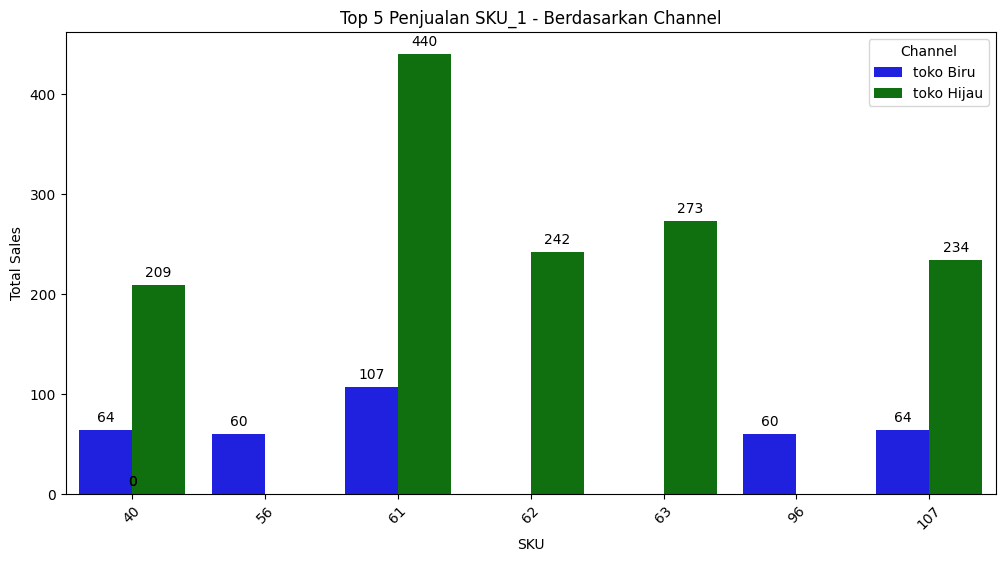

In [ ]:
# Gabung Data Channel 0 dan 1
df_both_channels = pd.concat([df_channel_0, df_channel_1])

# Ubah Data Dulu, Berdasarkan SKU
df_SKU_1_both = df_both_channels.melt(id_vars=['Jumlah', 'Channel'], value_vars=['SKU_1'], var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Jumlahin semua value "Jumlah"
SKU_1_sales_both = df_SKU_1_both.groupby(['SKU', 'Channel'])['Jumlah'].sum().reset_index()

# Ambil top 5 SKU teratas berdasarkan total "jumlah" penjualan untuk masing-masing channel
top_SKU_1_both = SKU_1_sales_both.groupby('Channel').apply(lambda x: x.nlargest(5, 'Jumlah')).reset_index(drop=True)

# Tambahkan kolom baru untuk nama channel
channel_names = {0: 'toko Biru', 1: 'toko Hijau'}
top_SKU_1_both['Channel_Name'] = top_SKU_1_both['Channel'].map(channel_names)

# Tentukan warna untuk setiap channel
palette = {'toko Biru': 'Blue', 'toko Hijau': 'Green'}

# Plot barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='SKU', y='Jumlah', hue='Channel_Name', data=top_SKU_1_both, palette=palette)

# Tambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Top 5 Penjualan SKU_1 - Berdasarkan Channel')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()


### TOP 5 PENJUALAN SKU 2

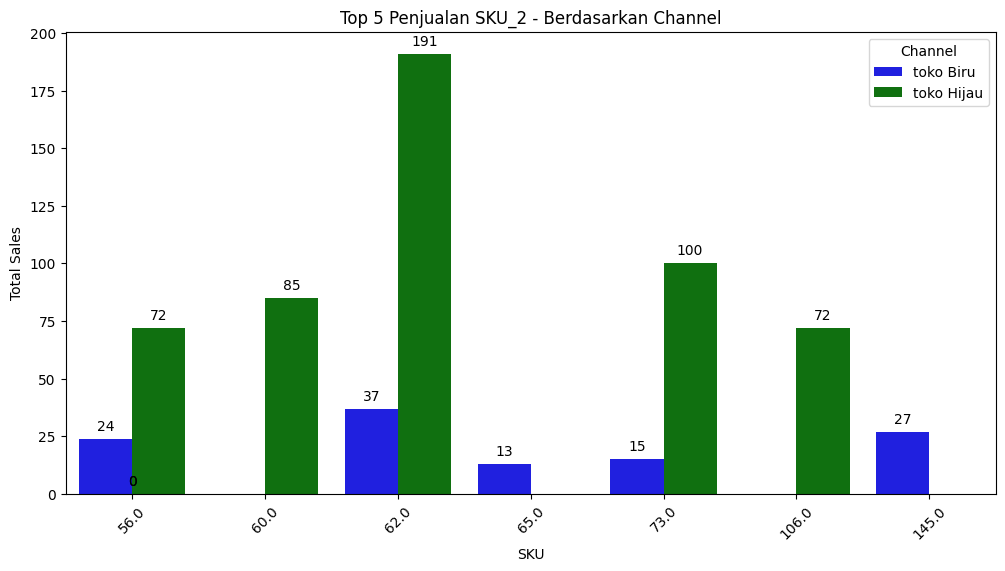

In [ ]:
# Gabung Data Channel 0 dan 1
df_both_channels = pd.concat([df_channel_0, df_channel_1])

# Ubah Data Dulu, Berdasarkan SKU
df_SKU_2_both = df_both_channels.melt(id_vars=['Jumlah', 'Channel'], value_vars=['SKU_2'], var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Jumlahin semua value "Jumlah"
SKU_2_sales_both = df_SKU_2_both.groupby(['SKU', 'Channel'])['Jumlah'].sum().reset_index()

# Ambil top 5 SKU teratas berdasarkan total "jumlah" penjualan untuk masing-masing channel
top_SKU_2_both = SKU_2_sales_both.groupby('Channel').apply(lambda x: x.nlargest(5, 'Jumlah')).reset_index(drop=True)

# Tambahkan kolom baru untuk nama channel
channel_names = {0: 'toko Biru', 1: 'toko Hijau'}
top_SKU_2_both['Channel_Name'] = top_SKU_2_both['Channel'].map(channel_names)

# Tentukan warna untuk setiap channel
palette = {'toko Biru': 'Blue', 'toko Hijau': 'Green'}

# Plot barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='SKU', y='Jumlah', hue='Channel_Name', data=top_SKU_2_both, palette=palette)

# Tambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Top 5 Penjualan SKU_2 - Berdasarkan Channel')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()


### TOP 5 PENJUALAN SKU 3

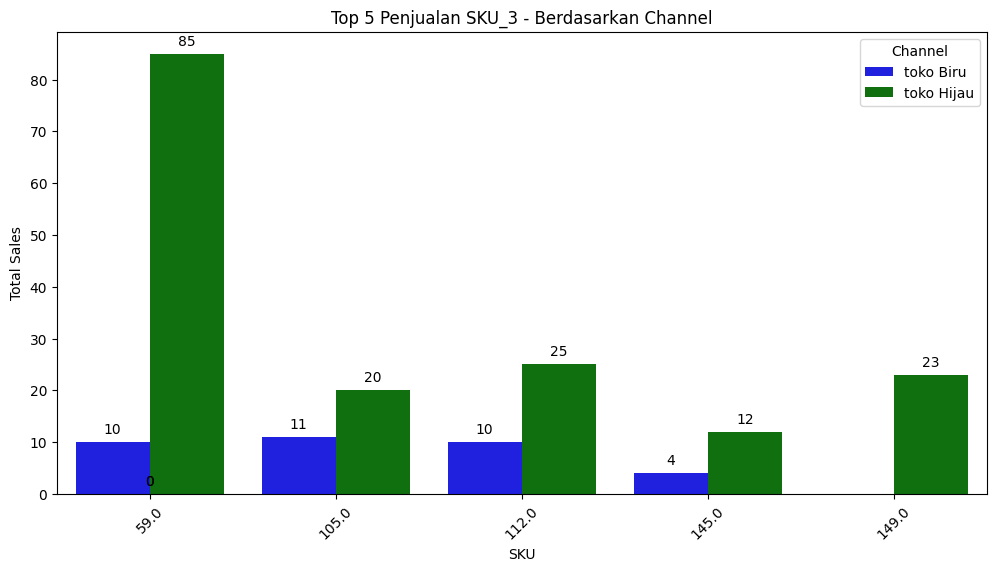

In [ ]:
# Gabung Data Channel 0 dan 1
df_both_channels = pd.concat([df_channel_0, df_channel_1])

# Ubah Data Dulu, Berdasarkan SKU
df_SKU_3_both = df_both_channels.melt(id_vars=['Jumlah', 'Channel'], value_vars=['SKU_3'], var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Jumlahin semua value "Jumlah"
SKU_3_sales_both = df_SKU_3_both.groupby(['SKU', 'Channel'])['Jumlah'].sum().reset_index()

# Ambil top 5 SKU teratas berdasarkan total "jumlah" penjualan untuk masing-masing channel
top_SKU_3_both = SKU_3_sales_both.groupby('Channel').apply(lambda x: x.nlargest(5, 'Jumlah')).reset_index(drop=True)

# Tambahkan kolom baru untuk nama channel
channel_names = {0: 'toko Biru', 1: 'toko Hijau'}
top_SKU_3_both['Channel_Name'] = top_SKU_3_both['Channel'].map(channel_names)

# Tentukan warna untuk setiap channel
palette = {'toko Biru': 'Blue', 'toko Hijau': 'Green'}

# Plot barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='SKU', y='Jumlah', hue='Channel_Name', data=top_SKU_3_both, palette=palette)

# Tambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Top 5 Penjualan SKU_3 - Berdasarkan Channel')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()


### TOP 5 PENJUALAN SKU 4

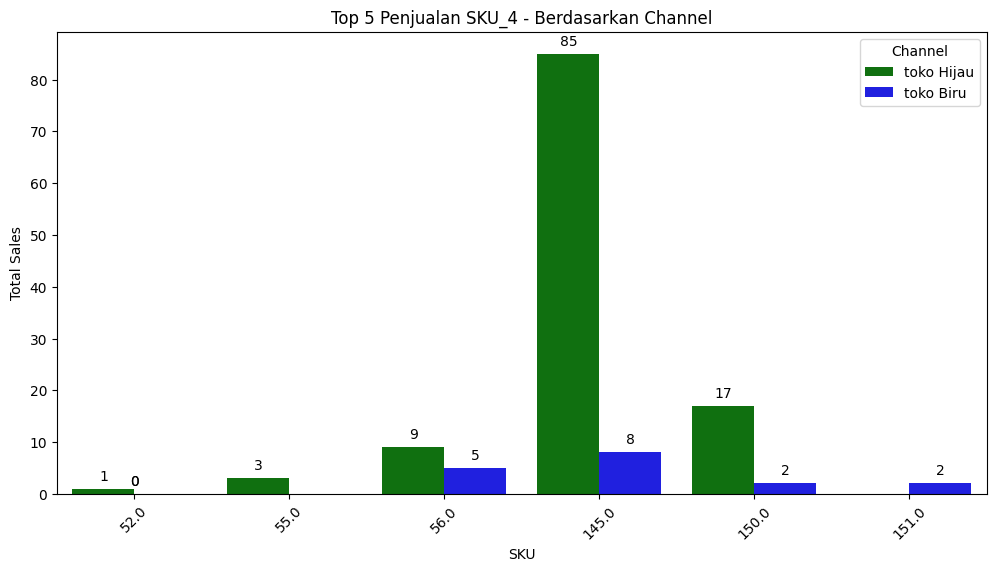

In [ ]:
# Gabung Data Channel 0 dan 1
df_both_channels = pd.concat([df_channel_0, df_channel_1])

# Ubah Data Dulu, Berdasarkan SKU
df_SKU_4_both = df_both_channels.melt(id_vars=['Jumlah', 'Channel'], value_vars=['SKU_4'], var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Jumlahin semua value "Jumlah"
SKU_4_sales_both = df_SKU_4_both.groupby(['SKU', 'Channel'])['Jumlah'].sum().reset_index()

# Ambil top 5 SKU teratas berdasarkan total "jumlah" penjualan untuk masing-masing channel
top_SKU_4_both = SKU_4_sales_both.groupby('Channel').apply(lambda x: x.nlargest(5, 'Jumlah')).reset_index(drop=True)

# Tambahkan kolom baru untuk nama channel
channel_names = {0: 'toko Biru', 1: 'toko Hijau'}
top_SKU_4_both['Channel_Name'] = top_SKU_4_both['Channel'].map(channel_names)

# Tentukan warna untuk setiap channel
palette = {'toko Biru': 'Blue', 'toko Hijau': 'Green'}

# Plot barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='SKU', y='Jumlah', hue='Channel_Name', data=top_SKU_4_both, palette=palette)

# Tambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Top 5 Penjualan SKU_4 - Berdasarkan Channel')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()


### TOP 5 PENJUALAN SKU 5

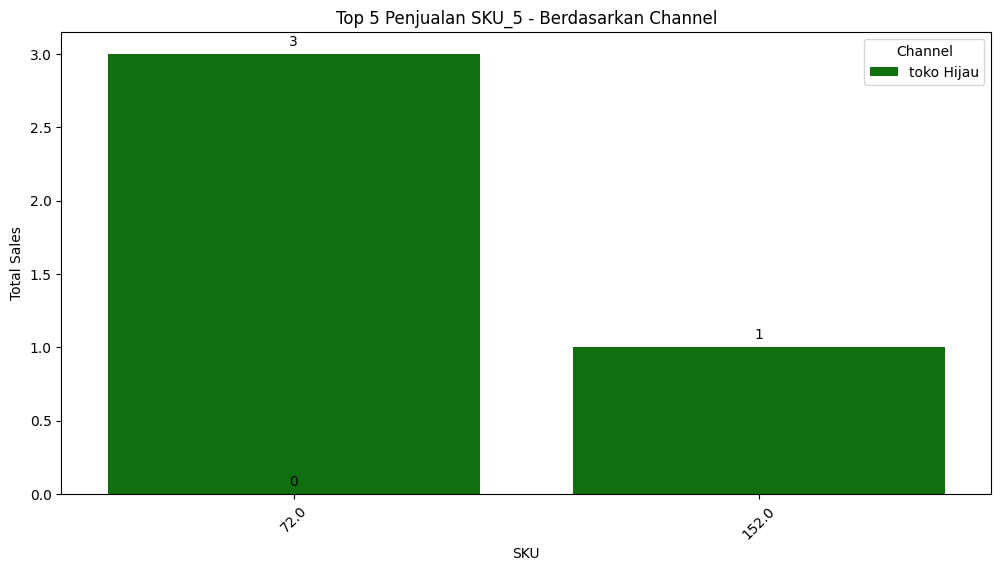

In [ ]:
# Gabung Data Channel 0 dan 1
df_both_channels = pd.concat([df_channel_0, df_channel_1])

# Ubah Data Dulu, Berdasarkan SKU
df_SKU_5_both = df_both_channels.melt(id_vars=['Jumlah', 'Channel'], value_vars=['SKU_5'], var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Jumlahin semua value "Jumlah"
SKU_5_sales_both = df_SKU_5_both.groupby(['SKU', 'Channel'])['Jumlah'].sum().reset_index()

# Ambil top 5 SKU teratas berdasarkan total "jumlah" penjualan untuk masing-masing channel
top_SKU_5_both = SKU_5_sales_both.groupby('Channel').apply(lambda x: x.nlargest(5, 'Jumlah')).reset_index(drop=True)

# Tambahkan kolom baru untuk nama channel
channel_names = {0: 'toko Biru', 1: 'toko Hijau'}
top_SKU_5_both['Channel_Name'] = top_SKU_5_both['Channel'].map(channel_names)

# Tentukan warna untuk setiap channel
palette = {'toko Biru': 'Blue', 'toko Hijau': 'Green'}

# Plot barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='SKU', y='Jumlah', hue='Channel_Name', data=top_SKU_5_both, palette=palette)

# Tambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Top 5 Penjualan SKU_5 - Berdasarkan Channel')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()


### TOP 5 PENJUALAN SKU 6

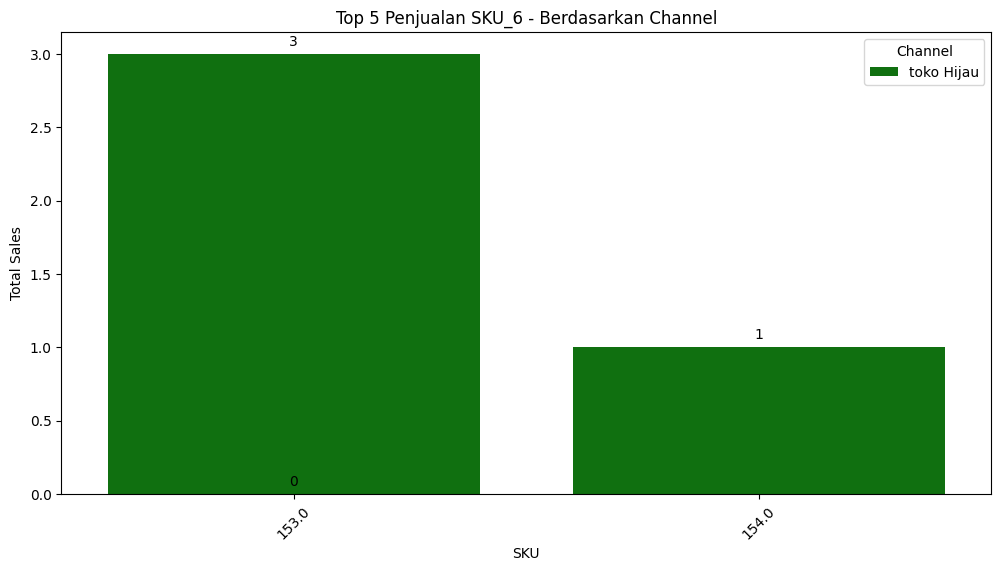

In [ ]:
# Gabung Data Channel 0 dan 1
df_both_channels = pd.concat([df_channel_0, df_channel_1])

# Ubah Data Dulu, Berdasarkan SKU
df_SKU_6_both = df_both_channels.melt(id_vars=['Jumlah', 'Channel'], value_vars=['SKU_6'], var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Jumlahin semua value "Jumlah"
SKU_6_sales_both = df_SKU_6_both.groupby(['SKU', 'Channel'])['Jumlah'].sum().reset_index()

# Ambil top 5 SKU teratas berdasarkan total "jumlah" penjualan untuk masing-masing channel
top_SKU_6_both = SKU_6_sales_both.groupby('Channel').apply(lambda x: x.nlargest(5, 'Jumlah')).reset_index(drop=True)

# Tambahkan kolom baru untuk nama channel
channel_names = {0: 'toko Biru', 1: 'toko Hijau'}
top_SKU_6_both['Channel_Name'] = top_SKU_6_both['Channel'].map(channel_names)

# Tentukan warna untuk setiap channel
palette = {'toko Biru': 'Blue', 'toko Hijau': 'Green'}

# Plot barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='SKU', y='Jumlah', hue='Channel_Name', data=top_SKU_6_both, palette=palette)

# Tambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Top 5 Penjualan SKU_6 - Berdasarkan Channel')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()


### TOP Penjualan Dari Semua SKU 1 - 6

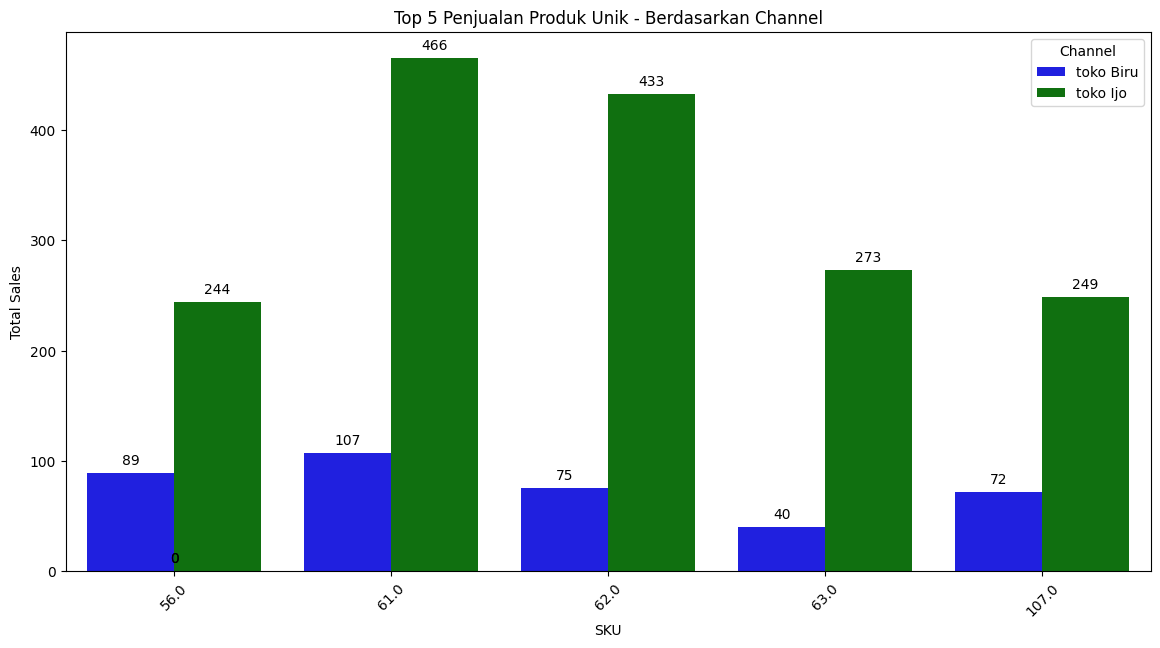

In [ ]:
# Tambahkan kolom baru untuk nama channel
channel_names = {0: 'toko Biru', 1: 'toko Ijo'}
df_case1['Channel_Name'] = df_case1['Channel'].map(channel_names)

# Gabungkan semua SKU menjadi satu kolom
sku_columns = ['SKU_1', 'SKU_2', 'SKU_3', 'SKU_4', 'SKU_5', 'SKU_6']
df_case1_melted = df_case1.melt(id_vars=['Channel', 'Jumlah', 'Channel_Name'], value_vars=sku_columns, var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Group by SKU dan Channel_Name, dan hitung total penjualan
total_sales = df_case1_melted.groupby(['SKU', 'Channel_Name'])['Jumlah'].sum().reset_index()

# Identifikasi top 5 produk unik berdasarkan jumlah total penjualan
top_sku = total_sales.groupby('SKU')['Jumlah'].sum().nlargest(5).index
top_sku_sales = total_sales[total_sales['SKU'].isin(top_sku)]

# Plot barplot
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='SKU', y='Jumlah', hue='Channel_Name', data=top_sku_sales, palette={'toko Biru': 'Blue', 'toko Ijo': 'Green'})

# Tambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.title('Top 5 Penjualan Produk Unik - Berdasarkan Channel')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()

Visualisasi diatas merupakan top 5 penjualan produk terbanyak pada kurun waktu periode 12 februari sampai 15 maret 2024, di atas dapat dilihat bahwa ID_Produk 61 sebanyak 573 produk terjual dan ID_Produk 62 memiliki penjualan sebanyak 508 dengan penjualan yang bahkan memiliki penjualan yang jauh lebih banyak dari top 5 dari ID_Produk 56, 63, dan 107

### Sebaran Penjualan top 5 produk pada setiap toko

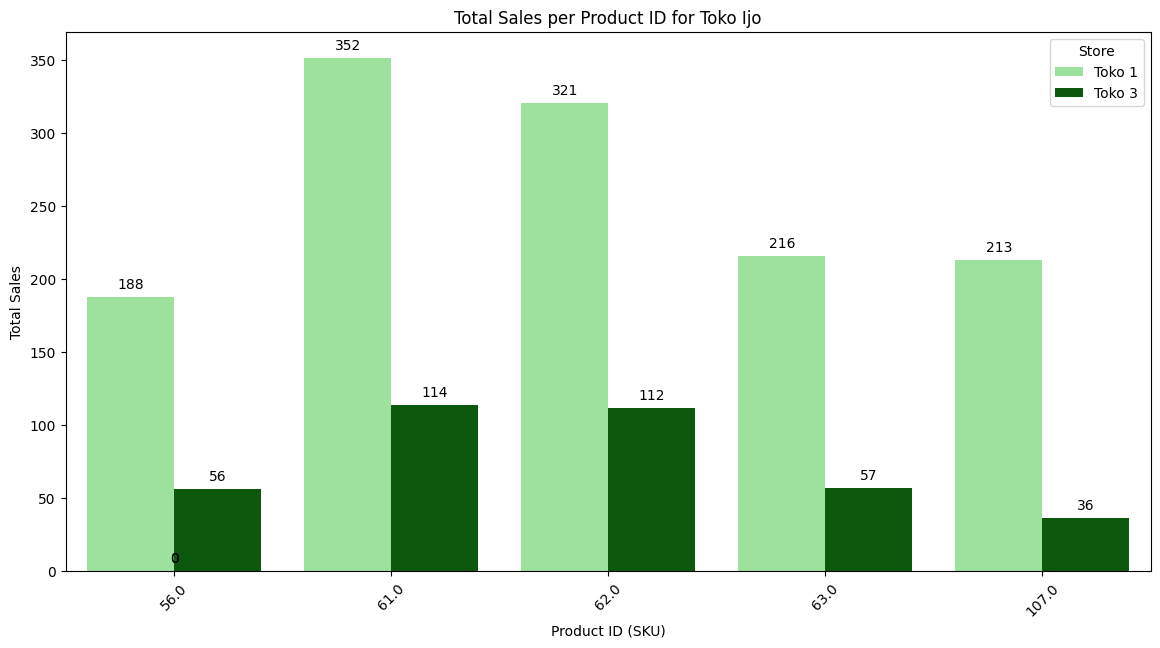

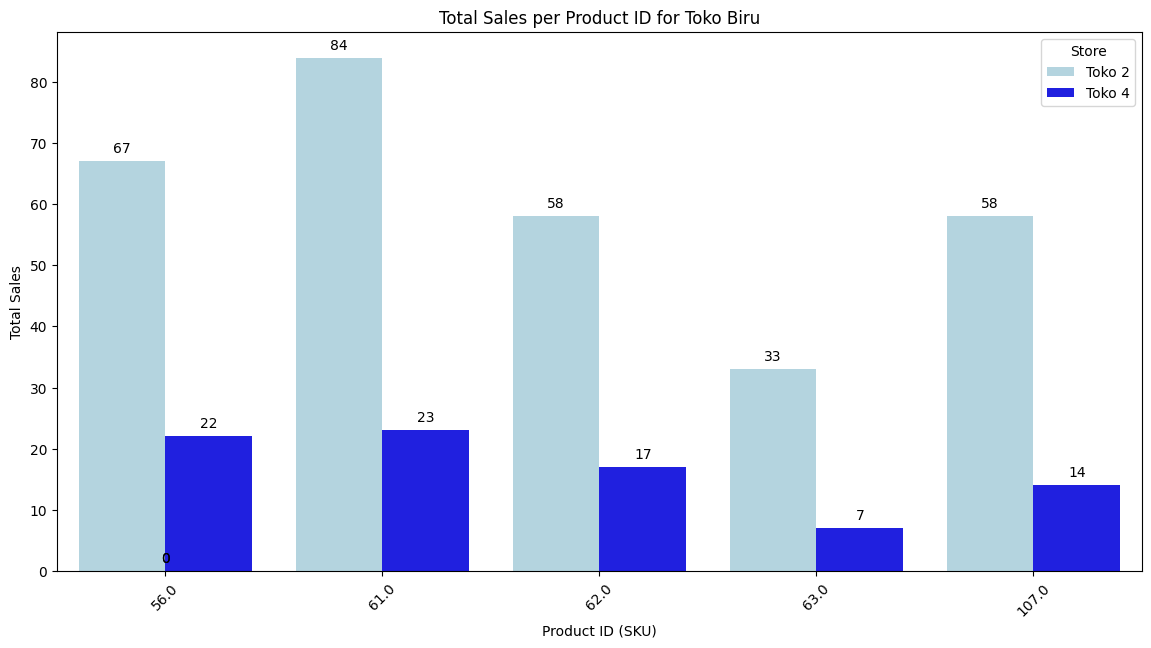

In [ ]:
# Mapping for better readability
channel_names = {0: 'Toko Biru', 1: 'Toko Ijo'}
store_names = {0: 'Toko 1', 1: 'Toko 2', 2: 'Toko 3', 3: 'Toko 4', 4: 'Toko 5'}

df_case1['Channel_Name'] = df_case1['Channel'].map(channel_names)
df_case1['Store_Name'] = df_case1['Nama Toko'].map(store_names)

# Filter data for each channel
df_case1_ijo = df_case1[df_case1['Channel_Name'] == 'Toko Ijo']
df_case1_biru = df_case1[df_case1['Channel_Name'] == 'Toko Biru']

# Filter data for specific stores in each channel
df_case1_ijo_filtered = df_case1_ijo[df_case1_ijo['Nama Toko'].isin([0, 2])]  # Toko 1 and Toko 3
df_case1_biru_filtered = df_case1_biru[df_case1_biru['Nama Toko'].isin([1,3,4])]

# Melt data to get SKU in one column
sku_columns = ['SKU_1', 'SKU_2', 'SKU_3', 'SKU_4', 'SKU_5', 'SKU_6']
df_case1_melted_ijo = df_case1_ijo_filtered.melt(id_vars=['Jumlah', 'Store_Name'], value_vars=sku_columns, var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])
df_case1_melted_biru = df_case1_biru_filtered.melt(id_vars=['Jumlah', 'Store_Name'], value_vars=sku_columns, var_name='SKU_Type', value_name='SKU').dropna(subset=['SKU'])

# Filter for specific product IDs
product_ids = [56, 61, 62, 63, 107]
df_case1_melted_ijo = df_case1_melted_ijo[df_case1_melted_ijo['SKU'].isin(product_ids)]
df_case1_melted_biru = df_case1_melted_biru[df_case1_melted_biru['SKU'].isin(product_ids)]

# Group by SKU and Store_Name to get total sales
total_sales_ijo = df_case1_melted_ijo.groupby(['SKU', 'Store_Name'])['Jumlah'].sum().reset_index()
total_sales_biru = df_case1_melted_biru.groupby(['SKU', 'Store_Name'])['Jumlah'].sum().reset_index()
palette_toko_ijo = ['lightgreen', 'darkgreen']
# Plot for Toko Ijo
plt.figure(figsize=(14, 7))
ax_ijo = sns.barplot(x='SKU', y='Jumlah', hue='Store_Name', data=total_sales_ijo, palette=palette_toko_ijo)
for p in ax_ijo.patches:
    ax_ijo.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')
plt.title('Total Sales per Product ID for Toko Ijo')
plt.xlabel('Product ID (SKU)')
plt.ylabel('Total Sales')
plt.legend(title='Store')
plt.xticks(rotation=45)
plt.show()

# Plot for Toko Biru
palette_toko_biru = ['lightblue', 'blue']
plt.figure(figsize=(14, 7))
ax_biru = sns.barplot(x='SKU', y='Jumlah', hue='Store_Name', data=total_sales_biru, palette=palette_toko_biru)
for p in ax_biru.patches:
    ax_biru.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.title('Total Sales per Product ID for Toko Biru')
plt.xlabel('Product ID (SKU)')
plt.ylabel('Total Sales')
plt.legend(title='Store')
plt.xticks(rotation=45)
plt.show()


Dari visualisasi di atas terlihat bahwa Toko 3 di Toko Hijau memiliki penjualan yang jauh lebih rendah dibandingkan dengan Toko 1, walaupun mereka menjual di channel dan SKU yang sama. Penjualan Toko 1 hampir tiga kali lipat dari Toko 3

Dari visualisasi di atas terlihat bahwa Toko 2 di Toko Hijau memiliki penjualan yang jauh lebih rendah dibandingkan dengan Toko 4, walaupun mereka menjual di channel dan SKU yang sama. Penjualan Toko 2 hampir tiga kali lipat dari Toko 4, pada toko 5 tidak ada penjualan yang signifikan hanya ada 97 transaksi pada toko biru

## **KESIMPULAN**


Terdapat produk yang signifikan yaitu 56, 61, 62, 63, dan 107 pada kedua channel yaitu Toko Ijo dan Toko Biru

yang paling banyak terjual adalah di Toko Ijo dengan sebaran di 2 toko yaitu Toko 1 dan Toko 3

sedangkan di toko Biru lebih sedikit dari toko Ijo dan memiliki sebaran di toko 2 dan toko 4, akan tetapi pada toko 5 tidak ada top dari 5 produk tersebut yang terjual

# ***CASE 2*** : Apakah ada pola khusus dalam pola penjualan harian atau mingguan yang dapat diidentifikasi?

## EXPLORATORY DATA ANALYST

In [ ]:
df_case2 = pd.read_csv(path_data + 'Data_Feature.csv', parse_dates=['Waktu Pembaruan','Sinkronisasi Terakhir', 'Waktu Pembayaran', 'Waktu Pengiriman', 'Waktu Penyelesaian'])
df_case2.tail()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan  \
3307 2024-04-06 16:42:00   2024-04-06 16:52:00  04-04-2024 17:12   
3308 2024-03-14 20:40:00   2024-03-14 20:40:00  10-03-2024 14:08   
3309 2024-05-14 20:52:00   2024-05-14 20:56:00  12-05-2024 08:21   
3310 2024-04-06 12:38:00   2024-04-06 12:38:00  05-04-2024 05:30   
3311 2024-04-13 15:47:00   2024-04-06 08:36:00  05-04-2024 15:29   

       Jenis Pesanan    Channel Nama Toko      Pembayaran    Waktu Pembayaran  \
3307  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet 2024-04-04 17:12:00   
3308  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-03-10 14:08:00   
3309  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-05-12 08:31:00   
3310  Pesanan Normal   Toko Ijo    Toko 1          Kredit 2024-04-05 05:31:00   
3311  Pesanan Normal  Toko Biru    Toko 2          Kredit 2024-04-05 15:29:00   

        Waktu Pengiriman  Waktu Penyelesaian  \
3307 2024-04-05 16:05:00 2024-04-06 16:42:00   
3308 2024-03-21 06:00:00 2024-03-14 20:40:00   
3309 2024-05-14 11:58:00 2024-05-14 20:52:00   
3310 2024-04-05 17:40:00 2024-04-06 12:38:00   
3311 2024-04-08 08:55:00 2024-04-14 04:06:00   

                                         Variant Produk  Harga Awal Produk  \
3307                  Vanilla,1pc 1pc 1pc Pack @12patch            96700.0   
3308                               1pc Box @84patch 1pc           159800.0   
3309  Unit + Aksesoris Chamomile,1pc Vanilla,+Refill...           320600.0   
3310                           1pc Mix,3pcs + Pipet 1pc           220500.0   
3311  1PC 1 pcs 1PCS Vanilla/1 pcs Chamomile/1 pcs 1...           499050.0   

      Total Berat(g)  Subtotal                               Kota     Total  \
3307           450.0   88720.0                      KAB. SIDOARJO   68469.0   
3308           210.0  159800.0                       KAB. BANDUNG  141444.0   
3309           700.0  303736.0                     KOTA TANGERANG  251731.0   
3310           560.0  198450.0                 KOTA JAKARTA UTARA  171688.0   
3311          1100.0  570870.0  Kota Administrasi Jakarta Selatan  585670.0   

      Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli  Asuransi  \
3307               0.0                             0.0       0.0   
3308               0.0                             0.0       0.0   
3309               0.0                             0.0       0.0   
3310               0.0                             0.0       0.0   
3311           11500.0                             0.0    3300.0   

      Total Diskon  Biaya Komisi  Biaya Layanan  Ongkir Dibayar Sistem  \
3307       10000.0       -4583.0        -5668.0                    0.0   
3308           0.0       -9088.0        -9268.0                    0.0   
3309       10000.0      -24968.0       -17037.0                    0.0   
3310           0.0      -15252.0       -11510.0                    0.0   
3311       65143.0           0.0            0.0                    0.0   

      Potongan Biaya Pengiriman     Koin  Voucher Channel  Diskon Penjual  \
3307                     8000.0      0.0          10000.0         10000.0   
3308                    15000.0      0.0              0.0             0.0   
3309                     9000.0  23525.0          29374.0         10000.0   
3310                     9000.0      0.0          10000.0             0.0   
3311                    11500.0      0.0          53643.0             0.0   

                                      Alasan Pembatalan  SKU_1  SKU_2  SKU_3  \
3307  Modify existing order (colour, size, address, ...   60.0   62.0  106.0   
3308                            Others / change of mind  107.0   63.0    NaN   
3309                                                NaN  114.0  144.0  112.0   
3310  Modify existing order (colour, size, address, ...   62.0   57.0   60.0   
3311  Modify existing order (colour, size, address, ...   52.0   56.0   63.0   

      SKU_4  SKU_5  SKU_6  SKU_7  SKU_8  SKU_9  SKU_10  SKU_11  SKU_12  \
3307    

In [ ]:
df_case2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Waktu Pembaruan                 3312 non-null   datetime64[ns]
 1   Sinkronisasi Terakhir           3312 non-null   datetime64[ns]
 2   Tanggal Pembuatan               3312 non-null   object        
 3   Jenis Pesanan                   3312 non-null   object        
 4   Channel                         3312 non-null   object        
 5   Nama Toko                       3312 non-null   object        
 6   Pembayaran                      3312 non-null   object        
 7   Waktu Pembayaran                3312 non-null   datetime64[ns]
 8   Waktu Pengiriman                3310 non-null   datetime64[ns]
 9   Waktu Penyelesaian              3312 non-null   datetime64[ns]
 10  Variant Produk                  3312 non-null   object        
 11  Harg

In [ ]:
df_case2.isnull().sum()

Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Tanggal Pembuatan                    0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     2
Waktu Penyelesaian                   0
Variant Produk                       0
Harga Awal Produk                    0
Total Berat(g)                       0
Subtotal                             0
Kota                                 0
Total                                0
Biaya Pengiriman                     0
Biaya Kirim Ditanggung Pembeli       0
Asuransi                             0
Total Diskon                         0
Biaya Komisi                         0
Biaya Layanan                        0
Ongkir Dibayar Sistem                0
Potongan Biaya Pengiriman            0
Koin                                 0
Voucher Channel          

In [ ]:
df_case2.describe()

Waktu Pembaruan          Sinkronisasi Terakhir  \
count                           3312                           3312   
mean   2024-04-03 17:47:03.605072384  2024-04-03 20:40:36.268115712   
min              2024-02-15 21:57:00            2024-02-15 15:08:00   
25%              2024-03-16 20:37:00            2024-03-17 03:54:00   
50%              2024-04-03 15:14:00            2024-04-03 18:25:00   
75%              2024-04-23 10:28:00            2024-04-21 20:35:00   
max              2024-05-15 13:09:00            2024-05-15 12:46:00   
std                              NaN                            NaN   

                    Waktu Pembayaran               Waktu Pengiriman  \
count                           3312                           3310   
mean   2024-03-29 17:24:08.931159296  2024-04-04 05:07:25.250755328   
min              2024-02-15 02:37:00            2024-03-14 15:53:00   
25%              2024-03-11 00:31:15            2024-03-20 14:35:00   
50%              2024-03-29 08:32:00            2024-03-30 15:27:30   
75%              2024-04-18 10:15:00            2024-04-19 15:39:00   
max              2024-05-14 11:52:00            2024-05-14 13:40:00   
std                              NaN                            NaN   

                  Waktu Penyelesaian  Harga Awal Produk  Total Berat(g)  \
count                           3312       3.312000e+03     3312.000000   
mean   2024-04-04 23:33:17.282608896       3.444204e+05      690.570350   
min              2024-02-20 15:25:00       1.490000e+03        1.000000   
25%              2024-03-20 02:16:00       9.990000e+04      250.000000   
50%              2024-04-03 15:58:00       1.570790e+05      450.000000   
75%              2024-04-23 13:22:00       2.999000e+05      850.000000   
max              2024-05-15 12:35:00       5.499999e+06    10575.000000   
std                              NaN       5.567594e+05      942.898524   

           Subtotal         Total  Biaya Pengiriman  \
count  3.312000e+03  3.312000e+03       3312.000000   
mean   2.995986e+05  2.690407e+05       4166.125302   
min    6.900000e+03 -5.180000e+04     -35000.000000   
25%    8.991000e+04  8.109900e+04          0.000000   
50%    1.656000e+05  1.414440e+05          0.000000   
75%    3.085300e+05  2.667502e+05          0.000000   
max    5.499999e+06  5.506999e+06     130800.000000   
std    4.717736e+05  4.586806e+05      11291.118279   

       Biaya Kirim Ditanggung Pembeli      Asuransi  Total Diskon  \
count                     3312.000000   3312.000000  3.312000e+03   
mean                      1986.790761    307.608696  2.001975e+04   
min                          0.000000      0.000000  0.000000e+00   
25%                          0.000000      0.000000  0.000000e+00   
50%                          0.000000      0.000000  8.000000e+03   
75%                          0.000000      0.000000  1.472850e+04   
max                     175000.000000  23200.000000  1.980000e+06   
std                       7732.291009   1463.205034  9.708864e+04   

        Biaya Komisi  Biaya Layanan  Ongkir Dibayar Sistem  \
count    3312.000000    3312.000000            3312.000000   
mean   -11705.947464   -8665.690821           -2031.444444   
min   -193135.000000  -95346.000000         -175000.000000   
25%    -14240.000000  -11768.500000               0.000000   
50%     -5526.500000   -5794.000000               0.000000   
75%     -1436.000000   -1771.500000               0.000000   
max         0.000000       0.000000               0.000000   
std     18486.404609   10260.866271            7805.711082   

       Potongan Biaya Pengiriman           Koin  Voucher Channel  \
count                3312.000000    3312.000000      3312.000000   
mean                16871.062802    2854.043176      8340.477657   
min                     0.000000       0.000000         0.000000   
25%                  9000.000000       0.000000         0.000000   
50%                 14000.000000       0.000000 

## Handling Missing Value

### Handling Missing Value "Waktu Pengiriman"

In [ ]:
fill_Waktu_Pengiriman  = '14-05-2024 13:40'
df_case2['Waktu Pengiriman'].fillna(fill_Waktu_Pengiriman, inplace =True)

In [ ]:
df_case2.head()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan   Jenis Pesanan  \
0 2024-05-15 09:32:00   2024-05-15 09:35:00  14-05-2024 11:29  Pesanan Normal   
1 2024-05-14 17:45:00   2024-05-14 13:09:00  14-05-2024 10:19  Pesanan Normal   
2 2024-05-15 06:05:00   2024-05-15 06:05:00  14-05-2024 08:16  Pesanan Normal   
3 2024-05-15 11:22:00   2024-05-15 11:27:00  14-05-2024 07:34  Pesanan Normal   
4 2024-05-14 14:03:00   2024-05-14 14:09:00  13-05-2024 12:44  Pesanan Normal   

     Channel Nama Toko      Pembayaran    Waktu Pembayaran  \
0   Toko Ijo    Toko 1  Online Payment 2024-05-14 11:52:00   
1  Toko Biru    Toko 2          Bank 1 2024-05-14 10:19:00   
2   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 08:16:00   
3   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 07:34:00   
4   Toko Ijo    Toko 1  Digital Wallet 2024-05-13 12:45:00   

     Waktu Pengiriman  Waktu Penyelesaian       Variant Produk  \
0 2024-05-14 13:40:00 2024-05-15 09:32:00  COMBO (500ML+330ML)   
1 2024-05-14 13:40:00 2024-05-15 09:32:00                  1PC   
2 2024-05-14 13:40:00 2024-05-15 06:05:00                  1pc   
3 2024-05-14 13:40:00 2024-05-15 11:22:00                  1pc   
4 2024-05-13 16:39:00 2024-05-14 14:03:00        100ML + 300ML   

   Harga Awal Produk  Total Berat(g)  Subtotal  \
0           989800.0           650.0  890820.0   
1            99900.0           250.0   99900.0   
2            39900.0           250.0   39900.0   
3            99900.0           250.0   99900.0   
4           139800.0           500.0  128616.0   

                                Kota     Total  Biaya Pengiriman  \
0                         KOTA DEPOK  829152.0               0.0   
1  Kota Administrasi Jakarta Selatan  135800.0           35000.0   
2                      KOTA SURABAYA   35431.0               0.0   
3                      KOTA SURABAYA   88711.0               0.0   
4                     KOTA TANGERANG  110224.0               0.0   

   Biaya Kirim Ditanggung Pembeli  Asuransi  Total Diskon  Biaya Komisi  \
0                         29500.0       0.0           0.0      -35633.0   
1                             0.0     900.0       23993.0           0.0   
2                             0.0       0.0           0.0       -1596.0   
3                             0.0       0.0           0.0       -3996.0   
4                             0.0       0.0           0.0      -10932.0   

   Biaya Layanan  Ongkir Dibayar Sistem  Potongan Biaya Pengiriman  Koin  \
0       -26035.0               -29500.0                    20000.0   0.0   
1            0.0                    0.0                    17000.0   0.0   
2        -2873.0                    0.0                     9000.0   0.0   
3        -7193.0                    0.0                     6500.0   0.0   
4        -7460.0                    0.0                     9000.0   0.0   

   Voucher Channel  Diskon Penjual Alasan Pembatalan  SKU_1  SKU_2  SKU_3  \
0          89082.0             0.0               NaN  103.0  105.0    NaN   
1           6993.0             0.0               NaN   61.0    NaN    NaN   
2              0.0             0.0               NaN   62.0    NaN    NaN   
3              0.0             0.0               NaN   61.0    NaN    NaN   
4          19293.0             0.0               NaN  137.0  139.0    NaN   

   SKU_4  SKU_5  SKU_6  SKU_7  SKU_8  SKU_9  SKU_10  SKU_11  SKU_12  \
0    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   

                                   ID Pesanan Hashed is_diskon  
0  747909763bd0341883eb2726872231248ee39bdf9d6fbf...        Ya  
1  d85e99b5b5713d2cbdfaba295c3d2041d820a6b01c40bf...     Tidak  
2  e1749e58062288683656be54ff11cf2ac8212c9ad8e

In [ ]:
df_case2.isnull().sum()

Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Tanggal Pembuatan                    0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     0
Waktu Penyelesaian                   0
Variant Produk                       0
Harga Awal Produk                    0
Total Berat(g)                       0
Subtotal                             0
Kota                                 0
Total                                0
Biaya Pengiriman                     0
Biaya Kirim Ditanggung Pembeli       0
Asuransi                             0
Total Diskon                         0
Biaya Komisi                         0
Biaya Layanan                        0
Ongkir Dibayar Sistem                0
Potongan Biaya Pengiriman            0
Koin                                 0
Voucher Channel          

### Handling Missing Value Alasan Pembatalan

In [ ]:
df_case2['Alasan Pembatalan'].value_counts()

Alasan Pembatalan
Others / change of mind                                         1815
Modify existing order (colour, size, address, voucher, etc.)    1415
Name: count, dtype: int64

In [ ]:
mode_value = df_case2['Alasan Pembatalan'].mode()[0]
df_case2['Alasan Pembatalan'].fillna(mode_value, inplace=True)

In [ ]:
df_case2.head()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan   Jenis Pesanan  \
0 2024-05-15 09:32:00   2024-05-15 09:35:00  14-05-2024 11:29  Pesanan Normal   
1 2024-05-14 17:45:00   2024-05-14 13:09:00  14-05-2024 10:19  Pesanan Normal   
2 2024-05-15 06:05:00   2024-05-15 06:05:00  14-05-2024 08:16  Pesanan Normal   
3 2024-05-15 11:22:00   2024-05-15 11:27:00  14-05-2024 07:34  Pesanan Normal   
4 2024-05-14 14:03:00   2024-05-14 14:09:00  13-05-2024 12:44  Pesanan Normal   

     Channel Nama Toko      Pembayaran    Waktu Pembayaran  \
0   Toko Ijo    Toko 1  Online Payment 2024-05-14 11:52:00   
1  Toko Biru    Toko 2          Bank 1 2024-05-14 10:19:00   
2   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 08:16:00   
3   Toko Ijo    Toko 3  Digital Wallet 2024-05-14 07:34:00   
4   Toko Ijo    Toko 1  Digital Wallet 2024-05-13 12:45:00   

     Waktu Pengiriman  Waktu Penyelesaian       Variant Produk  \
0 2024-05-14 13:40:00 2024-05-15 09:32:00  COMBO (500ML+330ML)   
1 2024-05-14 13:40:00 2024-05-15 09:32:00                  1PC   
2 2024-05-14 13:40:00 2024-05-15 06:05:00                  1pc   
3 2024-05-14 13:40:00 2024-05-15 11:22:00                  1pc   
4 2024-05-13 16:39:00 2024-05-14 14:03:00        100ML + 300ML   

   Harga Awal Produk  Total Berat(g)  Subtotal  \
0           989800.0           650.0  890820.0   
1            99900.0           250.0   99900.0   
2            39900.0           250.0   39900.0   
3            99900.0           250.0   99900.0   
4           139800.0           500.0  128616.0   

                                Kota     Total  Biaya Pengiriman  \
0                         KOTA DEPOK  829152.0               0.0   
1  Kota Administrasi Jakarta Selatan  135800.0           35000.0   
2                      KOTA SURABAYA   35431.0               0.0   
3                      KOTA SURABAYA   88711.0               0.0   
4                     KOTA TANGERANG  110224.0               0.0   

   Biaya Kirim Ditanggung Pembeli  Asuransi  Total Diskon  Biaya Komisi  \
0                         29500.0       0.0           0.0      -35633.0   
1                             0.0     900.0       23993.0           0.0   
2                             0.0       0.0           0.0       -1596.0   
3                             0.0       0.0           0.0       -3996.0   
4                             0.0       0.0           0.0      -10932.0   

   Biaya Layanan  Ongkir Dibayar Sistem  Potongan Biaya Pengiriman  Koin  \
0       -26035.0               -29500.0                    20000.0   0.0   
1            0.0                    0.0                    17000.0   0.0   
2        -2873.0                    0.0                     9000.0   0.0   
3        -7193.0                    0.0                     6500.0   0.0   
4        -7460.0                    0.0                     9000.0   0.0   

   Voucher Channel  Diskon Penjual        Alasan Pembatalan  SKU_1  SKU_2  \
0          89082.0             0.0  Others / change of mind  103.0  105.0   
1           6993.0             0.0  Others / change of mind   61.0    NaN   
2              0.0             0.0  Others / change of mind   62.0    NaN   
3              0.0             0.0  Others / change of mind   61.0    NaN   
4          19293.0             0.0  Others / change of mind  137.0  139.0   

   SKU_3  SKU_4  SKU_5  SKU_6  SKU_7  SKU_8  SKU_9  SKU_10  SKU_11  SKU_12  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   

                                   ID Pesanan Hashed is_diskon  
0  747909763bd0341883eb2726872231248ee39bdf9d6fbf...        Ya  
1  d85e99b5b5713d2cbdfaba295c3d2041d820a6b01c40bf...     Tidak  
2  e

In [ ]:
df_case2.isnull().sum()

Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Tanggal Pembuatan                    0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     0
Waktu Penyelesaian                   0
Variant Produk                       0
Harga Awal Produk                    0
Total Berat(g)                       0
Subtotal                             0
Kota                                 0
Total                                0
Biaya Pengiriman                     0
Biaya Kirim Ditanggung Pembeli       0
Asuransi                             0
Total Diskon                         0
Biaya Komisi                         0
Biaya Layanan                        0
Ongkir Dibayar Sistem                0
Potongan Biaya Pengiriman            0
Koin                                 0
Voucher Channel          

## Feature Engineering

### Menambahkan Kolom "Jumlah SKU" yaitu kolom yang menampung ada berapa banyak jenis produk yang dibeli oleh pelanggan

In [ ]:
sku_columns = [f'SKU_{i}' for i in range(1, 13)]
df_case2['Jumlah_SKU'] = df_case2[sku_columns].notna().sum(axis=1)

In [ ]:
df_case2.tail(10)

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan  \
3302 2024-03-05 07:13:00   2024-03-06 01:24:00  02-03-2024 09:45   
3303 2024-03-25 16:27:00   2024-03-25 16:27:00  18-03-2024 19:57   
3304 2024-04-20 20:36:00   2024-04-20 20:45:00  17-04-2024 21:59   
3305 2024-02-18 18:35:00   2024-02-24 16:09:00  15-02-2024 21:52   
3306 2024-03-14 21:05:00   2024-03-15 05:54:00  13-03-2024 11:41   
3307 2024-04-06 16:42:00   2024-04-06 16:52:00  04-04-2024 17:12   
3308 2024-03-14 20:40:00   2024-03-14 20:40:00  10-03-2024 14:08   
3309 2024-05-14 20:52:00   2024-05-14 20:56:00  12-05-2024 08:21   
3310 2024-04-06 12:38:00   2024-04-06 12:38:00  05-04-2024 05:30   
3311 2024-04-13 15:47:00   2024-04-06 08:36:00  05-04-2024 15:29   

       Jenis Pesanan    Channel Nama Toko      Pembayaran    Waktu Pembayaran  \
3302  Pesanan Normal   Toko Ijo    Toko 3  Online Payment 2024-03-02 09:45:00   
3303  Pesanan Normal   Toko Ijo    Toko 1  Digital Wallet 2024-03-18 19:57:00   
3304  Pesanan Normal   Toko Ijo    Toko 1  Digital Wallet 2024-04-17 21:59:00   
3305  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-02-16 09:50:00   
3306  Pesanan Normal   Toko Ijo    Toko 1          Bank 6 2024-03-13 11:41:00   
3307  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet 2024-04-04 17:12:00   
3308  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-03-10 14:08:00   
3309  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-05-12 08:31:00   
3310  Pesanan Normal   Toko Ijo    Toko 1          Kredit 2024-04-05 05:31:00   
3311  Pesanan Normal  Toko Biru    Toko 2          Kredit 2024-04-05 15:29:00   

        Waktu Pengiriman  Waktu Penyelesaian  \
3302 2024-03-16 01:39:00 2024-03-21 04:20:00   
3303 2024-03-20 14:35:00 2024-03-25 16:27:00   
3304 2024-04-18 15:41:00 2024-04-20 20:36:00   
3305 2024-03-16 01:39:00 2024-02-21 16:26:00   
3306 2024-03-14 16:18:00 2024-03-14 21:05:00   
3307 2024-04-05 16:05:00 2024-04-06 16:42:00   
3308 2024-03-21 06:00:00 2024-03-14 20:40:00   
3309 2024-05-14 11:58:00 2024-05-14 20:52:00   
3310 2024-04-05 17:40:00 2024-04-06 12:38:00   
3311 2024-04-08 08:55:00 2024-04-14 04:06:00   

                                         Variant Produk  Harga Awal Produk  \
3302                                          2pcs 2pcs          2199800.0   
3303                             3pcs Pack @12patch 1pc           110600.0   
3304                               1pc Unit + Aksesoris           269800.0   
3305                                   1pc 3pcs 1pc 1pc          1284500.0   
3306                                      1pc FREE GIFT           209900.0   
3307                  Vanilla,1pc 1pc 1pc Pack @12patch            96700.0   
3308                               1pc Box @84patch 1pc           159800.0   
3309  Unit + Aksesoris Chamomile,1pc Vanilla,+Refill...           320600.0   
3310                           1pc Mix,3pcs + Pipet 1pc           220500.0   
3311  1PC 1 pcs 1PCS Vanilla/1 pcs Chamomile/1 pcs 1...           499050.0   

      Total Berat(g)   Subtotal                               Kota     Total  \
3302           850.0  1103816.0                        KOTA KEDIRI  994360.0   
3303           210.0   107558.0                      KAB. SIDOARJO   94322.0   
3304          1150.0   266780.0                 KOTA JAKARTA UTARA  230369.0   
3305          2610.0  1144049.0                         KAB. TUBAN  993348.0   
3306           750.0   209900.0                 KOTA JAKARTA UTARA  173990.0   
3307           450.0    88720.0                      KAB. SIDOARJO   68469.0   
3308           210.0   159800.0                       KAB. BANDUNG  141444.0   
3309           700.0   303736.0                     KOTA TANGERANG  251731.0   
3310           560.0   198450.0                 KOTA JAKARTA UTARA  171688.0   
3311          1100.0   570870.0  Kota Administrasi Jakarta Selatan  585670.0   

      Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli  Asuransi  \
3302               0.0         

In [ ]:
df_case2['Waktu Pembayaran'].describe()

count                             3312
mean     2024-03-29 17:24:08.931159296
min                2024-02-15 02:37:00
25%                2024-03-11 00:31:15
50%                2024-03-29 08:32:00
75%                2024-04-18 10:15:00
max                2024-05-14 11:52:00
Name: Waktu Pembayaran, dtype: object

### Menambahkan Kolom "Year" dan "Month" : berdasarkan Kolom "Waktu Pembayaran"

In [ ]:
# Menambahkan kolom 'Year' dan 'Month'
df_case2['Year'] = df_case2['Waktu Pembayaran'].dt.year
df_case2['Month'] = df_case2['Waktu Pembayaran'].dt.month
# Menambahkan kolom 'Week' yang menunjukkan minggu keberapa dalam tahun tersebut
df_case2['WeekOfYear'] = df_case2['Waktu Pembayaran'].dt.isocalendar().week

In [ ]:
# Mendefinisikan fungsi untuk menghitung minggu ke berapa dalam bulan tersebut
def week_of_month(dt):
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()
    return int(np.ceil(adjusted_dom / 7.0))

### Menambahkan Kolom "MonthWeekLabel" untuk melabeli setiap data termasuk dalam bulan apa dan minggu ke berapa

In [ ]:
# Menambahkan kolom 'WeekOfMonth'
df_case2['WeekOfMonth'] = df_case2['Waktu Pembayaran'].apply(week_of_month)

# Menambahkan kolom 'MonthWeekLabel' untuk menunjukkan bulan dan minggu
df_case2['MonthWeekLabel'] = df_case2['Year'].astype(str) + '-M' + df_case2['Month'].astype(str) + '-W' + df_case2['WeekOfMonth'].astype(str)

In [ ]:
# Menambahkan kolom 'Day' untuk mengekstrak tanggal dari 'Waktu Pembayaran'
df_case2['Day'] = df_case2['Waktu Pembayaran'].dt.date

# Menambahkan kolom 'Hour' untuk mengekstrak jam dari 'Waktu Pembayaran'
df_case2['Hour'] = df_case2['Waktu Pembayaran'].dt.hour

# Mengelompokkan data berdasarkan 'Channel', 'MonthWeekLabel', dan 'Day' untuk menghitung penjualan per hari per minggu per channel
weekly_daily_sales = df_case2.groupby(['Channel', 'MonthWeekLabel', 'Day'])['Total'].sum().reset_index()

### Menambahkan Kolom "Day" "Hour" "Minute" dari kolom "Waktu Pembayaran" yang di pecah

In [ ]:
# Menambahkan kolom 'Hour' untuk mengekstrak Menit dari 'Waktu Pembayaran'
df_case2['Minute'] = df_case2['Waktu Pembayaran'].dt.minute

# Menambahkan kolom 'Hour' untuk mengekstrak jam dari 'Waktu Pembayaran'
df_case2['Hour'] = df_case2['Waktu Pembayaran'].dt.hour

# Menambahkan kolom 'Day' untuk mengekstrak tanggal dari 'Waktu Pembayaran'
df_case2['Day'] = df_case2['Waktu Pembayaran'].dt.date


# Mengelompokkan data berdasarkan 'Channel', 'MonthWeekLabel', dan 'Day' untuk menghitung penjualan per hari per minggu per channel
weekly_daily_sales = df_case2.groupby(['Channel', 'MonthWeekLabel', 'Day'])['Total'].sum().reset_index()

### Menambahkan Kolom "nama_hari" untuk label hari

In [ ]:
# NAMBAH KOLOM NAMA HARI
# Konversi kolom 'Day' ke tipe datetime
df_case2['Day'] = pd.to_datetime(df_case2['Day'], format='%d/%m/%Y')

# Tambahkan kolom 'Nama_hari' dengan nama hari dalam bahasa Indonesia
df_case2['Nama_hari'] = df_case2['Day'].dt.strftime('%A')

# Mapping nama hari ke dalam bahasa Indonesia
hari_mapping = {
    'Monday': 'Senin',
    'Tuesday': 'Selasa',
    'Wednesday': 'Rabu',
    'Thursday': 'Kamis',
    'Friday': 'Jumat',
    'Saturday': 'Sabtu',
    'Sunday': 'Minggu'
}

# Mengganti nama hari dengan bahasa Indonesia
df_case2['Nama_hari'] = df_case2['Nama_hari'].map(hari_mapping)

### Cek Data

In [ ]:
df_case2.tail()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan  \
3307 2024-04-06 16:42:00   2024-04-06 16:52:00  04-04-2024 17:12   
3308 2024-03-14 20:40:00   2024-03-14 20:40:00  10-03-2024 14:08   
3309 2024-05-14 20:52:00   2024-05-14 20:56:00  12-05-2024 08:21   
3310 2024-04-06 12:38:00   2024-04-06 12:38:00  05-04-2024 05:30   
3311 2024-04-13 15:47:00   2024-04-06 08:36:00  05-04-2024 15:29   

       Jenis Pesanan    Channel Nama Toko      Pembayaran    Waktu Pembayaran  \
3307  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet 2024-04-04 17:12:00   
3308  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-03-10 14:08:00   
3309  Pesanan Normal   Toko Ijo    Toko 1  Online Payment 2024-05-12 08:31:00   
3310  Pesanan Normal   Toko Ijo    Toko 1          Kredit 2024-04-05 05:31:00   
3311  Pesanan Normal  Toko Biru    Toko 2          Kredit 2024-04-05 15:29:00   

        Waktu Pengiriman  Waktu Penyelesaian  \
3307 2024-04-05 16:05:00 2024-04-06 16:42:00   
3308 2024-03-21 06:00:00 2024-03-14 20:40:00   
3309 2024-05-14 11:58:00 2024-05-14 20:52:00   
3310 2024-04-05 17:40:00 2024-04-06 12:38:00   
3311 2024-04-08 08:55:00 2024-04-14 04:06:00   

                                         Variant Produk  Harga Awal Produk  \
3307                  Vanilla,1pc 1pc 1pc Pack @12patch            96700.0   
3308                               1pc Box @84patch 1pc           159800.0   
3309  Unit + Aksesoris Chamomile,1pc Vanilla,+Refill...           320600.0   
3310                           1pc Mix,3pcs + Pipet 1pc           220500.0   
3311  1PC 1 pcs 1PCS Vanilla/1 pcs Chamomile/1 pcs 1...           499050.0   

      Total Berat(g)  Subtotal                               Kota     Total  \
3307           450.0   88720.0                      KAB. SIDOARJO   68469.0   
3308           210.0  159800.0                       KAB. BANDUNG  141444.0   
3309           700.0  303736.0                     KOTA TANGERANG  251731.0   
3310           560.0  198450.0                 KOTA JAKARTA UTARA  171688.0   
3311          1100.0  570870.0  Kota Administrasi Jakarta Selatan  585670.0   

      Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli  Asuransi  \
3307               0.0                             0.0       0.0   
3308               0.0                             0.0       0.0   
3309               0.0                             0.0       0.0   
3310               0.0                             0.0       0.0   
3311           11500.0                             0.0    3300.0   

      Total Diskon  Biaya Komisi  Biaya Layanan  Ongkir Dibayar Sistem  \
3307       10000.0       -4583.0        -5668.0                    0.0   
3308           0.0       -9088.0        -9268.0                    0.0   
3309       10000.0      -24968.0       -17037.0                    0.0   
3310           0.0      -15252.0       -11510.0                    0.0   
3311       65143.0           0.0            0.0                    0.0   

      Potongan Biaya Pengiriman     Koin  Voucher Channel  Diskon Penjual  \
3307                     8000.0      0.0          10000.0         10000.0   
3308                    15000.0      0.0              0.0             0.0   
3309                     9000.0  23525.0          29374.0         10000.0   
3310                     9000.0      0.0          10000.0             0.0   
3311                    11500.0      0.0          53643.0             0.0   

                                      Alasan Pembatalan  SKU_1  SKU_2  SKU_3  \
3307  Modify existing order (colour, size, address, ...   60.0   62.0  106.0   
3308                            Others / change of mind  107.0   63.0    NaN   
3309                            Others / change of mind  114.0  144.0  112.0   
3310  Modify existing order (colour, size, address, ...   62.0   57.0   60.0   
3311  Modify existing order (colour, size, address, ...   52.0   56.0   63.0   

      SKU_4  SKU_5  SKU_6  SKU_7  SKU_8  SKU_9  SKU_10  SKU_11  SKU_12  \
3307    

In [ ]:
df_case2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Waktu Pembaruan                 3312 non-null   datetime64[ns]
 1   Sinkronisasi Terakhir           3312 non-null   datetime64[ns]
 2   Tanggal Pembuatan               3312 non-null   object        
 3   Jenis Pesanan                   3312 non-null   object        
 4   Channel                         3312 non-null   object        
 5   Nama Toko                       3312 non-null   object        
 6   Pembayaran                      3312 non-null   object        
 7   Waktu Pembayaran                3312 non-null   datetime64[ns]
 8   Waktu Pengiriman                3312 non-null   datetime64[ns]
 9   Waktu Penyelesaian              3312 non-null   datetime64[ns]
 10  Variant Produk                  3312 non-null   object        
 11  Harg

## Study Case

(Adakah Pola Harian Atau Mingguan ?)

In [ ]:
# Function to format the Y axis
def y_formatter(x, pos):
    return f'{int(x):,}'

### Analisis Penjualan Bulanan Periode 15 Februari - 14 Mei 2024

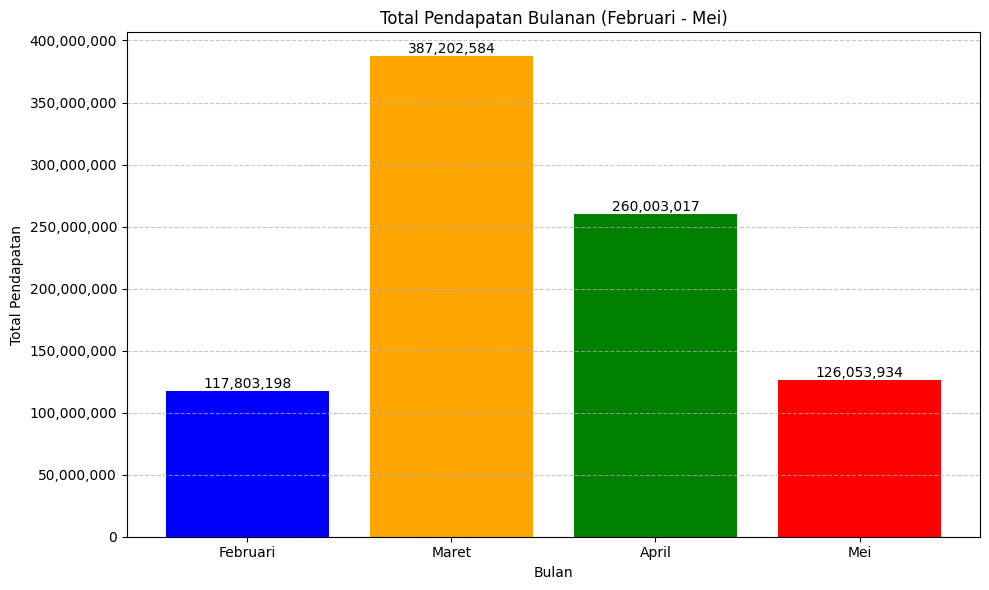

In [ ]:
# Mengelompokkan data berdasarkan bulan untuk menghitung total pendapatan bulanan
monthly_sales = df_case2[df_case2['Month'].isin([2, 3, 4, 5])].groupby('Month')['Total'].sum().reset_index()

# Mapping nama bulan untuk mempermudah pemahaman di plot
month_mapping = {2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei'}
monthly_sales['Month'] = monthly_sales['Month'].map(month_mapping)

# Membuat visualisasi
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_sales['Month'], monthly_sales['Total'], color=['blue', 'orange', 'green', 'red'])

# Mengatur title dan label sumbu
plt.title('Total Pendapatan Bulanan (Februari - Mei)')
plt.xlabel('Bulan')
plt.ylabel('Total Pendapatan')

# Format sumbu Y agar lebih mudah dibaca
def y_formatter(x, pos):
    return f'{int(x):,}'
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_formatter))

# Menambahkan angka pasti di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom', ha='center')  # va: vertical alignment, ha: horizontal alignment

# Menambahkan grid dan layout yang ketat
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()

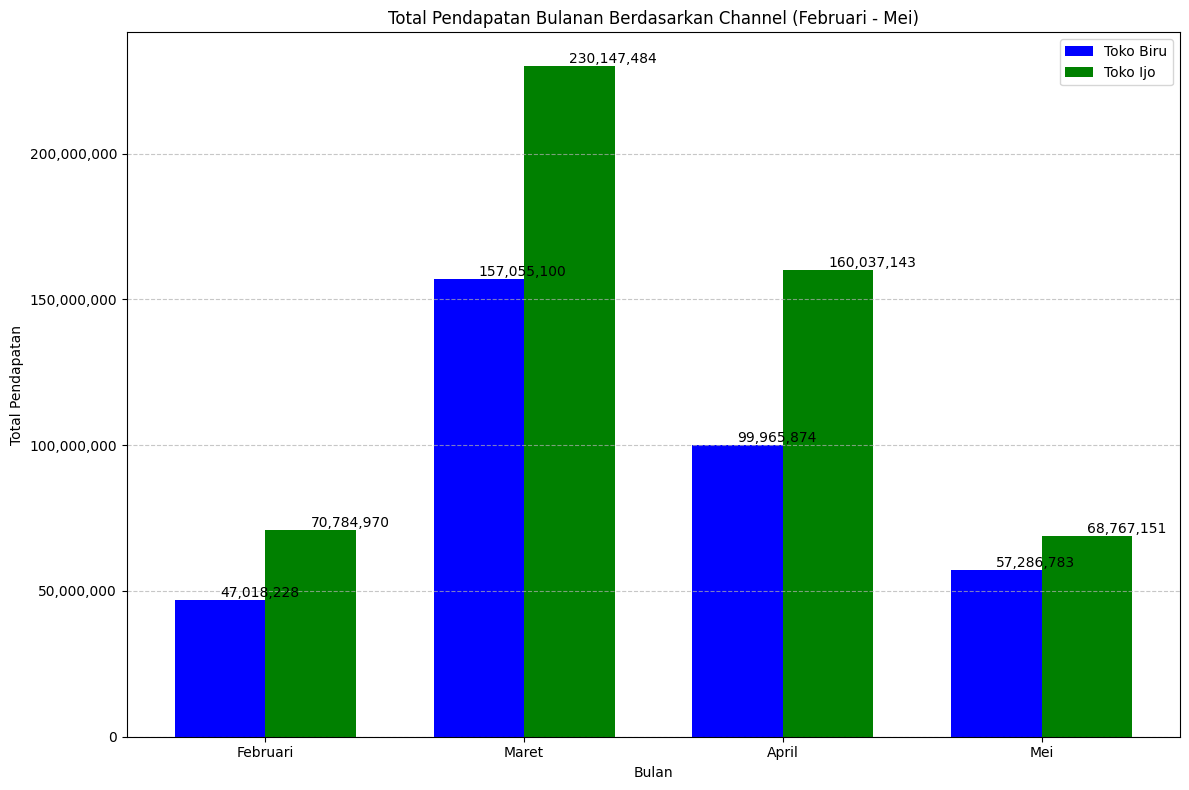

In [ ]:
# Mengelompokkan data berdasarkan bulan dan channel untuk menghitung total pendapatan
monthly_channel_sales = df_case2[df_case2['Month'].isin([2, 3, 4, 5])].groupby(['Month', 'Channel'])['Total'].sum().reset_index()

# Mapping nama bulan untuk mempermudah pemahaman di plot
month_mapping = {2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei'}
monthly_channel_sales['Month'] = monthly_channel_sales['Month'].map(month_mapping)

# Menentukan posisi X untuk setiap bar
months = ['Februari', 'Maret', 'April', 'Mei']
x = np.arange(len(months))

# Lebar bar
bar_width = 0.35

# Membuat sub-bar untuk setiap channel
bar1 = monthly_channel_sales[monthly_channel_sales['Channel'] == 'Toko Biru']['Total']
bar2 = monthly_channel_sales[monthly_channel_sales['Channel'] == 'Toko Ijo']['Total']

# Plotting barplot
plt.figure(figsize=(12, 8))
bars1 = plt.bar(x - bar_width/2, bar1, width=bar_width, label='Toko Biru', color='blue')
bars2 = plt.bar(x + bar_width/2, bar2, width=bar_width, label='Toko Ijo', color='green')

# Menambahkan title dan label sumbu
plt.title('Total Pendapatan Bulanan Berdasarkan Channel (Februari - Mei)')
plt.xlabel('Bulan')
plt.ylabel('Total Pendapatan')
plt.xticks(x, months)

# Format sumbu Y agar lebih mudah dibaca
def y_formatter(x, pos):
    return f'{int(x):,}'
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_formatter))

# Menambahkan angka pasti di atas setiap bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom')  # va: vertical alignment

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom')  # va: vertical alignment

# Menambahkan legenda
plt.legend()

# Menambahkan grid dan layout yang ketat
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()


Dari hasil visualisasi di atas, terlihat bahwa membandingkan setengah bulan Februari dengan bulan Maret sebenarnya tidak adil karena data yang diberikan terbatas. Namun, terlihat bahwa pada bulan Maret terdapat lonjakan pendapatan yang signifikan dibandingkan dengan bulan-bulan lainnya, terutama pada Toko Hijau. Menariknya, Toko Hijau selalu memiliki pendapatan bulanan yang lebih tinggi daripada Toko Biru, meskipun Toko Hijau hanya terdiri dari dua toko, yaitu Toko 1 dan Toko 3, sedangkan Toko Biru memiliki tiga toko, yaitu Toko 2, Toko 4, dan Toko 5.

### Analisis Penjualan Mingguan 15 Februari - 14 Mei 2024

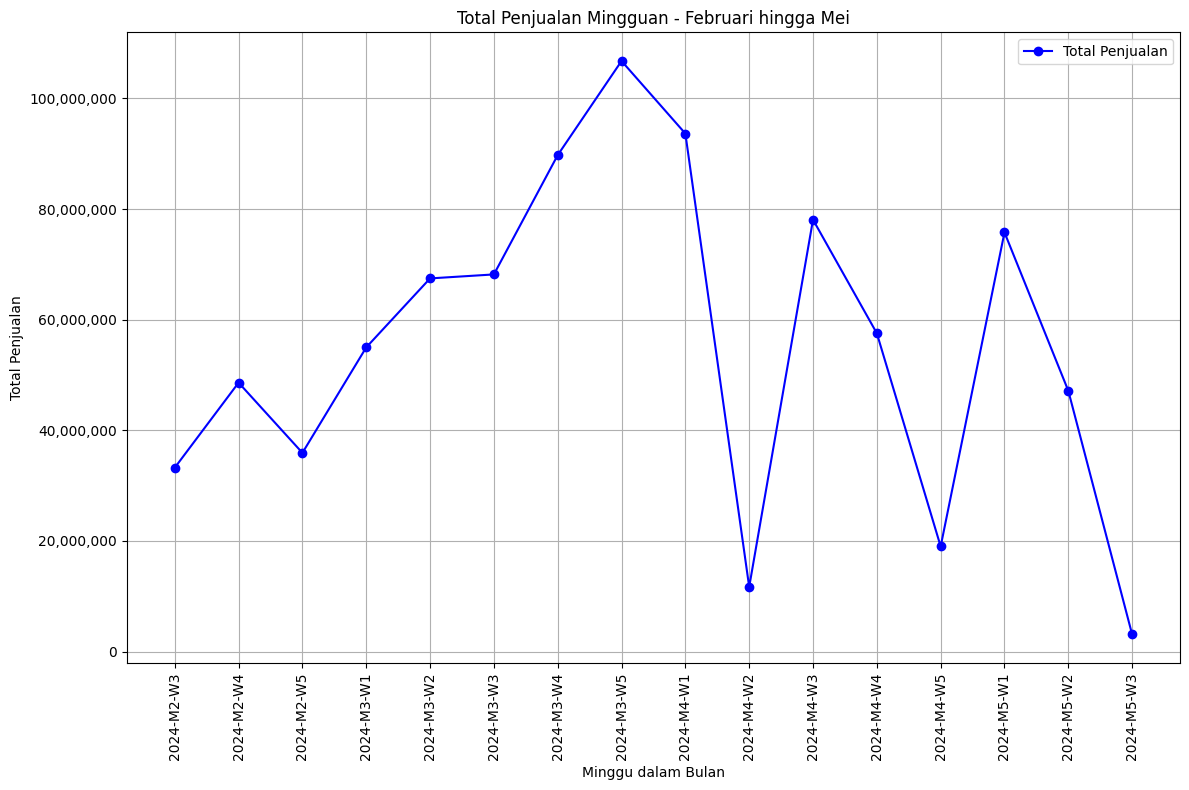

In [ ]:
# Filter data for the months February to May
filtered_df_case2 = df_case2[(df_case2['Month'] >= 2) & (df_case2['Month'] <= 5)]

# Check if the filtered data is not empty
if not filtered_df_case2.empty:
    # Group data by MonthWeekLabel and calculate total sales per week
    weekly_sales = filtered_df_case2.groupby('MonthWeekLabel')['Total'].sum()

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Plot the line plot for total weekly sales
    plt.plot(weekly_sales.index, weekly_sales.values, marker='o', color='blue', label='Total Penjualan')

    # Set the title and axis labels
    plt.title('Total Penjualan Mingguan - Februari hingga Mei')
    plt.xlabel('Minggu dalam Bulan')
    plt.ylabel('Total Penjualan')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Format y-axis labels for better readability
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

    # Add legend
    plt.legend()

    # Show grid and tight layout
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("Tidak ada data untuk bulan Februari hingga Mei.")

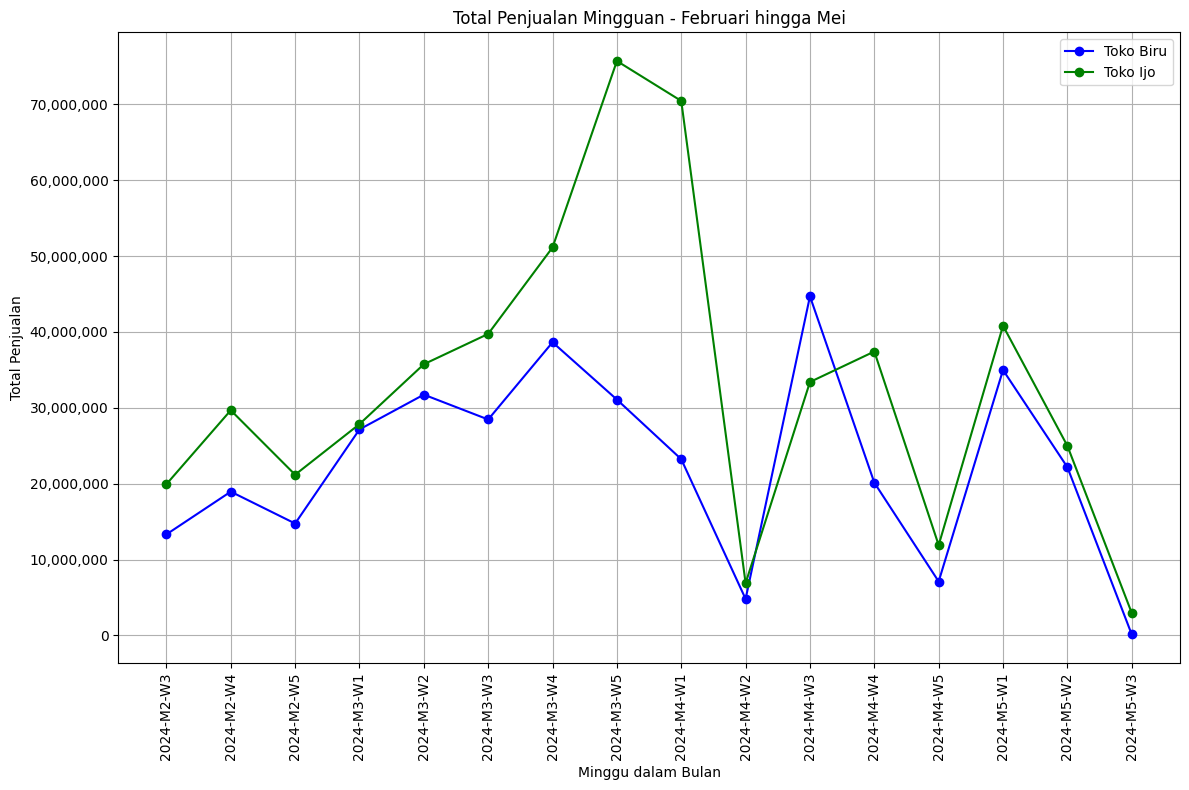

In [ ]:
# Filter data for the months February to May
filtered_df_case2 = df_case2[(df_case2['Month'] >= 2) & (df_case2['Month'] <= 5)]

# Check if the filtered data is not empty
if not filtered_df_case2.empty:
    # Group data by MonthWeekLabel and Channel, then calculate total sales per week
    weekly_sales = filtered_df_case2.groupby(['MonthWeekLabel', 'Channel'])['Total'].sum().unstack()

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Plot the line plot for total weekly sales for each channel
    plt.plot(weekly_sales.index, weekly_sales['Toko Biru'], marker='o', color='blue', label='Toko Biru')
    plt.plot(weekly_sales.index, weekly_sales['Toko Ijo'], marker='o', color='green', label='Toko Ijo')

    # Set the title and axis labels
    plt.title('Total Penjualan Mingguan - Februari hingga Mei')
    plt.xlabel('Minggu dalam Bulan')
    plt.ylabel('Total Penjualan')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Format y-axis labels for better readability
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

    # Add legend
    plt.legend()

    # Show grid and tight layout
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("Tidak ada data untuk bulan Februari hingga Mei.")

### Analisis Penjualan Mingguan 15 Februari - 14 Mei 2024 (Merge Week)

1. 2024-M2-W5 (hanya 4 hari) digabung dengan 2024-M3-W1 (hanya 3 hari) menjadi 1 minggu di 2024-M3-W1
2. 2024-M4-W5 (Hanya 2 hari) digabung dengan 2024-M5-W1 (hanya 5 hari) menjadi minggu di 2024-M5-W1

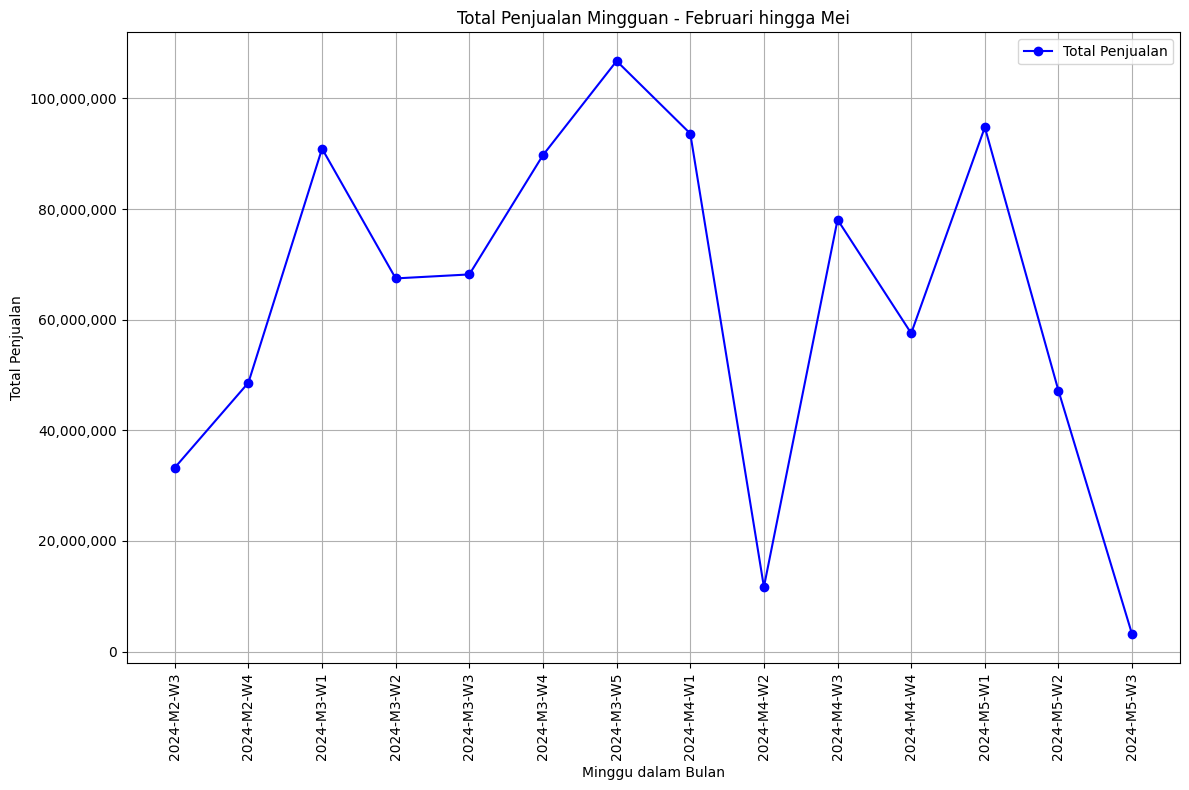

In [ ]:
# Filter data for the months February to May
filtered_df_case2 = df_case2[(df_case2['Month'] >= 2) & (df_case2['Month'] <= 5)]

# Check if the filtered data is not empty
if not filtered_df_case2.empty:
    # Identify weeks to be merged
    merge_weeks = {
        '2024-M2-W5': '2024-M3-W1',
        '2024-M4-W5': '2024-M5-W1'
    }

    # Create a new column for merged week labels
    filtered_df_case2['MergedWeekLabel'] = filtered_df_case2['MonthWeekLabel'].replace(merge_weeks)

    # Group data by the merged week labels and calculate total sales per week for all channels
    weekly_sales = filtered_df_case2.groupby('MergedWeekLabel')['Total'].sum()

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Plot the line plot for total weekly sales
    plt.plot(weekly_sales.index, weekly_sales.values, marker='o', color='blue', label='Total Penjualan')

    # Set the title and axis labels
    plt.title('Total Penjualan Mingguan - Februari hingga Mei')
    plt.xlabel('Minggu dalam Bulan')
    plt.ylabel('Total Penjualan')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Format y-axis labels for better readability
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

    # Add legend
    plt.legend()

    # Show grid and tight layout
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("Tidak ada data untuk bulan Februari hingga Mei.")

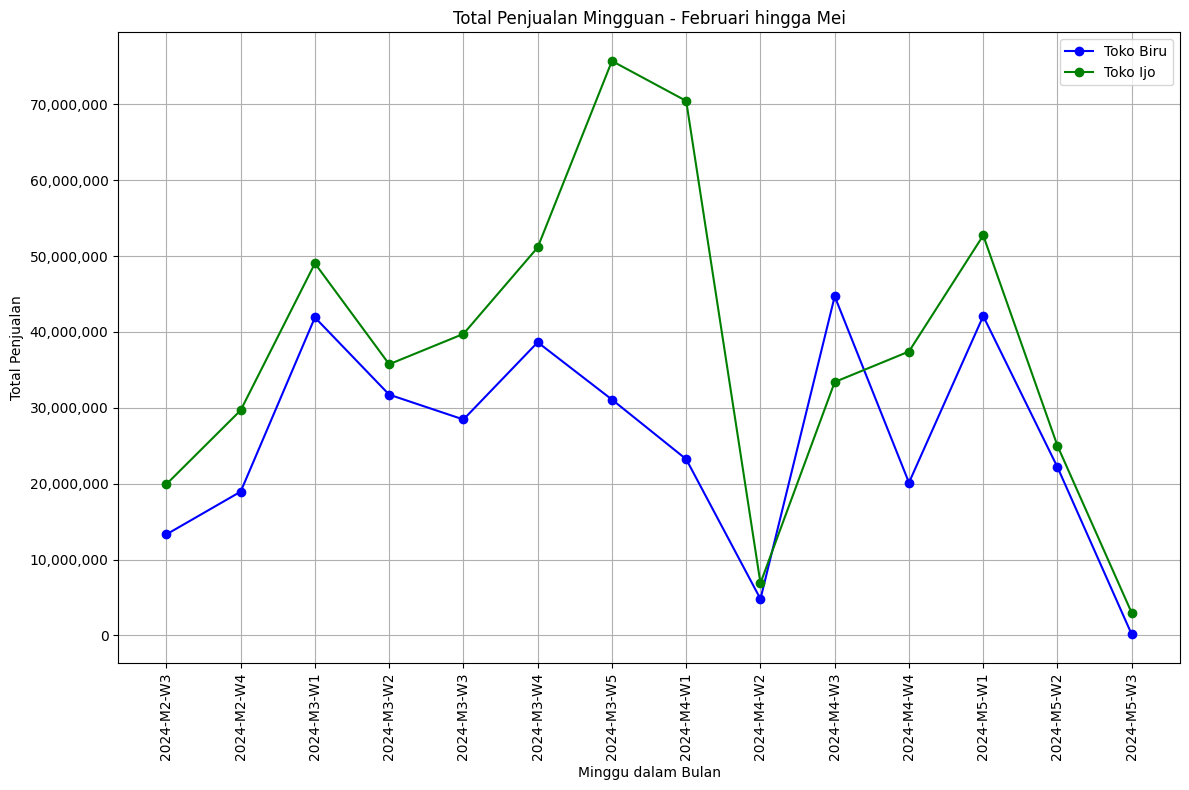

In [ ]:
# Filter data for the months February to May
filtered_df_case2 = df_case2[(df_case2['Month'] >= 2) & (df_case2['Month'] <= 5)]

# Check if the filtered data is not empty
if not filtered_df_case2.empty:
    # Identify weeks to be merged
    merge_weeks = {
        '2024-M2-W5': '2024-M3-W1',
        '2024-M4-W5': '2024-M5-W1'
    }

    # Create a new column for merged week labels
    filtered_df_case2['MergedWeekLabel'] = filtered_df_case2['MonthWeekLabel'].replace(merge_weeks)

    # Group data by the merged week labels and channels, then calculate total sales per week
    weekly_sales = filtered_df_case2.groupby(['MergedWeekLabel', 'Channel'])['Total'].sum().unstack()

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Plot the line plot for total weekly sales for each channel
    plt.plot(weekly_sales.index, weekly_sales['Toko Biru'], marker='o', color='blue', label='Toko Biru')
    plt.plot(weekly_sales.index, weekly_sales['Toko Ijo'], marker='o', color='green', label='Toko Ijo')

    # Set the title and axis labels
    plt.title('Total Penjualan Mingguan - Februari hingga Mei')
    plt.xlabel('Minggu dalam Bulan')
    plt.ylabel('Total Penjualan')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Format y-axis labels for better readability
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

    # Add legend
    plt.legend()

    # Show grid and tight layout
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("Tidak ada data untuk bulan Februari hingga Mei.")

Dari hasil visualisasi diatas dapat dilihat bahwa Penjualan tertinggi adalah pada Bulan ke 3 (Maret) Minggu ke (5) yaitu antara tanggal 25 Maret – 31 Maret 2024 menyentuh angka Rp. 106.777.653, untuk pendapatan dari Channel toko Hijau menyumbang sekitar 70% dengan total Rp.75.695.673 pendapatan dan Toko Biru Sekitar 30% dengan total Rp. 31.081/980 dari total keseluruhan pendapatan pada bulan Maret Minggu ke 5. Pelonjakan pendapatan ini terindikasi terjadi karena permintaan suplemen pada minggu tersebut sangat tinggi. Hal ini kemungkinan disebabkan oleh kebutuhan pelanggan akan suplemen untuk menghadapi masa mudik lebaran yang terjadi satu minggu berikutnya. Selain itu, pesanan pada minggu ini juga meningkat karena faktor keterlambatan pengiriman yang sering terjadi menjelang lebaran. (sangkut pautkan sama punya si Wafiq Efisiensi_Pengiriman)
Angka penjualan terendah Pada
-	2024-M5-W3 Bulan ke 5 (Mei) Minggu ke (3) yaitu antara tanggal 13 – 19 Mei 2024, akan tetapi data yang diberikan terbatas sampai tanggal 14 Mei 2024. Maka
-	2024-M4-W2 Bulan 4 (April) Minggu ke 2 yaitu antara tanggal 8 – 14 April 2024, akan tetapi pada range waktu tersebut toko melakukan libur selama 3 hari dari tanggal 9 – 11 April 2024
-	2024-M2-W3 Bulan ke 2 (Februari) Minggu ke (3) yaitu antara tanggal 12 - 18 Februari 2024, akan tetapi pada range waktu tersebut hanya terdapat data 4 hari yang diberikan  
-	2024-M2-W4 Bulan ke 2 (Februari) Minggu ke (4) yaitu antara tanggal 19 – 25 Februari 2024 menunjukkan penurunan terbesar dalam penjualan. Hal ini kemungkinan disebabkan oleh waktu yang mendekati akhir bulan, namun belum sepenuhnya akhir bulan, sehingga kemungkinan besar gaji belum cair. Akibatnya, banyak orang belum membeli suplemen mereka. Pada minggu ini Pendapatan hanya menyentuh 50 juta dengan sebaran di toko Ijo Sebanyak 30 juta, dan toko Biro hampir menyentuh 20 juta


### Analisis Seluruh Hari Selama 1 Bulan periode 15 Februari - 14 Mei 2024

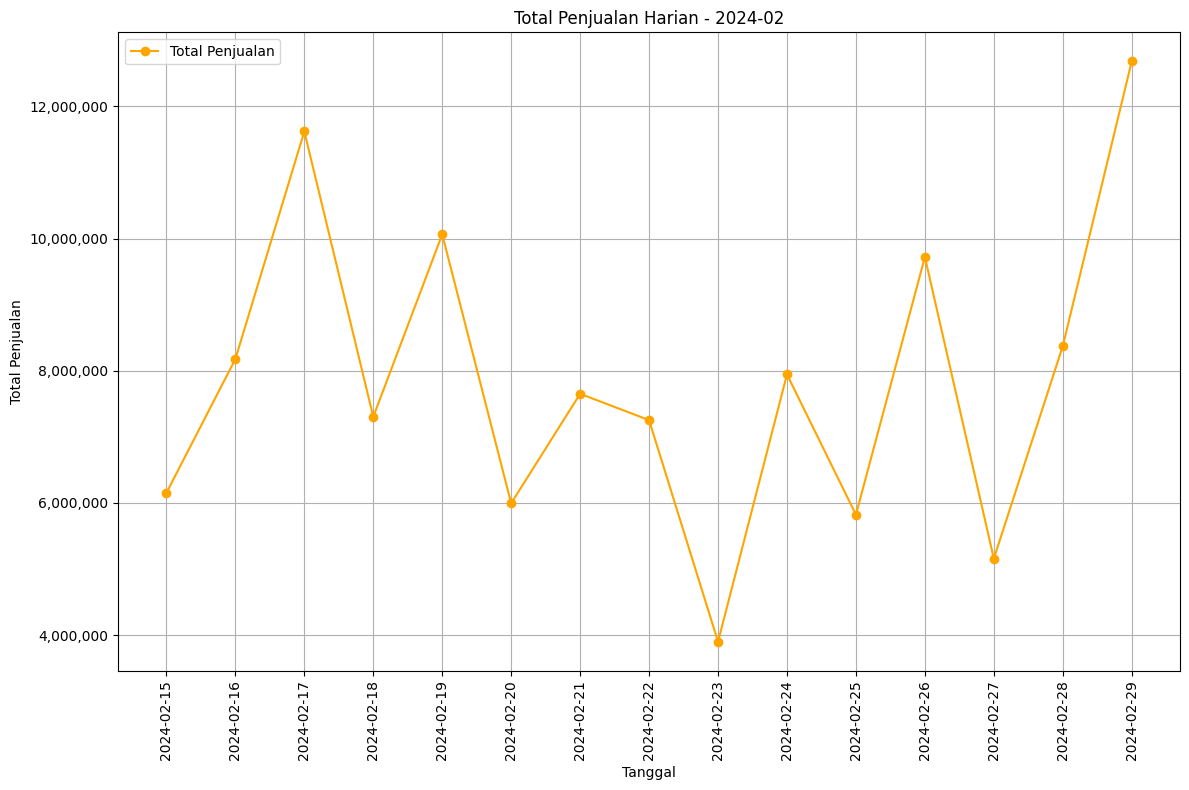

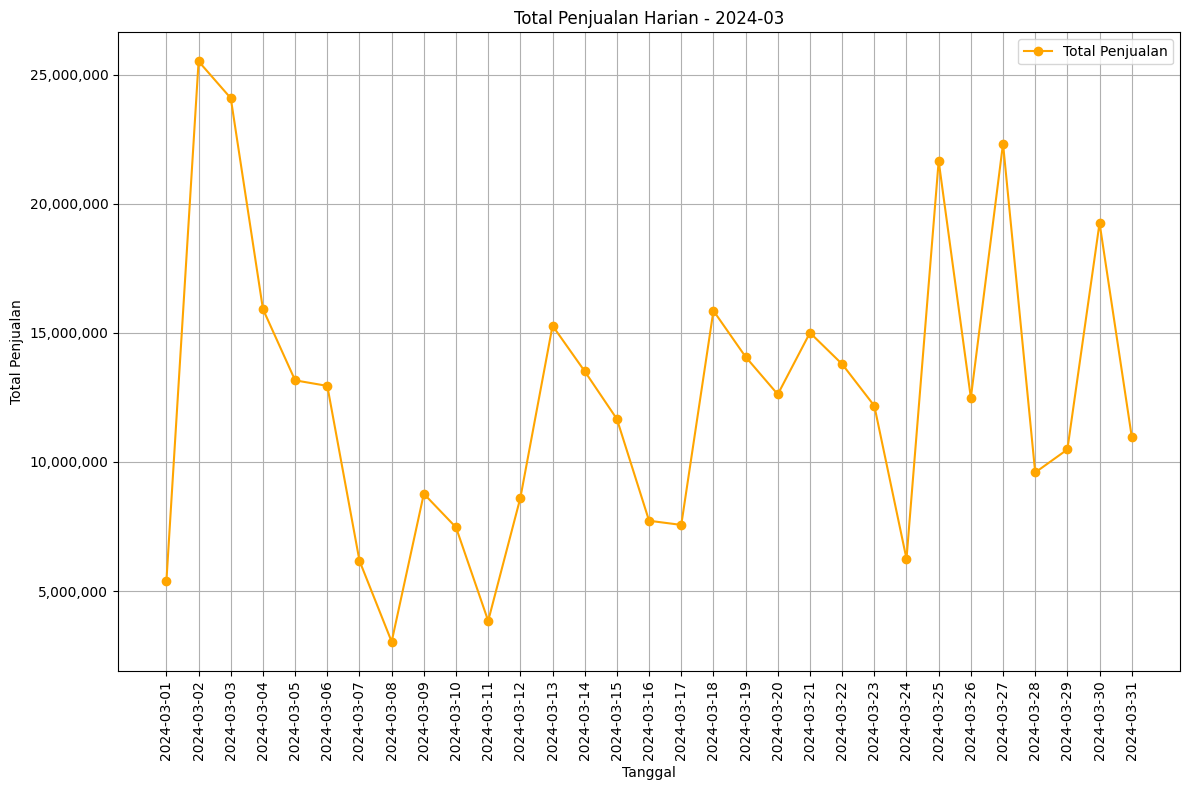

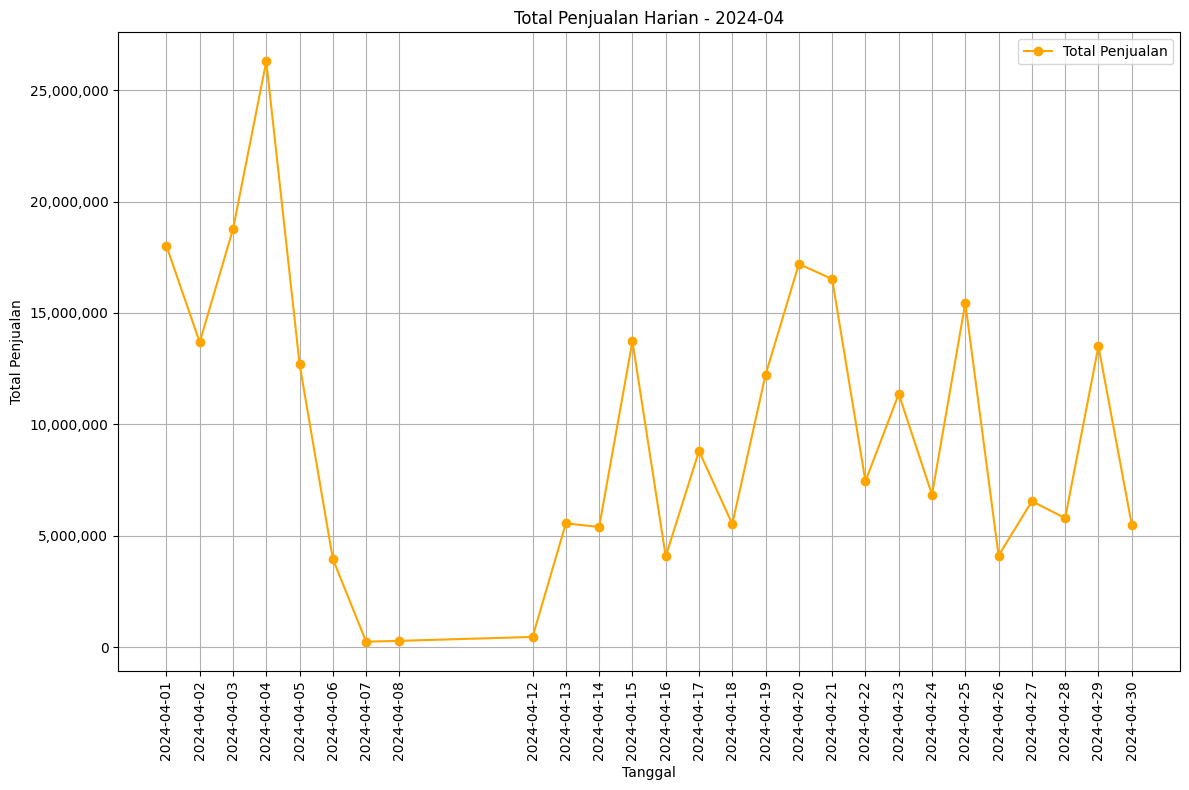

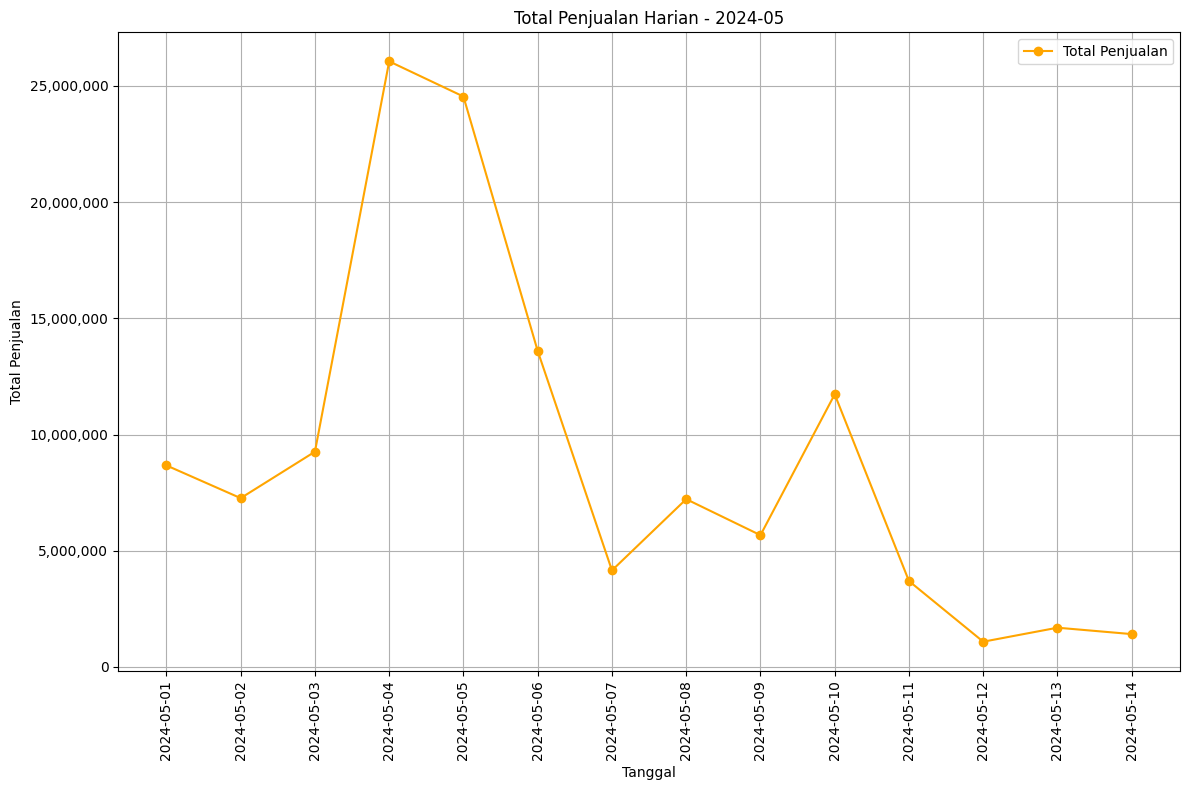

In [ ]:
# Membuat visualisasi gabungan untuk setiap bulan
for month in range(2, 6):  # Loop dari bulan Februari hingga Mei

    # Memfilter data untuk bulan tertentu
    month_data = df_case2[df_case2['Month'] == month]

    # Pengecekan apakah data tidak kosong
    if not month_data.empty:
        # Menentukan bulan dan tahun dari data
        month_year = month_data['Waktu Pembayaran'].dt.to_period('M').iloc[0]

        # Mengelompokkan data berdasarkan tanggal dan menghitung total pendapatan per hari
        daily_sales = month_data.groupby('Day')['Total'].sum()

        # Mengatur ukuran plot
        plt.figure(figsize=(12, 8))

        # Plotting line plot untuk total pendapatan per hari
        plt.plot(daily_sales.index, daily_sales.values, marker='o', color='orange', label='Total Penjualan')

        # Mengatur judul dan label sumbu
        plt.title(f'Total Penjualan Harian - {month_year}')
        plt.xlabel('Tanggal')
        plt.ylabel('Total Penjualan')

        # Mengatur label sumbu x agar setiap tanggal tampil dengan sudut 90 derajat
        plt.xticks(daily_sales.index, rotation=90)

        # Mengatur format sumbu y agar lebih mudah dibaca
        plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

        # Menambahkan legenda
        plt.legend()

        # Menampilkan grid dan layout yang ketat
        plt.grid(True)
        plt.tight_layout()

        # Menampilkan plot
        plt.show()
    else:
        print(f"Tidak ada data untuk bulan {month}")

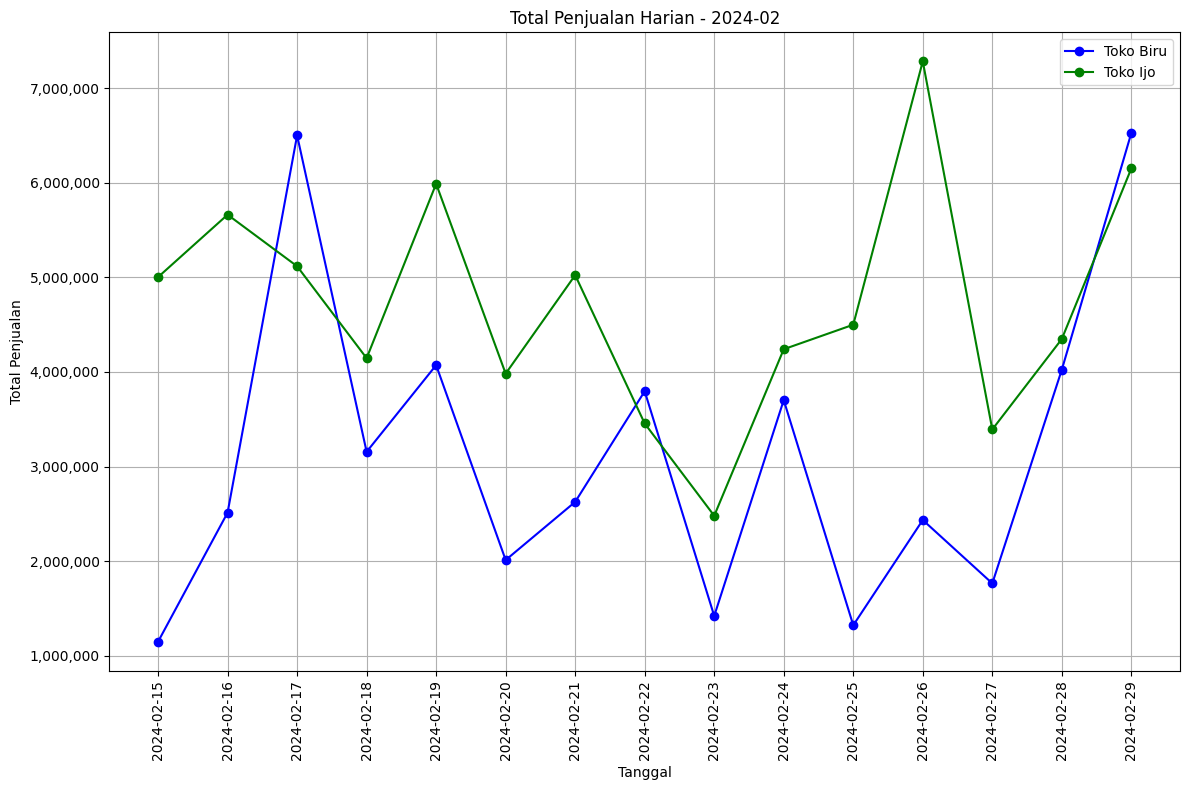

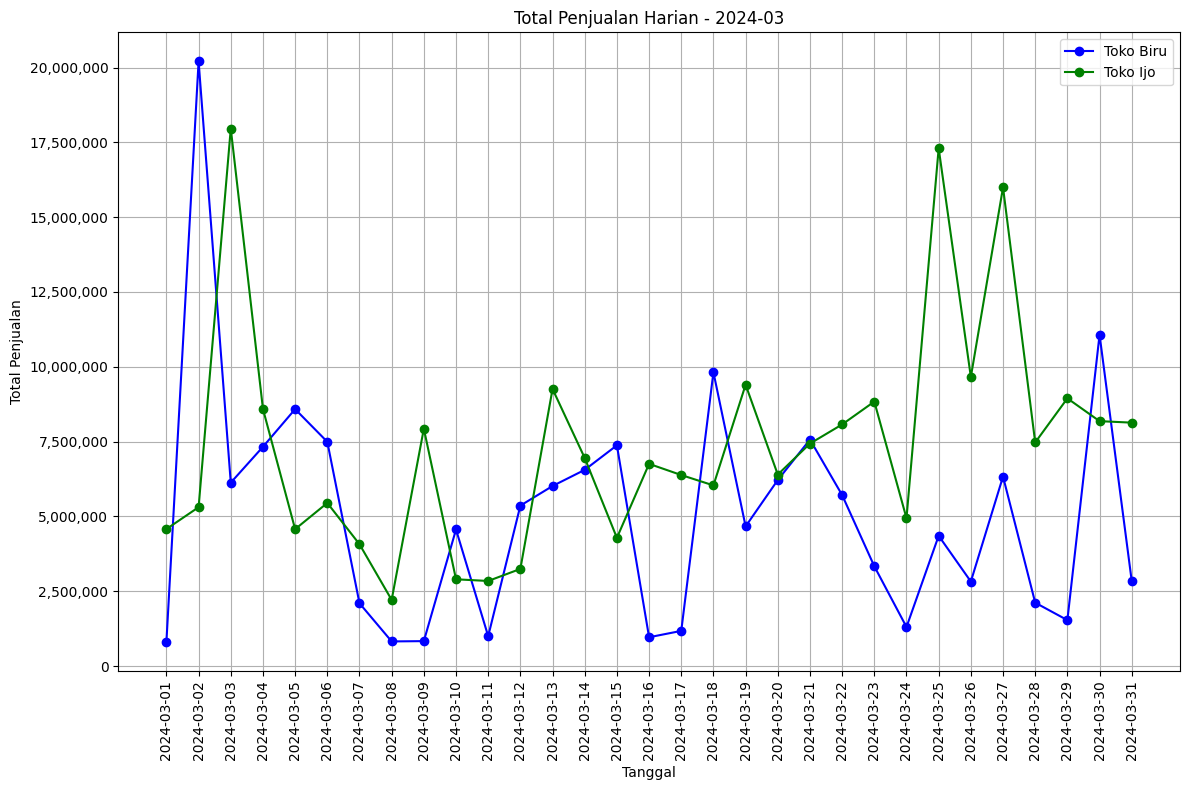

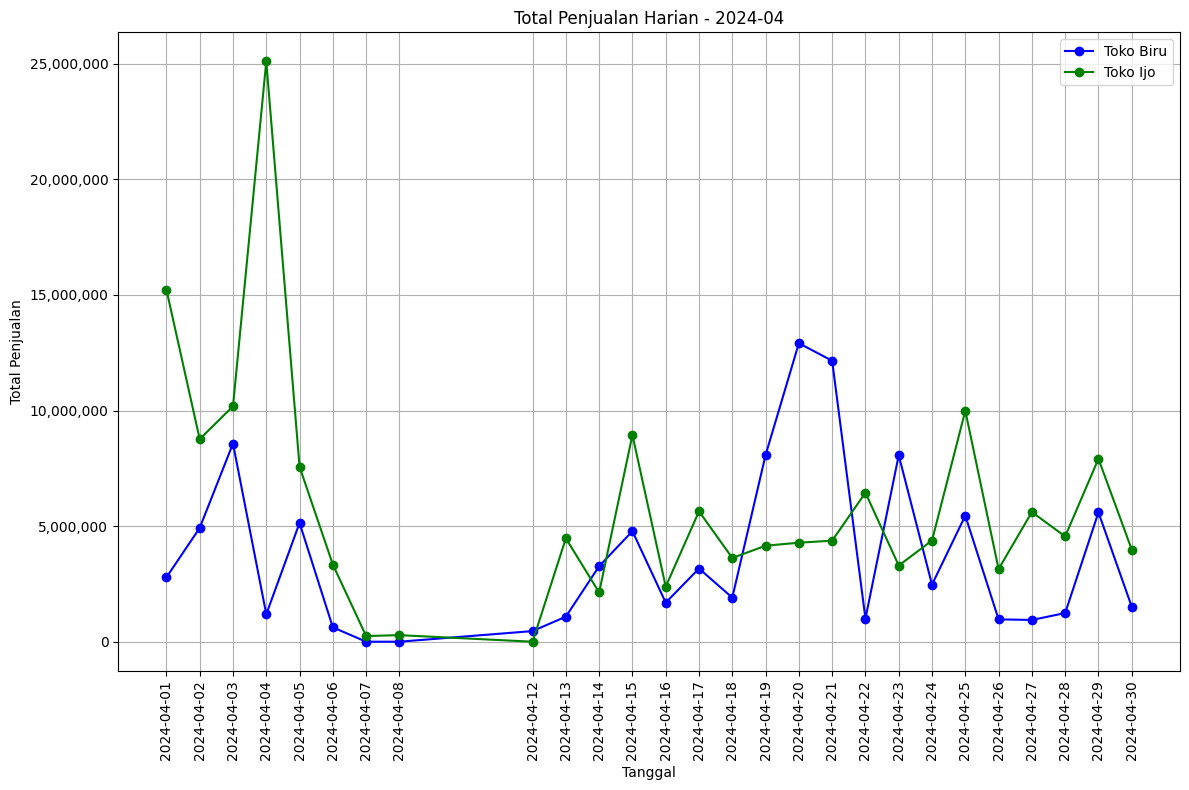

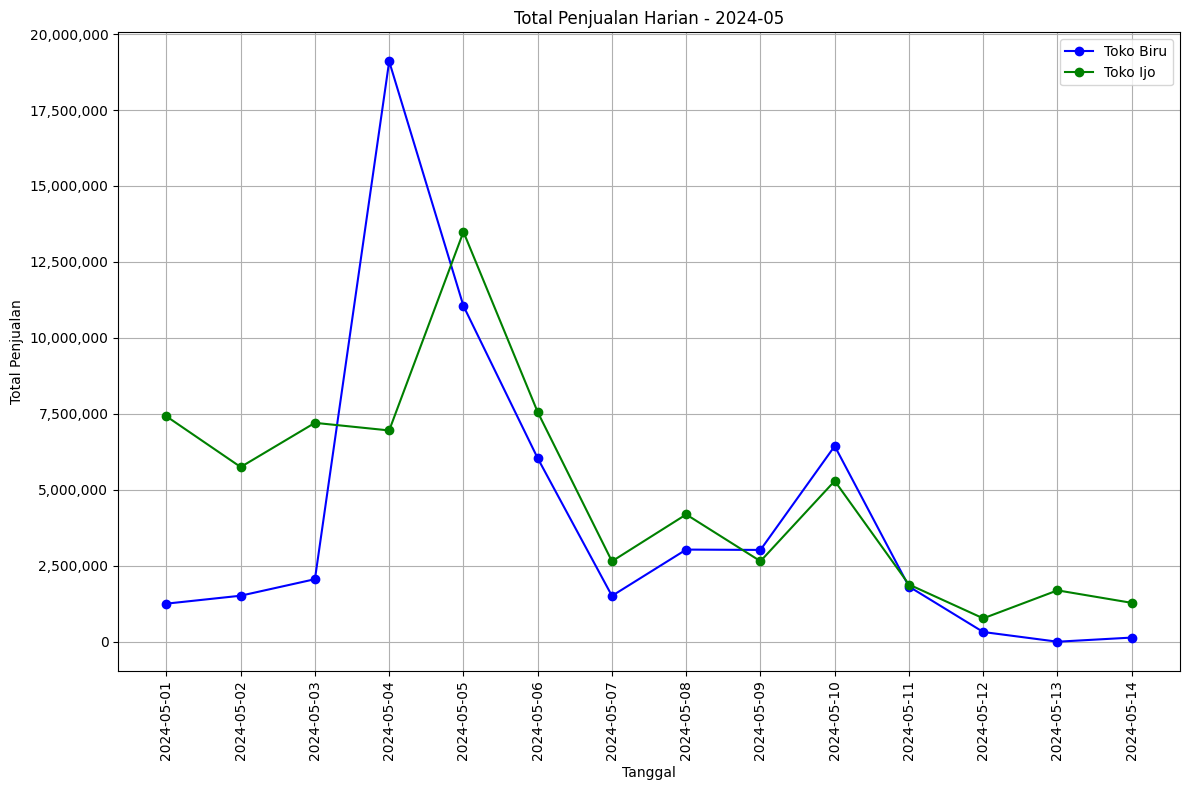

In [ ]:

# Membuat visualisasi gabungan untuk setiap bulan
for month in range(2, 6):  # Loop dari bulan Februari hingga Mei

    # Memfilter data untuk bulan tertentu
    month_data = df_case2[df_case2['Month'] == month]

    # Pengecekan apakah data tidak kosong
    if not month_data.empty:
        # Menentukan bulan dan tahun dari data
        month_year = month_data['Waktu Pembayaran'].dt.to_period('M').iloc[0]

        # Mengelompokkan data berdasarkan tanggal dan channel, lalu menghitung total pendapatan per hari per channel
        daily_sales = month_data.groupby(['Day', 'Channel'])['Total'].sum().unstack(fill_value=0)

        # Mengatur ukuran plot
        plt.figure(figsize=(12, 8))

        # Plotting line plot untuk total pendapatan per hari
        plt.plot(daily_sales.index, daily_sales['Toko Biru'], marker='o', color='blue', label='Toko Biru')
        plt.plot(daily_sales.index, daily_sales['Toko Ijo'], marker='o', color='green', label='Toko Ijo')

        # Mengatur judul dan label sumbu
        plt.title(f'Total Penjualan Harian - {month_year}')
        plt.xlabel('Tanggal')
        plt.ylabel('Total Penjualan')

        # Mengatur label sumbu x agar setiap tanggal tampil dengan sudut 90 derajat
        plt.xticks(daily_sales.index, rotation=90)

        # Mengatur format sumbu y agar lebih mudah dibaca
        plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

        # Menambahkan legenda
        plt.legend()

        # Menampilkan grid dan layout yang ketat
        plt.grid(True)
        plt.tight_layout()

        # Menampilkan plot
        plt.show()
    else:
        print(f"Tidak ada data untuk bulan {month}")


1. Visualisasi Bulan Februari
- Dari visualisasi yang diberikan, pola harian penjualan pada 12-29 Februari 2024 menunjukkan bahwa angka penjualan tertinggi terjadi pada Kamis tanggal 29 Februari, dengan penjualan mencapai lebih dari Rp.12.681.442. Sebaran penjualan menunjukkan bahwa Toko Biru sedikit lebih banyak penjualannya dengan total Rp. 6.528.196 dibandingkan dengan Toko Hijau, yaitu sekitar Rp.6.153.246. Penjualan tertinggi pada akhir bulan ini dapat dijelaskan oleh adanya tanggal kabisat pada tanggal 29 Februari, yang terjadi setiap empat tahun sekali. Pada tanggal ini, pelanggan yang biasanya membeli di awal bulan mungkin memutuskan untuk membeli pada akhir bulan.

- Penjualan terendah pada terjadi pada Jumat tanggal 23 Februari 2024, dengan total Pendapatan penjualan sebesar Rp. 3.898.784. Sebaran penjualan menunjukkan bahwa Toko Biru mencatat penjualan sekitar Rp. 1.419.466, sedangkan Toko Hijau mencatat penjualan sekitar Rp. 2.479.318.

2. Visualisasi Bulan Maret
- Dari hasil visualisasi penjualan harian selama bulan Maret 2024, dapat terlihat bahwa penjualan tertinggi terjadi pada Sabtu tanggal 2 Maret 2024 dengan pendapatan sekitar Rp. 25.515.242. Sebaran penjualan menunjukkan bahwa Toko Biru menyumbang hampir 80% dari pendapatan hari itu, yaitu sekitar Rp. 20.205.558, sementara Toko Hijau menyumbang sekitar Rp. 5.309.684. Penjualan tinggi pada awal bulan ini kemungkinan disebabkan oleh pelanggan yang biasanya menyetok suplemen untuk satu bulan ke depan serta bertepatan dengan waktu gajian sehingga terjadi peningkatan belanja bulanan.
- Akan tetapi pada tanggal 3 Maret 2024 juga terjadi lonjakan pembelian yang tidak jauh berbeda dengan tanggal 2 dan terjadi pada toko Hijau, ini bisa terjadi karena biasanya pada tanggal cantik 3-3 marketplace memberikan banyak promo besar dan menarik
Sebaliknya, penjualan terendah terjadi pada Jumat, 8 Maret 2024, dengan total penjualan di bawah Rp. 3.038.301 dengan sebaran penjualan pada Toko Hijau disekitar 2 juta sekian, dan toko Biru di bawah 2 Juta.

3. Visualisasi Bulan April
- Dari hasil visualisasi data, dapat terlihat bahwa angka penjualan tertinggi terjadi pada hari Kamis, 4 April 2024, di mana perusahaan mendapatkan total penjualan lebih dari Rp. 26.294.129 dalam sehari dimana ini bisa terjadi karena tanggal cantik 4-4 yang biasanya marketplace memberikan promo besar-besar dan menarik pada marketplace. Yang menarik adalah pada toko Ijo grafiknya naik drastis, sedangkan pada Toko Biru grafiknya turun. Sebaran penjualan menunjukkan bahwa Toko Hijau menyumbang sekitar Rp. 25.107.131, dan Pendapatan Toko Biru sebesar Rp. 1.186.998, yang berarti Toko Hijau menyumbang hampir 90% dari pendapatan pada hari tersebut.

- Sebaliknya, penjualan terendah terjadi pada hari Minggu, 7 April 2024, dengan hanya dua transaksi dan hampir tidak ada pendapatan. Pola tren ini terlihat menurun dari tanggal 5 hingga 8 April, tanggal 9 hingga 12 juga tidak terdapat transaksi apapun dari toko. Pada periode ini, lebaran hampir tiba dan toko-toko kemungkinan besar tutup. Pembeli mungkin khawatir tentang keterlambatan pengiriman dan kemungkinan mereka masih dalam perjalanan mudik sehingga tidak berada di rumah untuk menerima barang yang dipesan

4. Visualisasi Bulan Mei
- Selama dua minggu visualisasi bulan Mei, kami melihat tren yang menarik dalam pendapatan toko. Pada Sabtu, 4 Mei 2024, terjadi lonjakan pendapatan yang signifikan, dengan Angka Penjualan Terbesar dengan total Rp. 26.054.771. Penjualan tertinggi terpusat pada Toko Biru, menyumbang sekitar 78% dari pendapatan tersebut, dengan pendapatan Rp. 19.101.636, sementara Toko Hijau berkontribusi pada sisanya, dengan pendapatan sekitar Rp. 6.953.135. Di sisi lain, penjualan terendah terjadi pada Minggu, 12 Mei 2024, dengan pendapatan hanya mendapatkan Rp. 1.087.421 dengan sebaran pendapatan pada toko Ijo sebesar Rp.768.305 dan Toko Biru sebesar Rp. 319.116








### Analisis Keuntungan Tiap Jam Seluruh Minggu

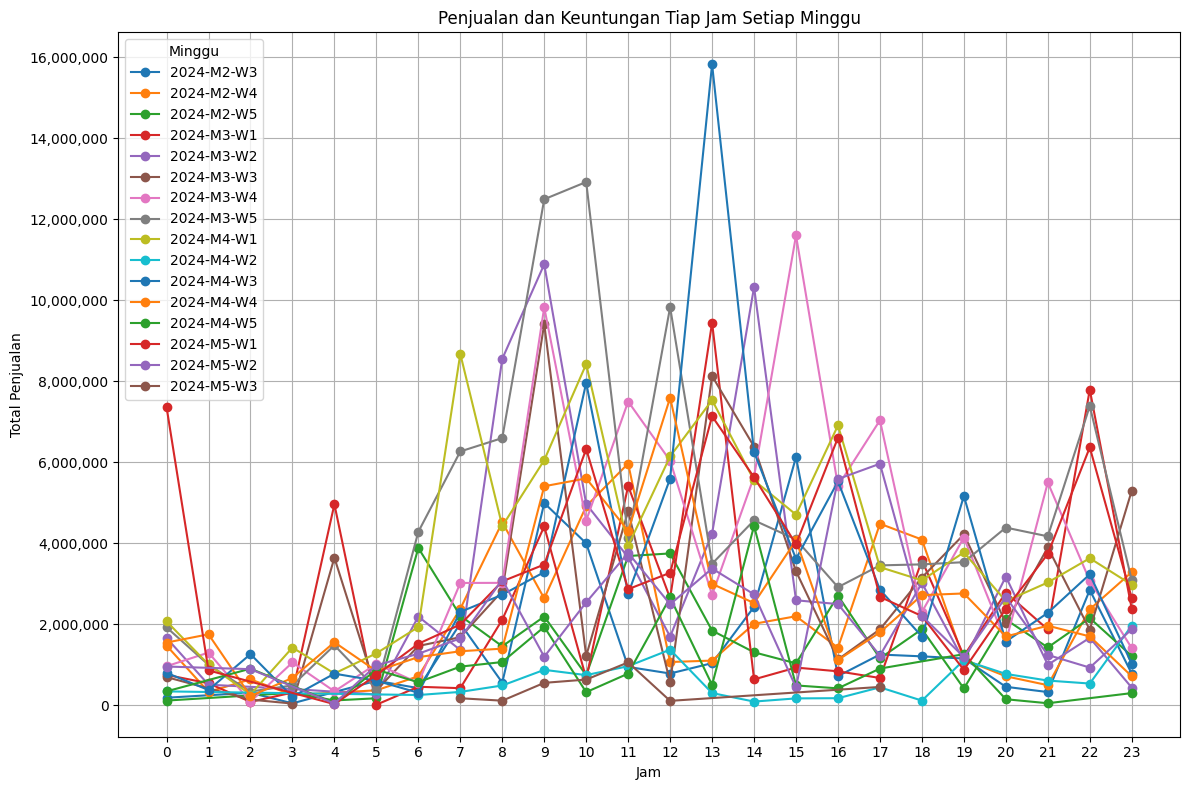

In [ ]:
# Mengelompokkan data berdasarkan 'MonthWeekLabel' dan 'Waktu Pembayaran' (jam) untuk menghitung penjualan per jam per minggu
df_case2['Hour'] = df_case2['Waktu Pembayaran'].dt.hour
weekly_hourly_sales = df_case2.groupby(['MonthWeekLabel', 'Hour'])['Total'].sum().reset_index()

# Function to format the Y axis
def y_formatter(x, pos):
    return f'{int(x):,}'

# Plotting
unique_labels = weekly_hourly_sales['MonthWeekLabel'].unique()

plt.figure(figsize=(12, 8))
for label in unique_labels:
    data_subset = weekly_hourly_sales[weekly_hourly_sales['MonthWeekLabel'] == label]
    plt.plot(data_subset['Hour'], data_subset['Total'], marker='o', linestyle='-', label=label)

plt.title('Penjualan dan Keuntungan Tiap Jam Setiap Minggu')
plt.xlabel('Jam')
plt.ylabel('Total Penjualan')
plt.xticks(np.arange(0, 24, 1))  # Set x-axis ticks to represent each hour
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))  # Apply the formatter to the y-axis
plt.legend(title='Minggu')
plt.grid(True)
plt.tight_layout()
plt.show()

Dari analisis rata-rata total penjualan dalam rentang waktu dari 12 Februari hingga 14 Mei 2024, terlihat bahwa pendapatan terbesar pada jam 13.00 sangat besar, ini bisa terjadi karena orang yang mungkin pada jam tersebut berbelanja dengan santai di waktu istirahat nya, dan memungkinkan untuk melakukan belanja lebih banyak pada jam tersebut (tambahin apa gitu)

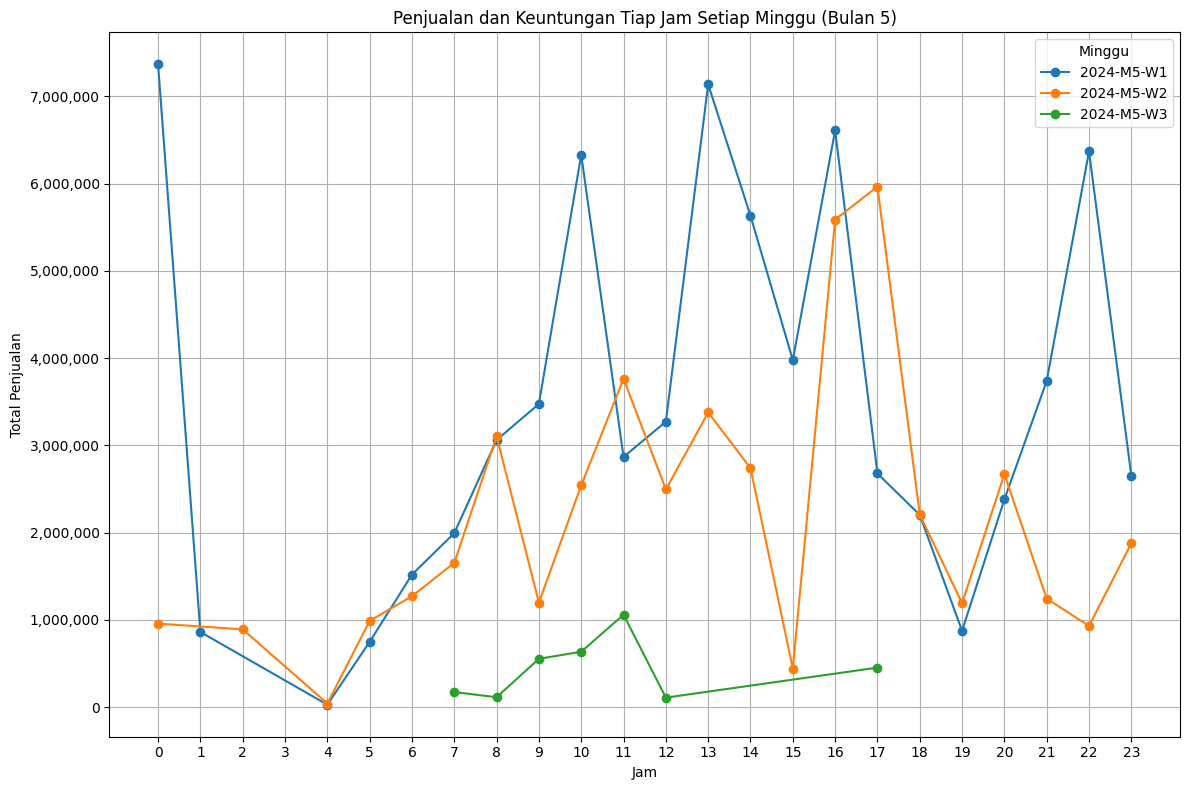

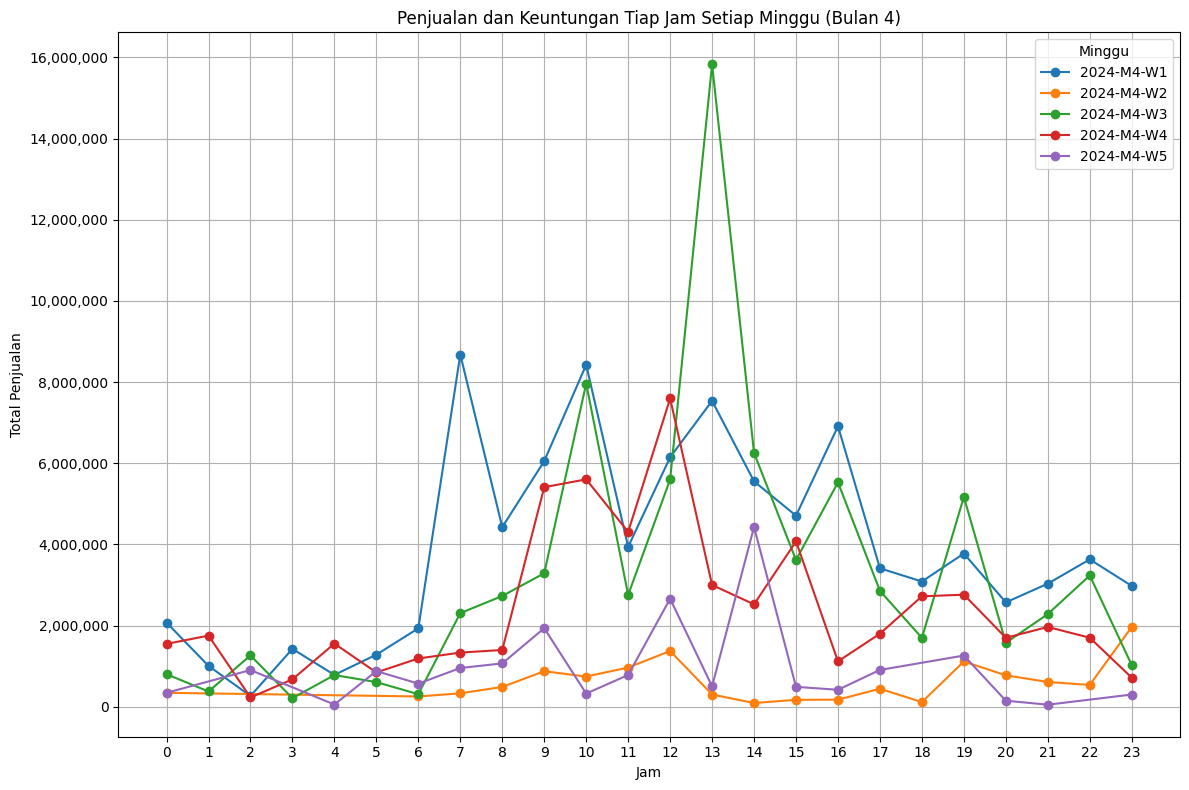

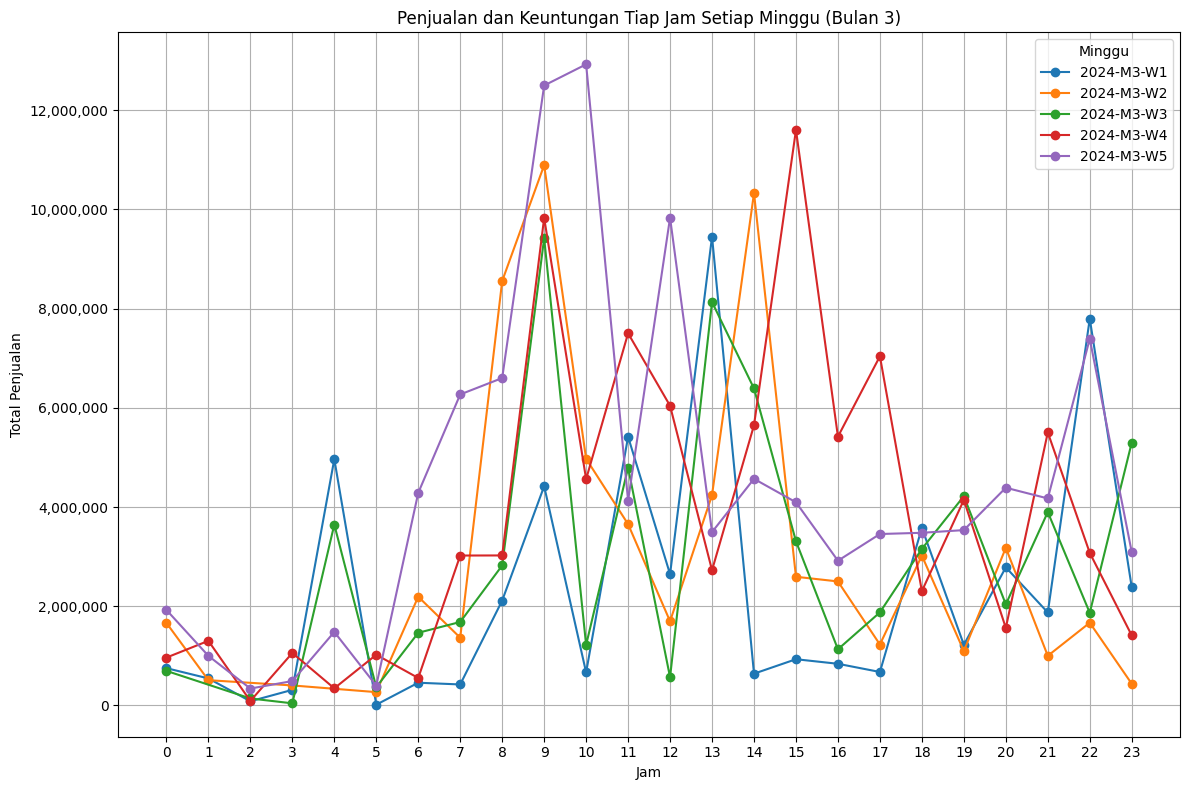

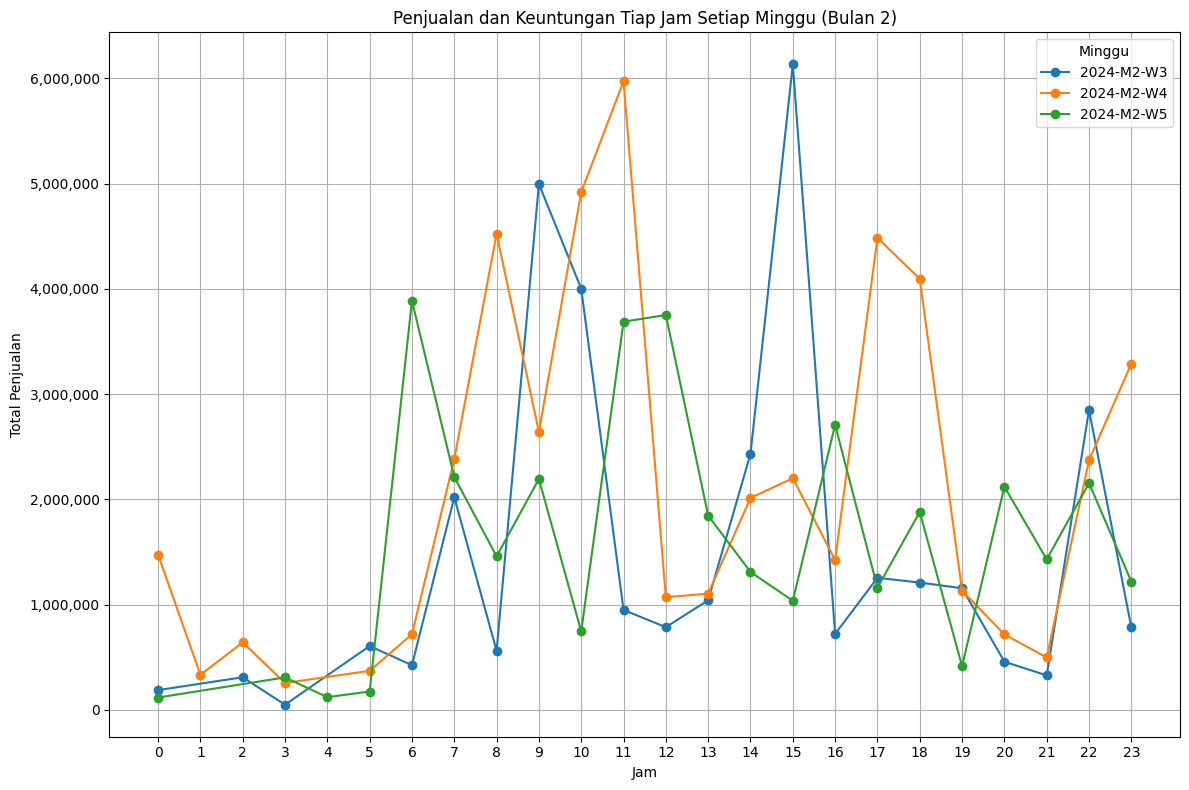

In [ ]:

# Menambahkan kolom 'Hour' untuk mengekstrak jam dari 'Waktu Pembayaran'
df_case2['Hour'] = df_case2['Waktu Pembayaran'].dt.hour

# Mengelompokkan data berdasarkan 'MonthWeekLabel' dan 'Hour' untuk menghitung penjualan per jam per minggu
weekly_hourly_sales = df_case2.groupby(['MonthWeekLabel', 'Hour'])['Total'].sum().reset_index()

# Function to format the Y axis
def y_formatter(x, pos):
    return f'{int(x):,}'

# Plotting terpisah untuk setiap bulan
months = df_case2['Month'].unique()

for month in months:
    plt.figure(figsize=(12, 8))
    monthly_data = weekly_hourly_sales[weekly_hourly_sales['MonthWeekLabel'].str.contains(f'-M{month}-')]
    unique_labels = monthly_data['MonthWeekLabel'].unique()

    for label in unique_labels:
        data_subset = monthly_data[monthly_data['MonthWeekLabel'] == label]
        plt.plot(data_subset['Hour'], data_subset['Total'], marker='o', linestyle='-', label=label)

    plt.title(f'Penjualan dan Keuntungan Tiap Jam Setiap Minggu (Bulan {month})')
    plt.xlabel('Jam')
    plt.ylabel('Total Penjualan')
    plt.xticks(np.arange(0, 24, 1))  # Set x-axis ticks to represent each hour
    plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))
    plt.legend(title='Minggu')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Analisis Jumlah Penjualan Tiap Jam pada Setiap Channel

In [ ]:
# Definisikan range waktu
time_ranges = {
    '00.01 - 03.00': range(0, 4),
    '03.01 - 06.00': range(4, 7),
    '06.01 - 09.00': range(7, 10),
    '09.01 - 12.00': range(10, 13),
    '12.01 - 15.00': range(13, 16),
    '15.01 - 18.00': range(16, 19),
    '18.01 - 21.00': range(19, 22),
    '21.01 - 00.00': range(22, 24),
}


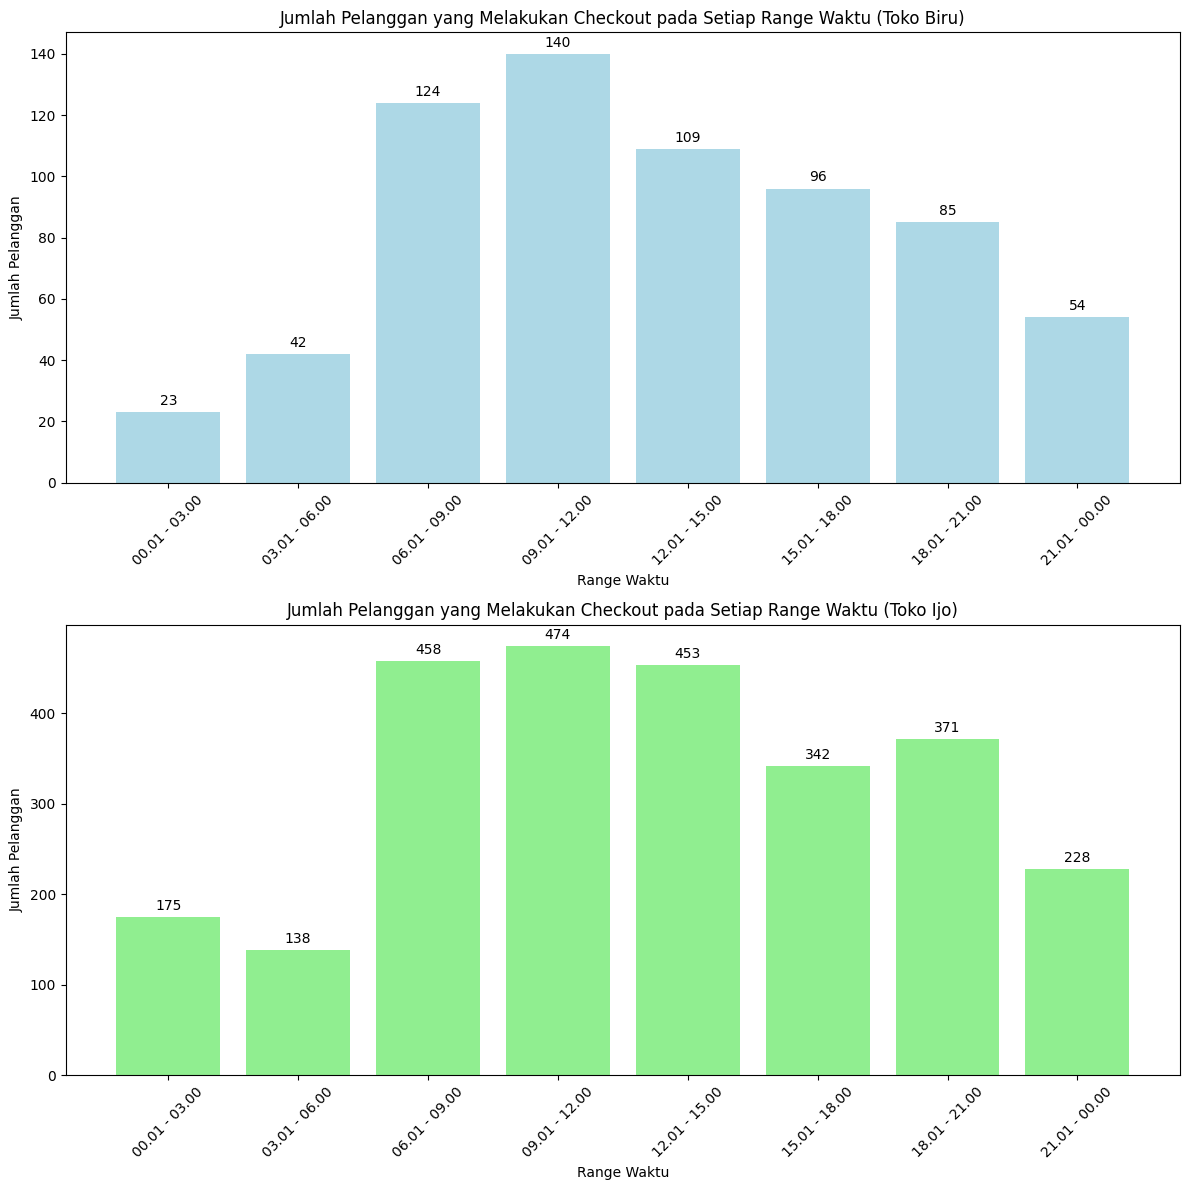

In [ ]:
# Inisialisasi dictionary untuk menyimpan jumlah pelanggan pada setiap range jam untuk masing-masing channel
checkout_counts_blue = {time_range: 0 for time_range in time_ranges}
checkout_counts_green = {time_range: 0 for time_range in time_ranges}

# Menghitung jumlah pelanggan pada setiap range jam untuk masing-masing channel
for hour, minute, channel in zip(df_case2['Hour'], df_case2['Minute'], df_case2['Channel']):
    for time_range, hours_range in time_ranges.items():
        if hour in hours_range:
            if channel == 'Toko Biru':
                checkout_counts_blue[time_range] += 1
            elif channel == 'Toko Ijo':
                checkout_counts_green[time_range] += 1
            break

# Membuat visualisasi dengan subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Visualisasi untuk Toko Biru
bars_blue = axes[0].bar(checkout_counts_blue.keys(), checkout_counts_blue.values(), color='lightblue')
axes[0].set_title('Jumlah Pelanggan yang Melakukan Checkout pada Setiap Range Waktu (Toko Biru)')
axes[0].set_xlabel('Range Waktu')
axes[0].set_ylabel('Jumlah Pelanggan')
axes[0].tick_params(axis='x', rotation=45)  # Agar label sumbu X dapat terlihat dengan baik

# Menambahkan angka pasti di atas setiap batang pada plot bar untuk Toko Biru
for bar in bars_blue:
    height = bar.get_height()
    axes[0].annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom')

# Visualisasi untuk Toko Ijo
bars_green = axes[1].bar(checkout_counts_green.keys(), checkout_counts_green.values(), color='lightgreen')
axes[1].set_title('Jumlah Pelanggan yang Melakukan Checkout pada Setiap Range Waktu (Toko Ijo)')
axes[1].set_xlabel('Range Waktu')
axes[1].set_ylabel('Jumlah Pelanggan')
axes[1].tick_params(axis='x', rotation=45)  # Agar label sumbu X dapat terlihat dengan baik

# Menambahkan angka pasti di atas setiap batang pada plot bar untuk Toko Ijo
for bar in bars_green:
    height = bar.get_height()
    axes[1].annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()


Dari visualisasi yang kami analisis, terlihat bahwa rata-rata pelanggan melakukan checkout antara jam 09.01 hingga 12.00. dengan perolehan di toko hijau sebanyak 474  pelanggan dan 140  pelanggan di toko biru, Ini mungkin disebabkan oleh pelanggan yang melakukan checkout saat istirahat atau di sela-sela waktu kerja, atau bisa juga terjadi karena pada jam tersebut toko memberikan diskon, dan mereka memiliki waktu luang untuk berbelanja. Selain itu, terdapat lonjakan pelanggan antara jam 06.01 hingga 15.00, yang berkorelasi dengan jam kerja aktif. Hal ini menunjukkan bahwa rentang waktu tersebut merupakan periode di mana pelanggan aktif berbelanja, mungkin saat mereka sedang istirahat atau memiliki waktu luang di sekitar aktivitas kerja mereka.

### Analisis Rata rata Pendapatan Tiap Jam

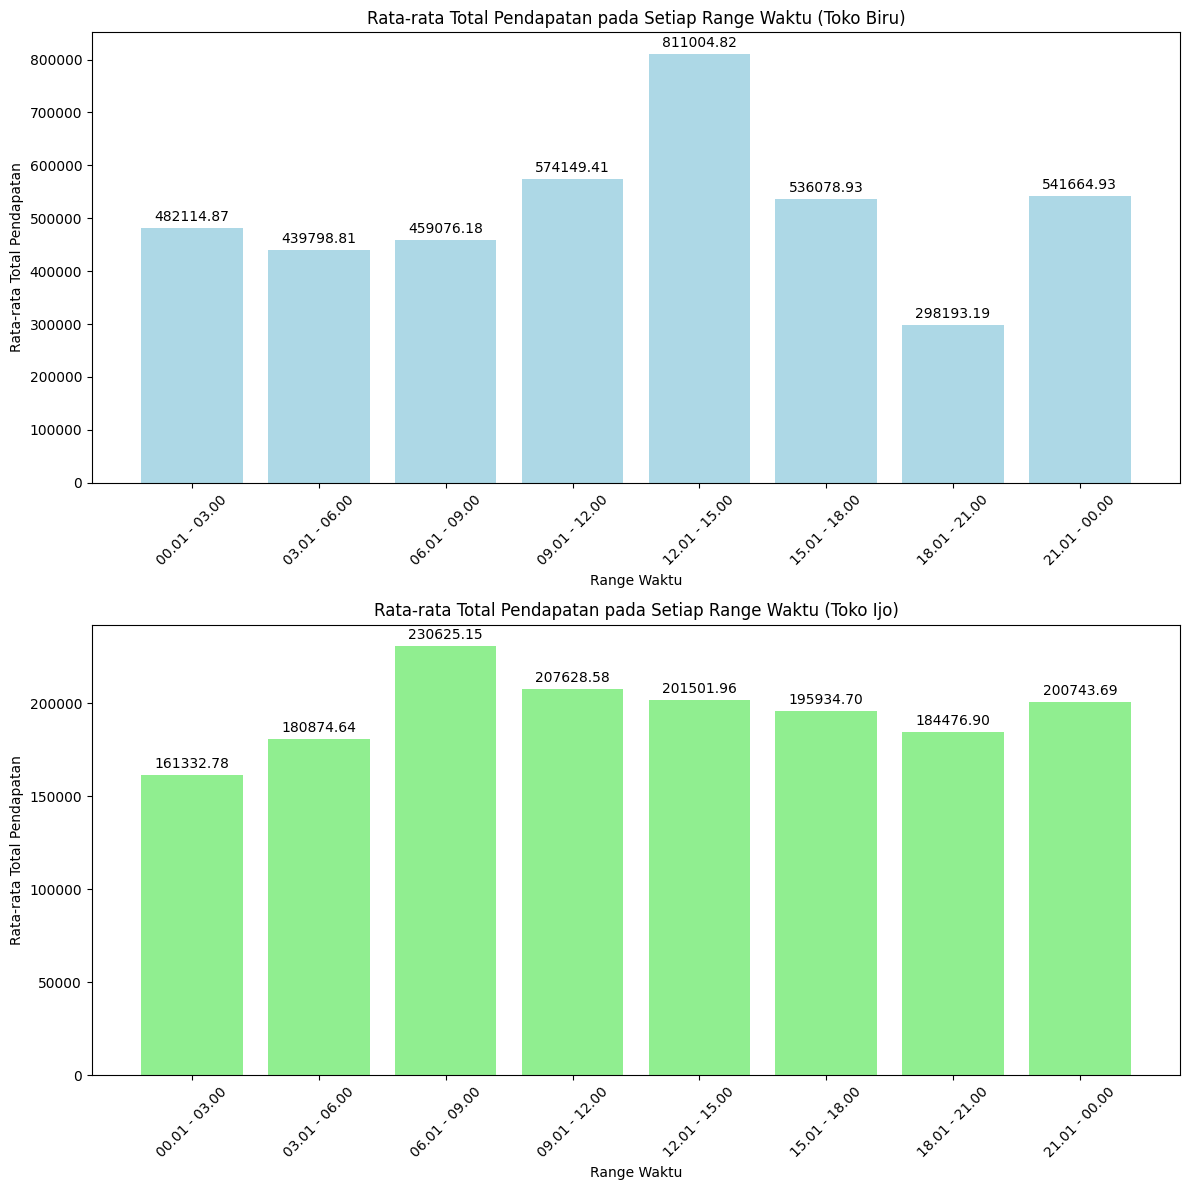

In [ ]:
# Inisialisasi dictionary untuk menyimpan total pendapatan pada setiap range jam untuk setiap channel
total_sales_blue = {time_range: [] for time_range in time_ranges}
total_sales_green = {time_range: [] for time_range in time_ranges}

# Mengumpulkan total pendapatan pada setiap range jam untuk setiap channel
for hour, minute, total, channel in zip(df_case2['Hour'], df_case2['Minute'], df_case2['Total'], df_case2['Channel']):
    for time_range, hours_range in time_ranges.items():
        if hour in hours_range:
            if channel == 'Toko Biru':
                total_sales_blue[time_range].append(total)
            elif channel == 'Toko Ijo':
                total_sales_green[time_range].append(total)
            break

# Menghitung rata-rata total pendapatan pada setiap range jam untuk setiap channel
average_sales_blue = {time_range: np.mean(sales) for time_range, sales in total_sales_blue.items()}
average_sales_green = {time_range: np.mean(sales) for time_range, sales in total_sales_green.items()}

# Membuat visualisasi dengan subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Visualisasi untuk Toko Biru
bars_blue = axes[0].bar(average_sales_blue.keys(), average_sales_blue.values(), color='lightblue')
axes[0].set_title('Rata-rata Total Pendapatan pada Setiap Range Waktu (Toko Biru)')
axes[0].set_xlabel('Range Waktu')
axes[0].set_ylabel('Rata-rata Total Pendapatan')
axes[0].tick_params(axis='x', rotation=45)  # Agar label sumbu X dapat terlihat dengan baik

# Menambahkan angka pasti di atas setiap batang pada plot bar untuk Toko Biru
for bar in bars_blue:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom')

# Visualisasi untuk Toko Ijo
bars_green = axes[1].bar(average_sales_green.keys(), average_sales_green.values(), color='lightgreen')
axes[1].set_title('Rata-rata Total Pendapatan pada Setiap Range Waktu (Toko Ijo)')
axes[1].set_xlabel('Range Waktu')
axes[1].set_ylabel('Rata-rata Total Pendapatan')
axes[1].tick_params(axis='x', rotation=45)  # Agar label sumbu X dapat terlihat dengan baik

# Menambahkan angka pasti di atas setiap batang pada plot bar untuk Toko Ijo
for bar in bars_green:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()


Dari visualisasi yang  diperoleh, terlihat bahwa pada rentang waktu 12.01 – 15.00, Toko Biru mencatat pendapatan rata-rata mencapai Rp. 811.004, sementara Toko Hijau mencatat pendapatan tertinggi pada rentang waktu 06.01 – 09.00, mencapai angka hingga Rp. 230.625. Hal ini mungkin terjadi karena pola konsumen yang berbeda dan preferensi waktu berbelanja yang beragam di antara dua toko tersebut. Misalnya, pelanggan Toko Biru cenderung melakukan pembelian pada siang hari, sementara pelanggan Toko Hijau lebih aktif pada pagi hari. Faktor-faktor lain seperti lokasi toko, jenis produk yang ditawarkan, dan promosi khusus juga mungkin berpengaruh terhadap pola pembelian di kedua toko tersebut. (Sambungin punya si Disya)

## KESIMPULAN

1. Kinerja Bulanan dan Mingguan:

- Maret 2024: Bulan Maret menunjukkan lonjakan pendapatan yang signifikan dibandingkan dengan bulan-bulan lainnya, terutama pada Toko Hijau. Puncak penjualan terjadi pada minggu ke-5, dengan total pendapatan mencapai Rp. 106.777.653. Toko Hijau berkontribusi sekitar 70% dari pendapatan tersebut.
Penjualan Tertinggi: Penjualan tertinggi terjadi pada Sabtu, 2 Maret 2024, dengan pendapatan Rp. 25.515.242, di mana Toko Biru menyumbang hampir 80% dari pendapatan hari itu.
Penjualan Terendah: Penjualan terendah terjadi pada Jumat, 8 Maret 2024, dengan total penjualan di bawah Rp. 3.038.301.

2. Analisis Harian dan Pola Penjualan:

- Februari 2024: Penjualan tertinggi terjadi pada Kamis, 29 Februari 2024, dengan penjualan mencapai lebih dari Rp. 12.681.442. Penjualan terendah pada Jumat, 23 Februari 2024, dengan total penjualan Rp. 3.898.784.
April 2024: Angka penjualan tertinggi terjadi pada Kamis, 4 April 2024, dengan total penjualan lebih dari Rp. 26.294.129. Penjualan terendah terjadi pada Minggu, 7 April 2024, dengan hampir tidak ada pendapatan.

3. Faktor Penentu Penjualan:

- Permintaan Suplemen: Lonjakan penjualan di Maret kemungkinan disebabkan oleh permintaan suplemen yang tinggi menjelang masa mudik lebaran dan keterlambatan pengiriman.
Tanggal Cantik dan Promo: Penjualan tinggi pada tanggal-tanggal tertentu (misalnya 3-3 dan 4-4) dipengaruhi oleh promo besar dari marketplace.
Keterlambatan Gaji: Penurunan penjualan pada minggu ke-4 Februari 2024 kemungkinan karena gaji belum cair, sehingga daya beli menurun.

4. Pola Belanja Pelanggan:

- Waktu Belanja: Rata-rata pelanggan melakukan checkout antara jam 09.01 hingga 12.00, dengan lonjakan belanja antara jam 06.01 hingga 15.00. Pelanggan Toko Biru cenderung berbelanja pada siang hari, sedangkan pelanggan Toko Hijau lebih aktif pada pagi hari.
Pendapatan Harian: Toko Biru mencatat pendapatan rata-rata tertinggi pada rentang waktu 12.01 – 15.00, sementara Toko Hijau mencatat pendapatan tertinggi pada rentang waktu 06.01 – 09.00.

5. Analisis Efisiensi Pengiriman:

- Pengaruh Mudik Lebaran: Peningkatan penjualan pada minggu tertentu dipengaruhi oleh kebutuhan pelanggan untuk suplemen menjelang mudik lebaran dan adanya promo besar dari marketplace.
Keterlambatan Pengiriman: Menjelang lebaran, keterlambatan pengiriman juga berpengaruh pada lonjakan penjualan, karena pelanggan ingin memastikan mereka menerima barang sebelum libur panjang.
Secara keseluruhan, visualisasi data menunjukkan bahwa faktor musiman, promo, waktu gajian, dan kebiasaan belanja pelanggan memainkan peran penting dalam fluktuasi penjualan di kedua toko ini. Toko Hijau secara konsisten menunjukkan performa lebih baik dibandingkan Toko Biru, meskipun memiliki jumlah toko yang lebih sedikit.

## Save Dataset

In [ ]:
df_case2.to_csv('Data_Feature_Add_Column.csv', index=False)

# ***CASE 3*** : Seberapa efektif promo atau diskon dalam meningkatkan jumlah transaksi?

# ***CASE 4*** : Bagaimana distribusi jenis pesanan berdasarkan kategori produk atau target pasar di platform e-commerce?

# ***CASE 5*** : Seberapa efisien waktu penyelesaian pesanan dan pengiriman berdasarkan metode pengiriman yang digunakan?Seberapa efisien waktu penyelesaian pesanan dan pengiriman berdasarkan metode pengiriman yang digunakan?

# ***CLUSTERING & SEGMENTASI PELANGGAN*** : Memvisualisasikan bagaimana karakteristik Pelanggan yang terbagi dalam beberapa cluster berdasarkan Beberapa kolom yang sekiranya relevan

## Exploratory Data Analyst

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df= pd.read_csv(path_data + 'Data_Feature_Add_Column.csv')

In [ ]:
df.head()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan  \
0  2024-05-15 09:32:00   2024-05-15 09:35:00  14-05-2024 11:29   
1  2024-05-14 17:45:00   2024-05-14 13:09:00  14-05-2024 10:19   
2  2024-05-15 06:05:00   2024-05-15 06:05:00  14-05-2024 08:16   
3  2024-05-15 11:22:00   2024-05-15 11:27:00  14-05-2024 07:34   
4  2024-05-14 14:03:00   2024-05-14 14:09:00  13-05-2024 12:44   

    Jenis Pesanan    Channel Nama Toko      Pembayaran     Waktu Pembayaran  \
0  Pesanan Normal   Toko Ijo    Toko 1  Online Payment  2024-05-14 11:52:00   
1  Pesanan Normal  Toko Biru    Toko 2          Bank 1  2024-05-14 10:19:00   
2  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet  2024-05-14 08:16:00   
3  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet  2024-05-14 07:34:00   
4  Pesanan Normal   Toko Ijo    Toko 1  Digital Wallet  2024-05-13 12:45:00   

      Waktu Pengiriman   Waktu Penyelesaian       Variant Produk  \
0  2024-05-14 13:40:00  2024-05-15 09:32:00  COMBO (500ML+330ML)   
1  2024-05-14 13:40:00  2024-05-15 09:32:00                  1PC   
2  2024-05-14 13:40:00  2024-05-15 06:05:00                  1pc   
3  2024-05-14 13:40:00  2024-05-15 11:22:00                  1pc   
4  2024-05-13 16:39:00  2024-05-14 14:03:00        100ML + 300ML   

   Harga Awal Produk  Total Berat(g)  Subtotal  \
0           989800.0           650.0  890820.0   
1            99900.0           250.0   99900.0   
2            39900.0           250.0   39900.0   
3            99900.0           250.0   99900.0   
4           139800.0           500.0  128616.0   

                                Kota     Total  Biaya Pengiriman  \
0                         KOTA DEPOK  829152.0               0.0   
1  Kota Administrasi Jakarta Selatan  135800.0           35000.0   
2                      KOTA SURABAYA   35431.0               0.0   
3                      KOTA SURABAYA   88711.0               0.0   
4                     KOTA TANGERANG  110224.0               0.0   

   Biaya Kirim Ditanggung Pembeli  Asuransi  Total Diskon  Biaya Komisi  \
0                         29500.0       0.0           0.0      -35633.0   
1                             0.0     900.0       23993.0           0.0   
2                             0.0       0.0           0.0       -1596.0   
3                             0.0       0.0           0.0       -3996.0   
4                             0.0       0.0           0.0      -10932.0   

   Biaya Layanan  Ongkir Dibayar Sistem  Potongan Biaya Pengiriman  Koin  \
0       -26035.0               -29500.0                    20000.0   0.0   
1            0.0                    0.0                    17000.0   0.0   
2        -2873.0                    0.0                     9000.0   0.0   
3        -7193.0                    0.0                     6500.0   0.0   
4        -7460.0                    0.0                     9000.0   0.0   

   Voucher Channel  Diskon Penjual        Alasan Pembatalan  SKU_1  SKU_2  \
0          89082.0             0.0  Others / change of mind  103.0  105.0   
1           6993.0             0.0  Others / change of mind   61.0    NaN   
2              0.0             0.0  Others / change of mind   62.0    NaN   
3              0.0             0.0  Others / change of mind   61.0    NaN   
4          19293.0             0.0  Others / change of mind  137.0  139.0   

   SKU_3  SKU_4  SKU_5  SKU_6  SKU_7  SKU_8  SKU_9  SKU_10  SKU_11  SKU_12  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   

                                   ID Pesanan Hashed is_diskon  Jumlah_SKU  \
0  747909763bd0341883eb2726872231248ee39bdf9d6fbf...        Ya           2   
1  d85e99b5b5713d2cb

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Waktu Pembaruan                 3312 non-null   object 
 1   Sinkronisasi Terakhir           3312 non-null   object 
 2   Tanggal Pembuatan               3312 non-null   object 
 3   Jenis Pesanan                   3312 non-null   object 
 4   Channel                         3312 non-null   object 
 5   Nama Toko                       3312 non-null   object 
 6   Pembayaran                      3312 non-null   object 
 7   Waktu Pembayaran                3312 non-null   object 
 8   Waktu Pengiriman                3312 non-null   object 
 9   Waktu Penyelesaian              3312 non-null   object 
 10  Variant Produk                  3312 non-null   object 
 11  Harga Awal Produk               3312 non-null   float64
 12  Total Berat(g)                  33

In [ ]:
df.isnull().sum()

Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Tanggal Pembuatan                    0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     0
Waktu Penyelesaian                   0
Variant Produk                       0
Harga Awal Produk                    0
Total Berat(g)                       0
Subtotal                             0
Kota                                 0
Total                                0
Biaya Pengiriman                     0
Biaya Kirim Ditanggung Pembeli       0
Asuransi                             0
Total Diskon                         0
Biaya Komisi                         0
Biaya Layanan                        0
Ongkir Dibayar Sistem                0
Potongan Biaya Pengiriman            0
Koin                                 0
Voucher Channel          

## Feature Engineering

### Menyatukan Perbedaan Penamaan Kolom Kota

In [ ]:
# Mapping untuk mengganti nama kota
replace_dict = {
    'KOTA JAKARTA UTARA': 'Kota Jakarta Utara',
    'Kota Administrasi Jakarta Utara': 'Kota Jakarta Utara',
    'KOTA JAKARTA BARAT': 'Kota Jakarta Barat',
    'Kota Administrasi Jakarta Barat': 'Kota Jakarta Barat',
    'KOTA JAKARTA SELATAN': 'Kota Jakarta Selatan',
    'Kota Administrasi Jakarta Selatan': 'Kota Jakarta Selatan',
    'KOTA JAKARTA TIMUR': 'Kota Jakarta Timur',
    'Kota Administrasi Jakarta Timur': 'Kota Jakarta Timur',
    'KOTA JAKARTA PUSAT': 'Kota Jakarta Pusat',
    'Kota Administrasi Jakarta Pusat': 'Kota Jakarta Pusat',
    'KOTA SURABAYA': 'Kota Surabaya',
    'Kota Surabaya': 'Kota Surabaya',
    'KOTA TANGERANG': 'Kota Tangerang',
    'Kab. Tangerang': 'Kabupaten Tangerang',
    'Kota Tangerang': 'Kota Tangerang',
    'KOTA TANGERANG SELATAN': 'Kota Tangerang Selatan',
    'Kota Tangerang Selatan': 'Kota Tangerang Selatan',
    'KOTA BEKASI': 'Kota Bekasi',
    'Kab. Bekasi': 'Kabupaten Bekasi',
    'Kota Bekasi': 'Kota Bekasi',
    'KOTA BANDUNG': 'Kota Bandung',
    'Kab. Bandung': 'Kabupaten Bandung',
    'Kota Bandung': 'Kota Bandung',
    'KOTA BOGOR': 'Kota Bogor',
    'Kab. Bogor': 'Kabupaten Bogor',
    'Kota Bogor': 'Kota Bogor',
    'KOTA MALANG': 'Kota Malang',
    'Kab. Malang': 'Kabupaten Malang',
    'Kota Malang': 'Kota Malang',
    'KOTA DENPASAR': 'Kota Denpasar',
    'Kota Denpasar': 'Kota Denpasar',
    'KOTA DEPOK': 'Kota Depok',
    'Kota Depok': 'Kota Depok',
    'KOTA MANADO': 'Kota Manado',
    'Kota Manado': 'Kota Manado',
    'KOTA PONTIANAK': 'Kota Pontianak',
    'Kota Pontianak': 'Kota Pontianak',
    'KOTA MATARAM': 'Kota Mataram',
    'Kota Mataram': 'Kota Mataram',
    'KOTA BANDAR LAMPUNG': 'Kota Bandar Lampung',
    'Kota Bandar Lampung': 'Kota Bandar Lampung',
    'KOTA PADANG': 'Kota Padang',
    'Kota Padang': 'Kota Padang',
    'KOTA PEKANBARU': 'Kota Pekanbaru',
    'Kota Pekanbaru': 'Kota Pekanbaru',
    'KOTA PALU': 'Kota Palu',
    'Kota Palu': 'Kota Palu',
    'KOTA PALANGKA RAYA': 'Kota Palangka Raya',
    'Kota Palangka Raya': 'Kota Palangka Raya',
    'KOTA YOGYAKARTA': 'Kota Yogyakarta',
    'Kota Yogyakarta': 'Kota Yogyakarta',
    'KOTA SURAKARTA (SOLO)': 'Kota Surakarta',
    'Kota Surakarta': 'Kota Surakarta',
    'KOTA TEGAL': 'Kota Tegal',
    'Kota Tegal': 'Kota Tegal',
    'KOTA BANJARMASIN': 'Kota Banjarmasin',
    'Kota Banjarmasin': 'Kota Banjarmasin',
    'KOTA PANGKAL PINANG': 'Kota Pangkal Pinang',
    'Kota Pangkal Pinang': 'Kota Pangkal Pinang',
    'KOTA CIREBON': 'Kota Cirebon',
    'Kota Cirebon': 'Kota Cirebon',
    'KOTA BONTANG': 'Kota Bontang',
    'Kota Bontang': 'Kota Bontang'
}

df['Kota'] = df['Kota'].replace(replace_dict)

In [ ]:
df['Kota'].value_counts()

Kota
Kota Surabaya                             427
Kota Jakarta Utara                        366
Kota Jakarta Barat                        322
Kota Jakarta Selatan                      201
Kota Jakarta Timur                        141
KAB. TANGERANG                            124
Kota Bekasi                               102
Kota Tangerang                            100
Kota Tangerang Selatan                     99
Kota Bandung                               87
Kota Jakarta Pusat                         77
KAB. BOGOR                                 61
KOTA MEDAN                                 52
KAB. SIDOARJO                              49
KOTA SEMARANG                              46
Kota Depok                                 46
KOTA PALEMBANG                             38
Kota Malang                                37
KAB. BEKASI                                33
Kota Bandar Lampung                        32
Kota Denpasar                              27
Kota Bogor                   

## Menghapus Value Total nya Negatif

In [ ]:
# Mengidentifikasi baris dengan nilai Total kurang dari 0
negative_total_indices = df[df['Total'] < 0].index

# Menghapus baris-baris dengan nilai Total kurang dari 0
df.drop(index=negative_total_indices, inplace=True)

In [ ]:
## Checkpoint_copy_data
df_cluster = df.copy()

In [ ]:
df_cluster.head()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan  \
0  2024-05-15 09:32:00   2024-05-15 09:35:00  14-05-2024 11:29   
1  2024-05-14 17:45:00   2024-05-14 13:09:00  14-05-2024 10:19   
2  2024-05-15 06:05:00   2024-05-15 06:05:00  14-05-2024 08:16   
3  2024-05-15 11:22:00   2024-05-15 11:27:00  14-05-2024 07:34   
4  2024-05-14 14:03:00   2024-05-14 14:09:00  13-05-2024 12:44   

    Jenis Pesanan    Channel Nama Toko      Pembayaran     Waktu Pembayaran  \
0  Pesanan Normal   Toko Ijo    Toko 1  Online Payment  2024-05-14 11:52:00   
1  Pesanan Normal  Toko Biru    Toko 2          Bank 1  2024-05-14 10:19:00   
2  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet  2024-05-14 08:16:00   
3  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet  2024-05-14 07:34:00   
4  Pesanan Normal   Toko Ijo    Toko 1  Digital Wallet  2024-05-13 12:45:00   

      Waktu Pengiriman   Waktu Penyelesaian       Variant Produk  \
0  2024-05-14 13:40:00  2024-05-15 09:32:00  COMBO (500ML+330ML)   
1  2024-05-14 13:40:00  2024-05-15 09:32:00                  1PC   
2  2024-05-14 13:40:00  2024-05-15 06:05:00                  1pc   
3  2024-05-14 13:40:00  2024-05-15 11:22:00                  1pc   
4  2024-05-13 16:39:00  2024-05-14 14:03:00        100ML + 300ML   

   Harga Awal Produk  Total Berat(g)  Subtotal                  Kota  \
0           989800.0           650.0  890820.0            Kota Depok   
1            99900.0           250.0   99900.0  Kota Jakarta Selatan   
2            39900.0           250.0   39900.0         Kota Surabaya   
3            99900.0           250.0   99900.0         Kota Surabaya   
4           139800.0           500.0  128616.0        Kota Tangerang   

      Total  Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli  Asuransi  \
0  829152.0               0.0                         29500.0       0.0   
1  135800.0           35000.0                             0.0     900.0   
2   35431.0               0.0                             0.0       0.0   
3   88711.0               0.0                             0.0       0.0   
4  110224.0               0.0                             0.0       0.0   

   Total Diskon  Biaya Komisi  Biaya Layanan  Ongkir Dibayar Sistem  \
0           0.0      -35633.0       -26035.0               -29500.0   
1       23993.0           0.0            0.0                    0.0   
2           0.0       -1596.0        -2873.0                    0.0   
3           0.0       -3996.0        -7193.0                    0.0   
4           0.0      -10932.0        -7460.0                    0.0   

   Potongan Biaya Pengiriman  Koin  Voucher Channel  Diskon Penjual  \
0                    20000.0   0.0          89082.0             0.0   
1                    17000.0   0.0           6993.0             0.0   
2                     9000.0   0.0              0.0             0.0   
3                     6500.0   0.0              0.0             0.0   
4                     9000.0   0.0          19293.0             0.0   

         Alasan Pembatalan  SKU_1  SKU_2  SKU_3  SKU_4  SKU_5  SKU_6  SKU_7  \
0  Others / change of mind  103.0  105.0    NaN    NaN    NaN    NaN    NaN   
1  Others / change of mind   61.0    NaN    NaN    NaN    NaN    NaN    NaN   
2  Others / change of mind   62.0    NaN    NaN    NaN    NaN    NaN    NaN   
3  Others / change of mind   61.0    NaN    NaN    NaN    NaN    NaN    NaN   
4  Others / change of mind  137.0  139.0    NaN    NaN    NaN    NaN    NaN   

   SKU_8  SKU_9  SKU_10  SKU_11  SKU_12  \
0    NaN    NaN     NaN     NaN     NaN   
1    NaN    NaN     NaN     NaN     NaN   
2    NaN    NaN     NaN     NaN     NaN   
3    NaN    NaN     NaN     NaN     NaN   
4    NaN    NaN     NaN     NaN     NaN   

                                   ID Pesanan Hashed is_diskon  Jumlah_SKU  \
0  747909763bd0341883eb2726872231248ee39bdf9d6fbf...        Ya           2   
1  d85e99b5b5713d2cbdfaba295c3d2041d820a6b01c40bf...     Tidak           1   
2  e1749e58062288683

## Drop Kolom Yang Tidak Terpakai

In [ ]:
df_cluster.drop(['Waktu Pembaruan','Subtotal','Sinkronisasi Terakhir','Tanggal Pembuatan','Waktu Pembayaran','Waktu Pengiriman','Waktu Penyelesaian','Variant Produk','Total Berat(g)','Biaya Pengiriman','Biaya Kirim Ditanggung Pembeli','Asuransi','Total Diskon','Biaya Komisi','Biaya Layanan','Ongkir Dibayar Sistem','Potongan Biaya Pengiriman','Koin','Voucher Channel','Diskon Penjual','Alasan Pembatalan','SKU_1','SKU_2','SKU_3','SKU_4','SKU_5','SKU_6','SKU_7','SKU_8','SKU_9','SKU_10','SKU_11','SKU_12','ID Pesanan Hashed','Year','Month','WeekOfYear','WeekOfMonth','MonthWeekLabel','Nama_hari','Day','Minute'], axis = 1, inplace = True)

In [ ]:
label_encoder = LabelEncoder()
# Daftar kolom yang perlu di-encode
columns_to_encode = ['Jenis Pesanan', 'Channel', 'Nama Toko', 'Pembayaran', 'is_diskon','Kota']

# Loop untuk encode semua kolom yang ada dalam daftar
for column in columns_to_encode:
    df_cluster[column] = label_encoder.fit_transform(df_cluster[column])

In [ ]:
df_cluster.head()

Jenis Pesanan  Channel  Nama Toko  Pembayaran  Harga Awal Produk  Kota  \
0              0        1          0          17           989800.0   196   
1              0        0          1           0            99900.0   200   
2              0        1          2          14            39900.0   217   
3              0        1          2          14            99900.0   217   
4              0        1          0          14           139800.0   219   

      Total  is_diskon  Jumlah_SKU  Hour  
0  829152.0          1           2    11  
1  135800.0          0           1    10  
2   35431.0          1           1     8  
3   88711.0          1           1     7  
4  110224.0          1           2    12

## HEATMAP

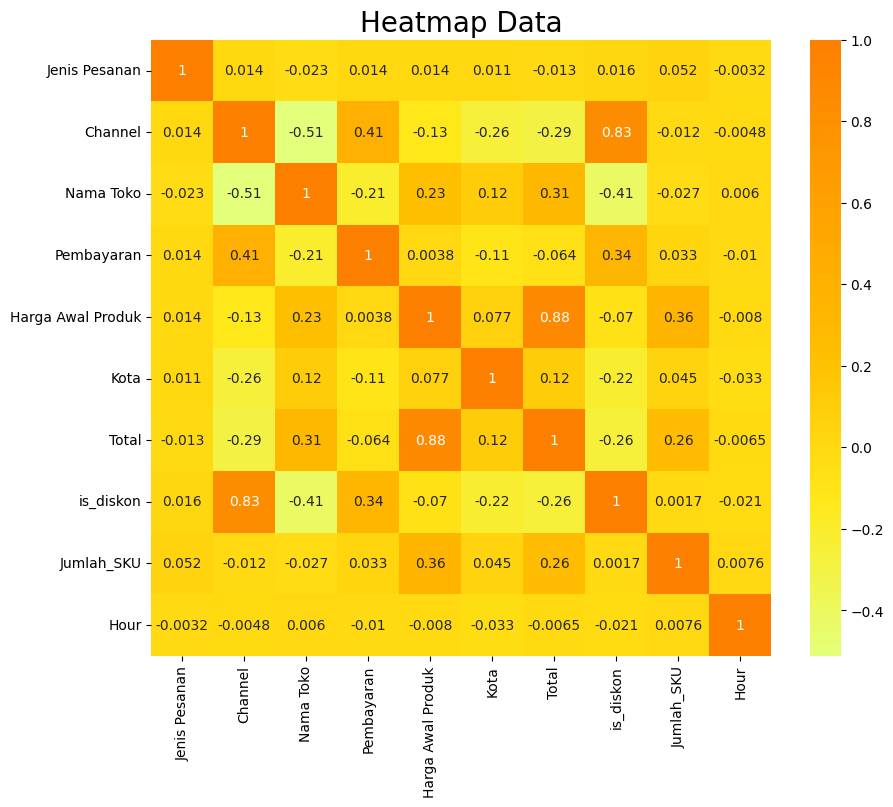

In [ ]:
korelasi = df_cluster.corr()
plt.figure(figsize=(10,8))
sns.heatmap(korelasi, cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

## StandarScaler

In [ ]:
scaler = StandardScaler()
df_cluster[['Jenis Pesanan','Channel','Nama Toko','Pembayaran','Harga Awal Produk','Total','is_diskon','Jumlah_SKU','Hour','Kota']] = scaler.fit_transform(df_cluster[['Jenis Pesanan','Channel','Nama Toko','Pembayaran','Harga Awal Produk','Total','is_diskon','Jumlah_SKU','Hour','Kota']])
df_cluster.head()

Jenis Pesanan   Channel  Nama Toko  Pembayaran  Harga Awal Produk  \
0      -0.081786  0.505092  -0.674892    0.908958           1.160079   
1      -0.081786 -1.979839   0.274372   -4.599495          -0.438874   
2      -0.081786  0.505092   1.223636   -0.063122          -0.546681   
3      -0.081786  0.505092   1.223636   -0.063122          -0.438874   
4      -0.081786  0.505092  -0.674892   -0.063122          -0.367183   

       Kota     Total  is_diskon  Jumlah_SKU      Hour  
0  0.458371  1.221015   0.604451    0.104016 -0.357606  
1  0.524177 -0.290720  -1.654394   -0.624096 -0.528241  
2  0.803852 -0.509557   0.604451   -0.624096 -0.869511  
3  0.803852 -0.393389   0.604451   -0.624096 -1.040146  
4  0.836755 -0.346484   0.604451    0.104016 -0.186972

## Modelling Cluster With KMeans

In [ ]:
cluster = KMeans(n_clusters=3, random_state = 42)
cluster.fit(df_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [ ]:
segment = pd.Series(cluster.labels_, name="segment")
data_segment = pd.concat([df_cluster, segment], axis=1)
data_segment.head(10)

Jenis Pesanan   Channel  Nama Toko  Pembayaran  Harga Awal Produk  \
0      -0.081786  0.505092  -0.674892    0.908958           1.160079   
1      -0.081786 -1.979839   0.274372   -4.599495          -0.438874   
2      -0.081786  0.505092   1.223636   -0.063122          -0.546681   
3      -0.081786  0.505092   1.223636   -0.063122          -0.438874   
4      -0.081786  0.505092  -0.674892   -0.063122          -0.367183   
5      -0.081786  0.505092  -0.674892   -0.063122          -0.438874   
6      -0.081786  0.505092  -0.674892   -0.063122          -0.546681   
7      -0.081786  0.505092   1.223636    0.908958          -0.510745   
8      -0.081786  0.505092  -0.674892   -0.063122          -0.438874   
9      -0.081786  0.505092  -0.674892    1.232985          -0.474989   

       Kota     Total  is_diskon  Jumlah_SKU      Hour  segment  
0  0.458371  1.221015   0.604451    0.104016 -0.357606      0.0  
1  0.524177 -0.290720  -1.654394   -0.624096 -0.528241      1.0  
2  0.803852 -0.509557   0.604451   -0.624096 -0.869511      0.0  
3  0.803852 -0.393389   0.604451   -0.624096 -1.040146      0.0  
4  0.836755 -0.346484   0.604451    0.104016 -0.186972      0.0  
5  0.392565 -0.400141   0.604451   -0.624096 -1.040146      0.0  
6 -2.519348 -0.512254   0.604451   -0.624096  1.690011      0.0  
7 -1.499356 -0.476712   0.604451   -0.624096  1.690011      0.0  
8  0.524177 -0.400141   0.604451   -0.624096  0.836837      0.0  
9  0.359662 -0.439285   0.604451   -0.624096  0.666202      0.0

## Evaluasi Model Cluster Dengan Elbow Method

In [ ]:
Sum_of_squared_error = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state = 42)
    km = km.fit(df_cluster)
    Sum_of_squared_error.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

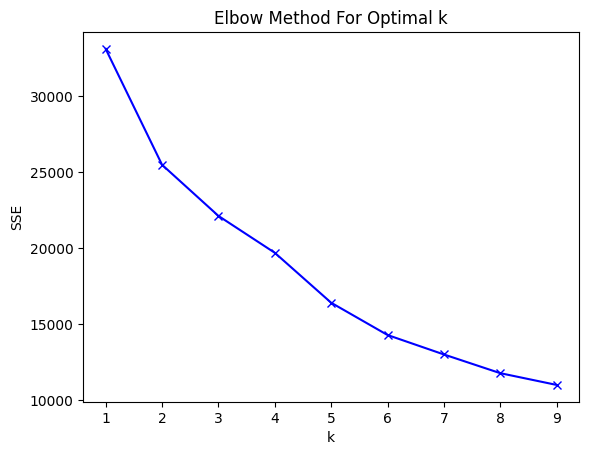

In [ ]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

## Evaluasi Model Cluster Dengan Silohoute Score

In [ ]:
range_n_clusters = range(2, 10)
best_score = -1
best_k = -1

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters, random_state = 42)
    preds = clusterer.fit_predict(df_cluster)
    score = silhouette_score(df_cluster, preds, random_state = 42)

    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    if score > best_score:
        best_score = score
        best_k = n_clusters

print("Best silhouette score is {} for n_clusters = {}".format(best_score, best_k))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2, silhouette score is 0.3732048027687672


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3, silhouette score is 0.35596314592670597


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4, silhouette score is 0.2251421223704929


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 5, silhouette score is 0.2391074544812385


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 6, silhouette score is 0.25832181154583567


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 7, silhouette score is 0.21800851870128501


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 8, silhouette score is 0.23190200802487226


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 9, silhouette score is 0.24118745100743488
Best silhouette score is 0.3732048027687672 for n_clusters = 2


Dari hasil evaluasi di atas penerapan random_state sudah digunakan agar nilai tidak berubah ubah, hasil kemiringan sudut pada metode Elbow dan Score Silohoute Score terbaik adalah di 2. maka n_cluster yang digunakan adalah 2

## Ulang Membuat Modelling Kmeans Cluster Sesuai Dengan Evaluasi n_cluster terbaik (n_cluster=2)

In [ ]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=2, random_state = 42)
cluster.fit(df_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2, random_state=42)

## Combine Data + Segment

In [ ]:
segment = pd.Series(cluster.labels_, name="segment")
df_segment = pd.concat([df, segment], axis=1)

## Exploratory Data Analyst Setelah Cluster

In [ ]:
df_segment.head()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan  \
0  2024-05-15 09:32:00   2024-05-15 09:35:00  14-05-2024 11:29   
1  2024-05-14 17:45:00   2024-05-14 13:09:00  14-05-2024 10:19   
2  2024-05-15 06:05:00   2024-05-15 06:05:00  14-05-2024 08:16   
3  2024-05-15 11:22:00   2024-05-15 11:27:00  14-05-2024 07:34   
4  2024-05-14 14:03:00   2024-05-14 14:09:00  13-05-2024 12:44   

    Jenis Pesanan    Channel Nama Toko      Pembayaran     Waktu Pembayaran  \
0  Pesanan Normal   Toko Ijo    Toko 1  Online Payment  2024-05-14 11:52:00   
1  Pesanan Normal  Toko Biru    Toko 2          Bank 1  2024-05-14 10:19:00   
2  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet  2024-05-14 08:16:00   
3  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet  2024-05-14 07:34:00   
4  Pesanan Normal   Toko Ijo    Toko 1  Digital Wallet  2024-05-13 12:45:00   

      Waktu Pengiriman   Waktu Penyelesaian       Variant Produk  \
0  2024-05-14 13:40:00  2024-05-15 09:32:00  COMBO (500ML+330ML)   
1  2024-05-14 13:40:00  2024-05-15 09:32:00                  1PC   
2  2024-05-14 13:40:00  2024-05-15 06:05:00                  1pc   
3  2024-05-14 13:40:00  2024-05-15 11:22:00                  1pc   
4  2024-05-13 16:39:00  2024-05-14 14:03:00        100ML + 300ML   

   Harga Awal Produk  Total Berat(g)  Subtotal                  Kota  \
0           989800.0           650.0  890820.0            Kota Depok   
1            99900.0           250.0   99900.0  Kota Jakarta Selatan   
2            39900.0           250.0   39900.0         Kota Surabaya   
3            99900.0           250.0   99900.0         Kota Surabaya   
4           139800.0           500.0  128616.0        Kota Tangerang   

      Total  Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli  Asuransi  \
0  829152.0               0.0                         29500.0       0.0   
1  135800.0           35000.0                             0.0     900.0   
2   35431.0               0.0                             0.0       0.0   
3   88711.0               0.0                             0.0       0.0   
4  110224.0               0.0                             0.0       0.0   

   Total Diskon  Biaya Komisi  Biaya Layanan  Ongkir Dibayar Sistem  \
0           0.0      -35633.0       -26035.0               -29500.0   
1       23993.0           0.0            0.0                    0.0   
2           0.0       -1596.0        -2873.0                    0.0   
3           0.0       -3996.0        -7193.0                    0.0   
4           0.0      -10932.0        -7460.0                    0.0   

   Potongan Biaya Pengiriman  Koin  Voucher Channel  Diskon Penjual  \
0                    20000.0   0.0          89082.0             0.0   
1                    17000.0   0.0           6993.0             0.0   
2                     9000.0   0.0              0.0             0.0   
3                     6500.0   0.0              0.0             0.0   
4                     9000.0   0.0          19293.0             0.0   

         Alasan Pembatalan  SKU_1  SKU_2  SKU_3  SKU_4  SKU_5  SKU_6  SKU_7  \
0  Others / change of mind  103.0  105.0    NaN    NaN    NaN    NaN    NaN   
1  Others / change of mind   61.0    NaN    NaN    NaN    NaN    NaN    NaN   
2  Others / change of mind   62.0    NaN    NaN    NaN    NaN    NaN    NaN   
3  Others / change of mind   61.0    NaN    NaN    NaN    NaN    NaN    NaN   
4  Others / change of mind  137.0  139.0    NaN    NaN    NaN    NaN    NaN   

   SKU_8  SKU_9  SKU_10  SKU_11  SKU_12  \
0    NaN    NaN     NaN     NaN     NaN   
1    NaN    NaN     NaN     NaN     NaN   
2    NaN    NaN     NaN     NaN     NaN   
3    NaN    NaN     NaN     NaN     NaN   
4    NaN    NaN     NaN     NaN     NaN   

                                   ID Pesanan Hashed is_diskon  Jumlah_SKU  \
0  747909763bd0341883eb2726872231248ee39bdf9d6fbf...        Ya         2.0   
1  d85e99b5b5713d2cbdfaba295c3d2041d820a6b01c40bf...     Tidak         1.0   
2  e1749e58062288683

In [ ]:
df_segment['segment'].value_counts()

segment
1.0    2634
0.0     677
Name: count, dtype: int64

## ANALISIS DAN SEGMENTASI PELANGGAN

### Analisis Jumlah Pelanggan Tiap Cluster

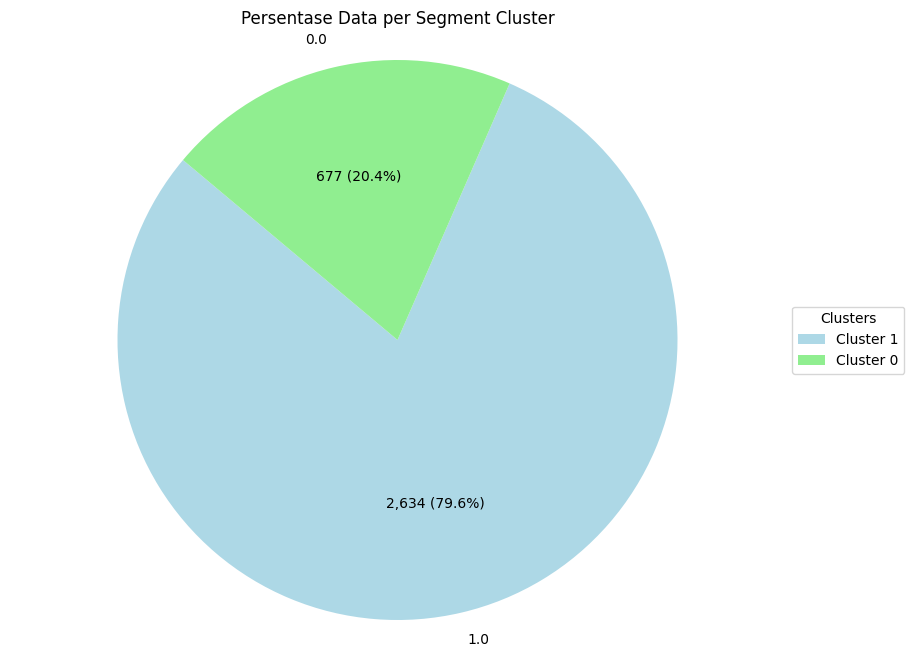

In [ ]:

# Menghitung jumlah orang yang masuk ke setiap segmen
segment_counts = df_segment['segment'].value_counts()

# Definisikan warna untuk setiap cluster
colors = ['lightblue', 'lightgreen']  # Cluster 1: Biru, Cluster 0: Hijau

# Visualisasi dengan grafik pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Menambahkan anotasi
plt.legend(wedges, ['Cluster 1', 'Cluster 0'], title="Clusters", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Menambahkan nilai pasti di dalam plotting
for i, text in enumerate(autotexts):
    text.set_text(f'{segment_counts.values[i]:,.0f} ({text.get_text()})')

plt.title('Persentase Data per Segment Cluster')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Dari hasil visualisasi di atas, dapat dilihat bahwa jumlah pesanan pada Cluster 1 jauh lebih banyak dibandingkan dengan Cluster 0. Cluster 1 memiliki 2.634 pesanan, sedangkan Cluster 0 hanya memiliki 677 pesanan. Dengan kata lain, jumlah pesanan di Cluster 1 empat kali lipat lebih banyak dibandingkan dengan Cluster 0.

### Analisis Rata-rata Pengeluaran Tiap Cluster

<ipython-input-376-bec167a7f661>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




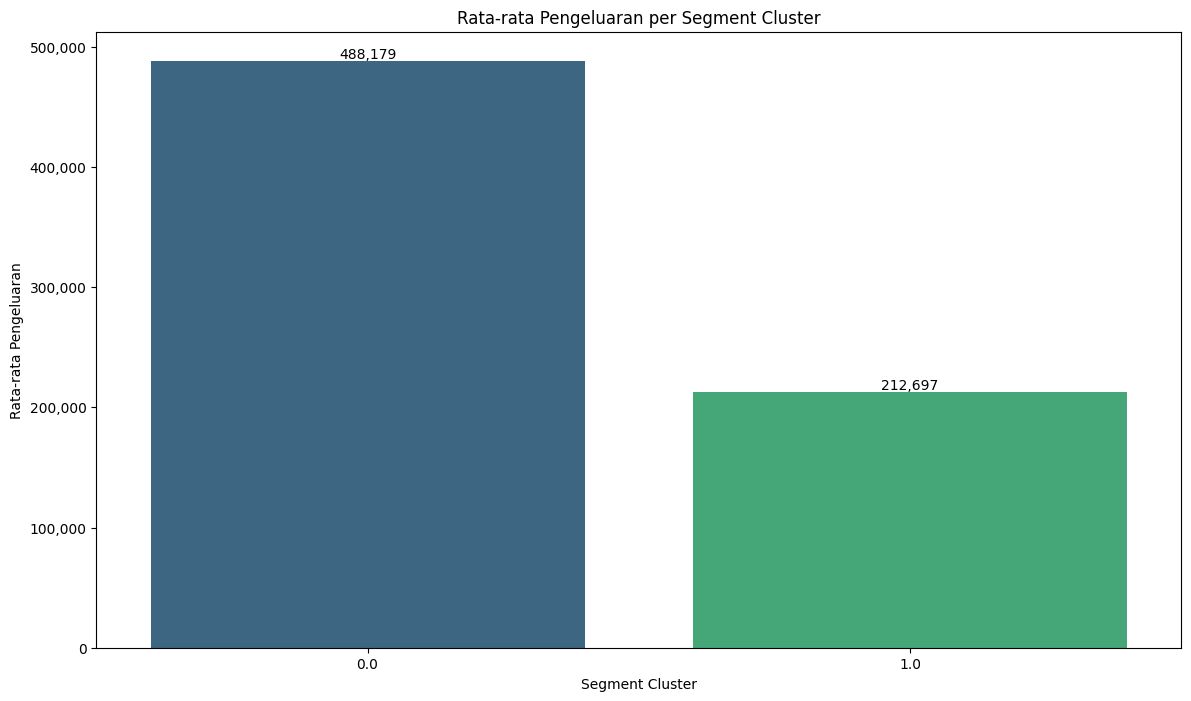

In [ ]:
# Menghitung rata-rata pengeluaran untuk setiap segmen
segment_avg_total = df_segment.groupby('segment')['Total'].mean()

# Visualisasi dengan grafik bar
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=segment_avg_total.index, y=segment_avg_total.values, palette='viridis')

# Menambahkan angka asli di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Segment Cluster')
plt.ylabel('Rata-rata Pengeluaran')
plt.title('Rata-rata Pengeluaran per Segment Cluster')

# Menetapkan formatter untuk sumbu Y
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))  # Menggunakan format angka tanpa desimal
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

Dapat terlihat bahwa jumlah pengeluaran rata-rata dari Cluster 0 jauh lebih besar daripada Cluster 1, yaitu sebesar Rp. 488.179, hampir dua kali lipat dari rata-rata pengeluaran di Cluster 1 yang hanya sebesar Rp. 212.697.

### Analisis Distribusi Cluster pada Channel yang ada


<Figure size 1400x1000 with 0 Axes>

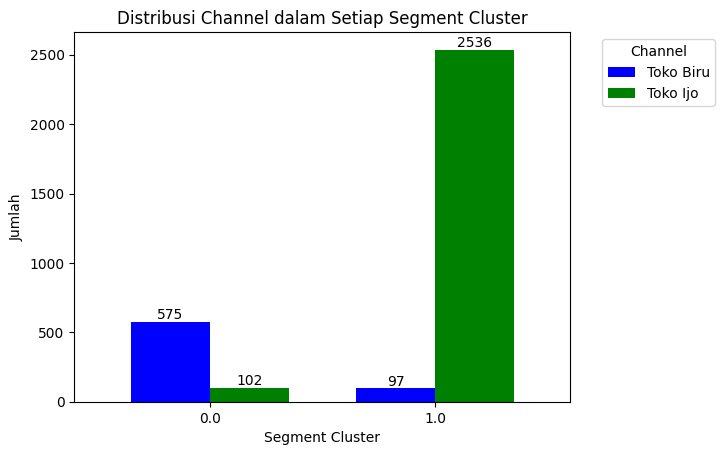

In [ ]:
# Mengelompokkan data berdasarkan segment dan channel, lalu menghitung jumlah kemunculan untuk setiap kombinasi
channel_segment_counts = df_segment.groupby(['segment', 'Channel']).size().unstack().fillna(0)

# Tentukan warna untuk setiap channel
colors = {'Toko Biru': 'blue', 'Toko Ijo': 'green'}

# Mengatur ukuran visualisasi dan lebar bar
plt.figure(figsize=(14, 10))
ax = channel_segment_counts.plot(kind='bar', stacked=False, color=[colors[col] for col in channel_segment_counts.columns], width=0.7)

# Menambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Label dan judul
plt.xlabel('Segment Cluster')
plt.ylabel('Jumlah')
plt.title('Distribusi Channel dalam Setiap Segment Cluster')
plt.xticks(rotation=0)
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Dari hasil visualisasi tersebut, terlihat bahwa mayoritas pembelian di Cluster 0 dilakukan di Toko Biru sebanyak 575 kali, sedangkan di Cluster 1 hanya 97 kali. Sebaliknya, di Cluster 1, rata-rata pembelian dilakukan di Toko Ijo dengan total penjualan sebanyak 2.536, sementara di Cluster 0 hanya 102 pembelian.

### Analisis Diskon Pada Tiap Cluster

<Figure size 1400x800 with 0 Axes>

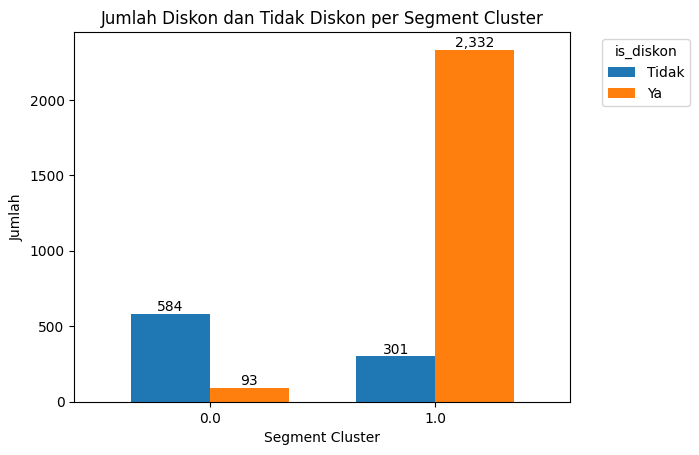

In [ ]:
# Mengelompokkan data berdasarkan segment dan is_diskon, lalu menghitung jumlah kemunculan untuk setiap kombinasi
discount_segment_counts = df_segment.groupby(['segment', 'is_diskon']).size().unstack().fillna(0)

# Mengatur ukuran visualisasi dan lebar bar
plt.figure(figsize=(14, 8))
ax = discount_segment_counts.plot(kind='bar', stacked=False, width=0.7)

# Menambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Label dan judul
plt.xlabel('Segment Cluster')
plt.ylabel('Jumlah')
plt.title('Jumlah Diskon dan Tidak Diskon per Segment Cluster')
plt.xticks(rotation=0)
plt.legend(title='is_diskon', labels=['Tidak', 'Ya'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Dari hasil visualisasi, dapat terlihat bahwa rata-rata pembeli di Cluster 0 tidak mendapatkan diskon, dengan 584 pembelian tanpa diskon dan hanya 93 pembelian dengan diskon. Sebaliknya, di Cluster 1, sebagian besar pembeli mendapatkan diskon, yaitu sebanyak 2.332 pembelian, sementara hanya sekitar 301 pembelian yang tidak mendapatkan diskon.

### Analisis Jam Pembelian Tiap Cluster

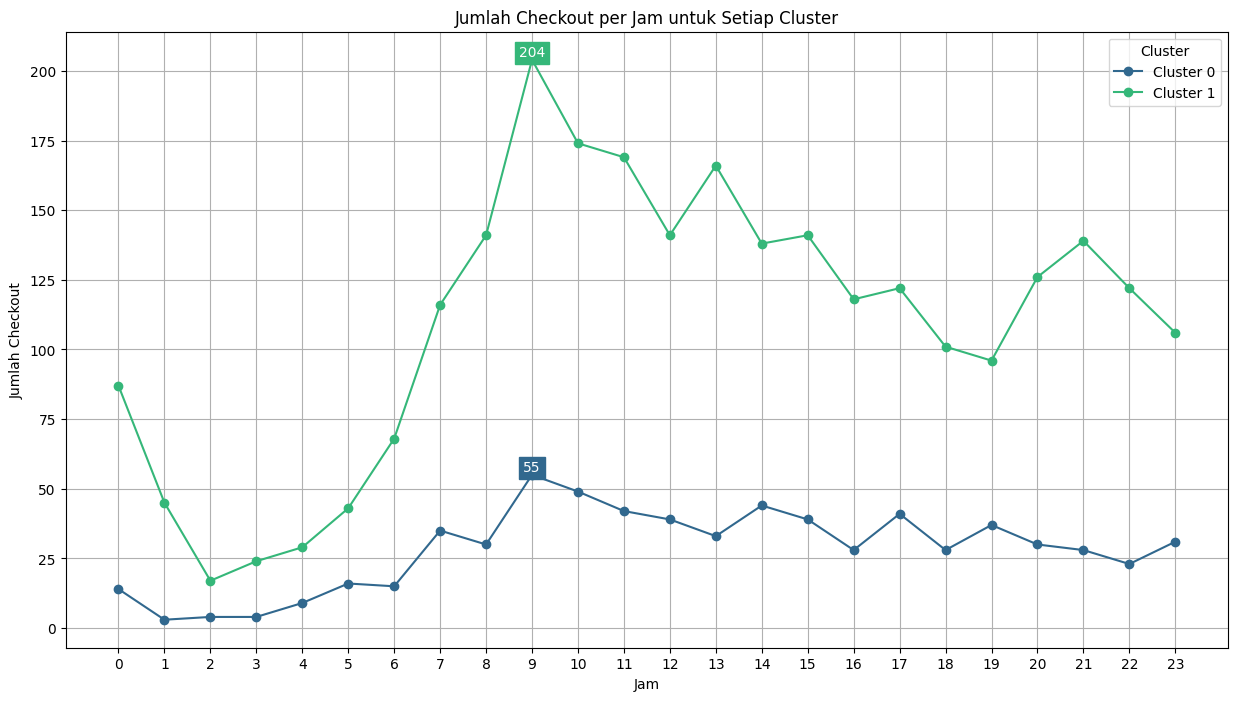

In [ ]:
# Prepare data for visualization
hourly_counts = df_segment.groupby(['segment', 'Hour']).size().unstack().fillna(0)
hourly_counts = hourly_counts.T

# Visualisasi
plt.figure(figsize=(15, 8))
colors = sns.color_palette("viridis", cluster.n_clusters)

for i in range(cluster.n_clusters):
    plt.plot(hourly_counts.index, hourly_counts[i], marker='o', color=colors[i], label=f'Cluster {i}')
    max_count = max(hourly_counts[i])
    max_index = hourly_counts[i].idxmax()
    if i == 2:
        plt.text(max_index, max_count+10, f'{int(max_count)}', fontsize=10, ha='center', va='bottom',
                 color='white', bbox=dict(facecolor=colors[i], edgecolor=colors[i], pad=3))
    else:
        plt.text(max_index, max_count, f'{int(max_count)}', fontsize=10, ha='center', va='bottom',
                 color='white', bbox=dict(facecolor=colors[i], edgecolor=colors[i], pad=3))

plt.title('Jumlah Checkout per Jam untuk Setiap Cluster')
plt.xlabel('Jam')
plt.ylabel('Jumlah Checkout')
plt.legend(title='Cluster')
plt.xticks(range(24))
plt.grid(True)
plt.show()

Dari hasil visualisasi di atas, dapat dilihat bahwa baik di Cluster 0 maupun Cluster 1, kebanyakan pembelian dilakukan pada pukul 09.00 – 10.00. Pada Cluster 0, jumlah pembelian pada jam tersebut adalah sekitar 55 penjualan, sedangkan di Cluster 1 mencapai 204 penjualan. Hal ini mungkin terjadi karena pembeli mungkin melakukan checkout pada sela sela pekerjaan atau istirahat pertama, dan ingin memastikan pesanan mereka dapat diproses dan dikemas sebelum jam 12.

### Analisis Metode Pembayaran Tiap Cluster

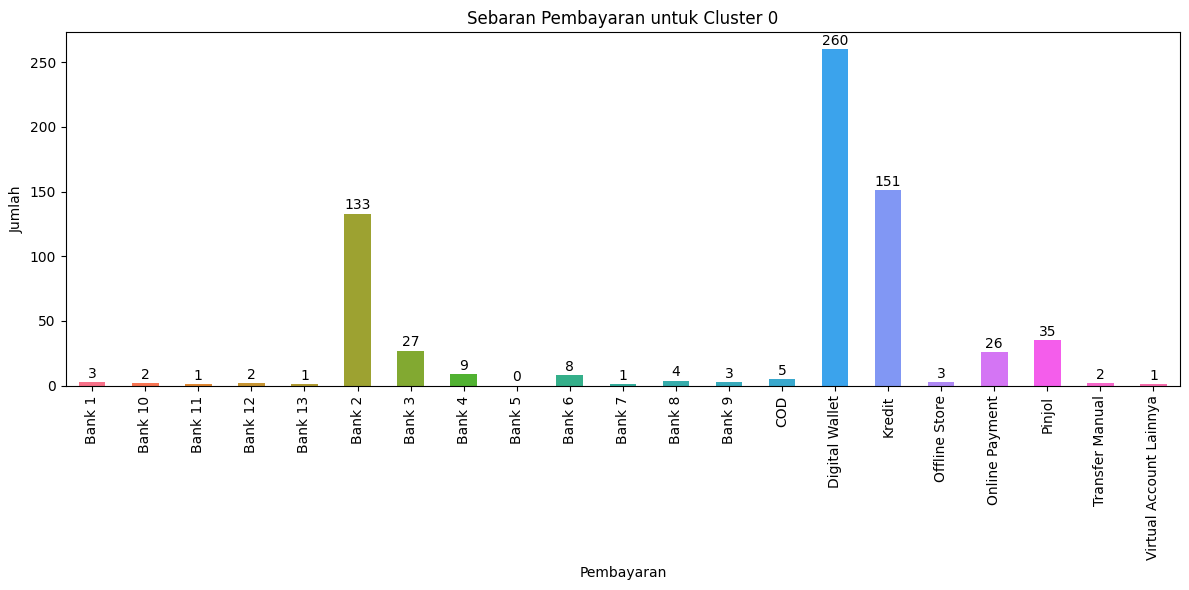

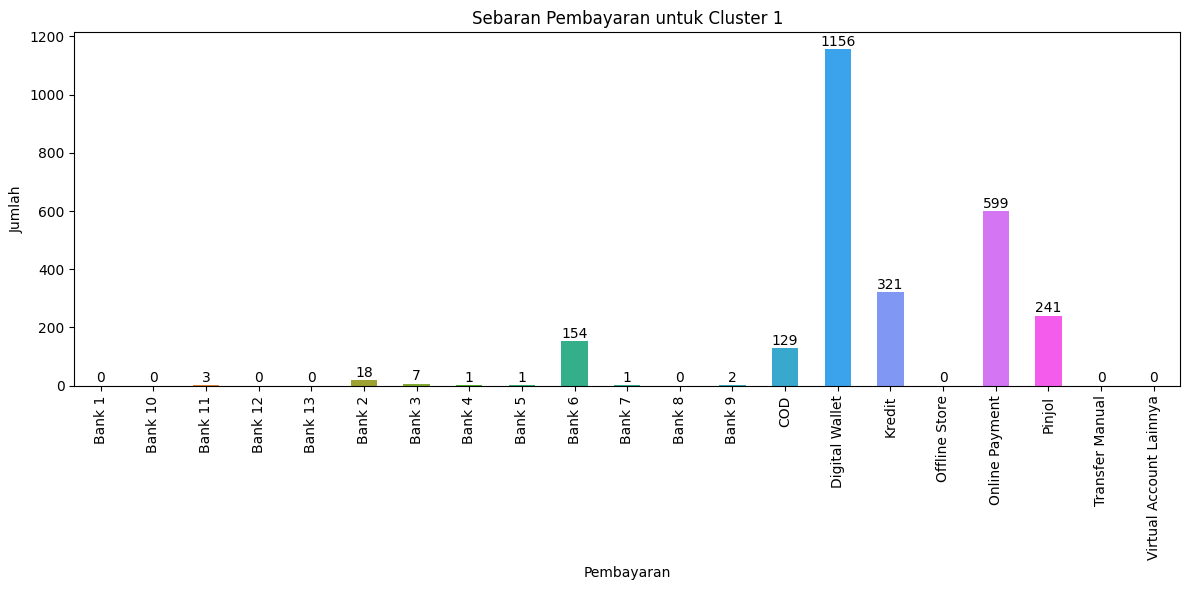

In [ ]:
# Mengelompokkan data berdasarkan cluster dan Pembayaran, lalu menghitung jumlah pembelian untuk setiap kombinasi
payment_cluster_counts = df_segment.groupby(['Pembayaran', 'segment']).size().unstack().fillna(0)

# Plotting barplot untuk Cluster 0
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(payment_cluster_counts.index))
payment_cluster_counts[0].plot(kind='bar', color=palette)
for index, value in enumerate(payment_cluster_counts[0]):
    plt.text(index, value + 1, f'{int(value)}', ha='center', va='bottom')
plt.xlabel('Pembayaran')
plt.ylabel('Jumlah')
plt.title('Sebaran Pembayaran untuk Cluster 0')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting barplot untuk Cluster 1
plt.figure(figsize=(12, 6))
payment_cluster_counts[1].plot(kind='bar', color=palette)
for index, value in enumerate(payment_cluster_counts[1]):
    plt.text(index, value + 1, f'{int(value)}', ha='center', va='bottom')
plt.xlabel('Pembayaran')
plt.ylabel('Jumlah')
plt.title('Sebaran Pembayaran untuk Cluster 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Dari hasil visualisasi sebaran metode pembayaran, terlihat bahwa baik di Cluster 0 maupun Cluster 1, penggunaan Digital Wallet menjadi yang paling banyak digunakan. Namun, pada Cluster 0, metode pembayaran Kredit menduduki posisi kedua tertinggi, sementara pada Cluster 1, posisi kedua diisi oleh pembayaran online.

Pada Cluster 0, penggunaan metode pembayaran melalui Bank 2 dan Bank 3 cukup signifikan, sementara pada Cluster 1, Bank 6 menjadi salah satu yang cukup banyak digunakan. Selain itu, metode pembayaran Cash on Delivery (COD) juga cukup populer di Cluster 1.

Pada Cluster 0, pola pembayaran cenderung lebih beragam, dengan beberapa metode pembayaran yang tidak digunakan pada Cluster 1, seperti Bank 1, Bank 10, Bank 12, Bank 13, Bank 8, pembayaran melalui toko offline, dan transfer manual. Hal ini menunjukkan variasi yang lebih besar dalam preferensi pembayaran di antara pelanggan Cluster 0


### Analisis Top 5 SKU tiap CLuster

<ipython-input-381-27861ad2ca25>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-381-27861ad2ca25>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




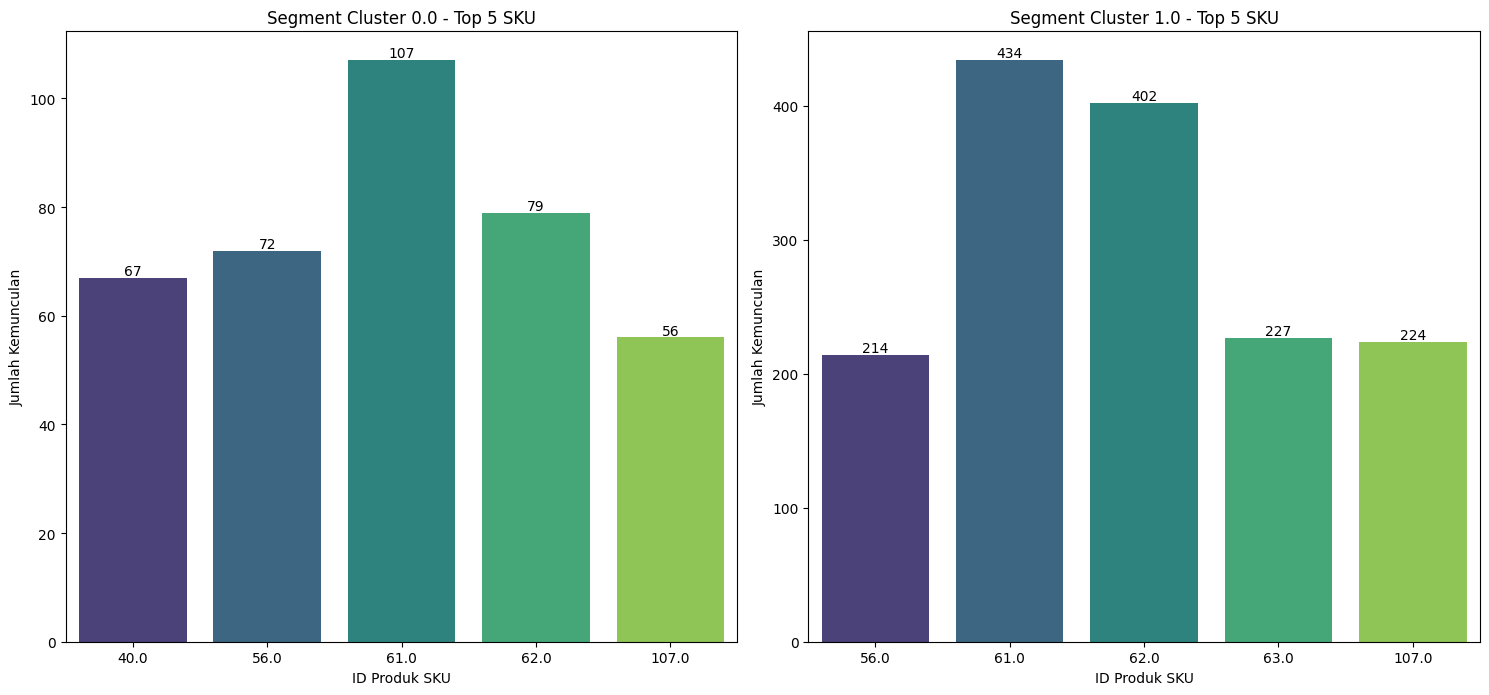

In [ ]:
# Melt SKU columns into one DataFrame
sku_columns = [f'SKU_{i}' for i in range(1, 13)]
sku_df = df_segment.melt(id_vars=['segment'], value_vars=sku_columns, var_name='SKU_Column', value_name='SKU')

# Hitung jumlah kemunculan setiap SKU dalam setiap segment cluster
sku_counts = sku_df.groupby(['segment', 'SKU']).size().unstack(fill_value=0)

# Pilih top 5 SKU untuk setiap segment cluster
top_skus = sku_counts.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)

plt.figure(figsize=(15, 20))

for i, segment_cluster in enumerate(top_skus.index):
    plt.subplot(3, 2, i+1)
    ax = sns.barplot(x=top_skus.loc[segment_cluster], y=sku_counts.loc[segment_cluster, top_skus.loc[segment_cluster]], palette='viridis')

    # Menambahkan angka pasti di atas setiap bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title(f'Segment Cluster {segment_cluster} - Top 5 SKU')
    plt.xlabel('ID Produk SKU')
    plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.show()


Hasil visualisasi menunjukkan bahwa baik Cluster 0 maupun Cluster 1 memiliki angka penjualan tertinggi pada ID Produk SKU 61, dan peringkat kedua diisi oleh ID Produk SKU 62. Namun, terdapat perbedaan dalam preferensi produk antara kedua cluster tersebut.

Pada Cluster 0, terlihat cukup banyak minat pada ID produk 40, sementara pada Cluster 1, ID produk 63 terlihat cukup diminati. Hal ini menunjukkan perbedaan preferensi atau tren pembelian antara kedua cluster tersebut.


### Analisis Kota Pesanan Tiap Cluster

<ipython-input-382-96512760bdaf>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-382-96512760bdaf>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




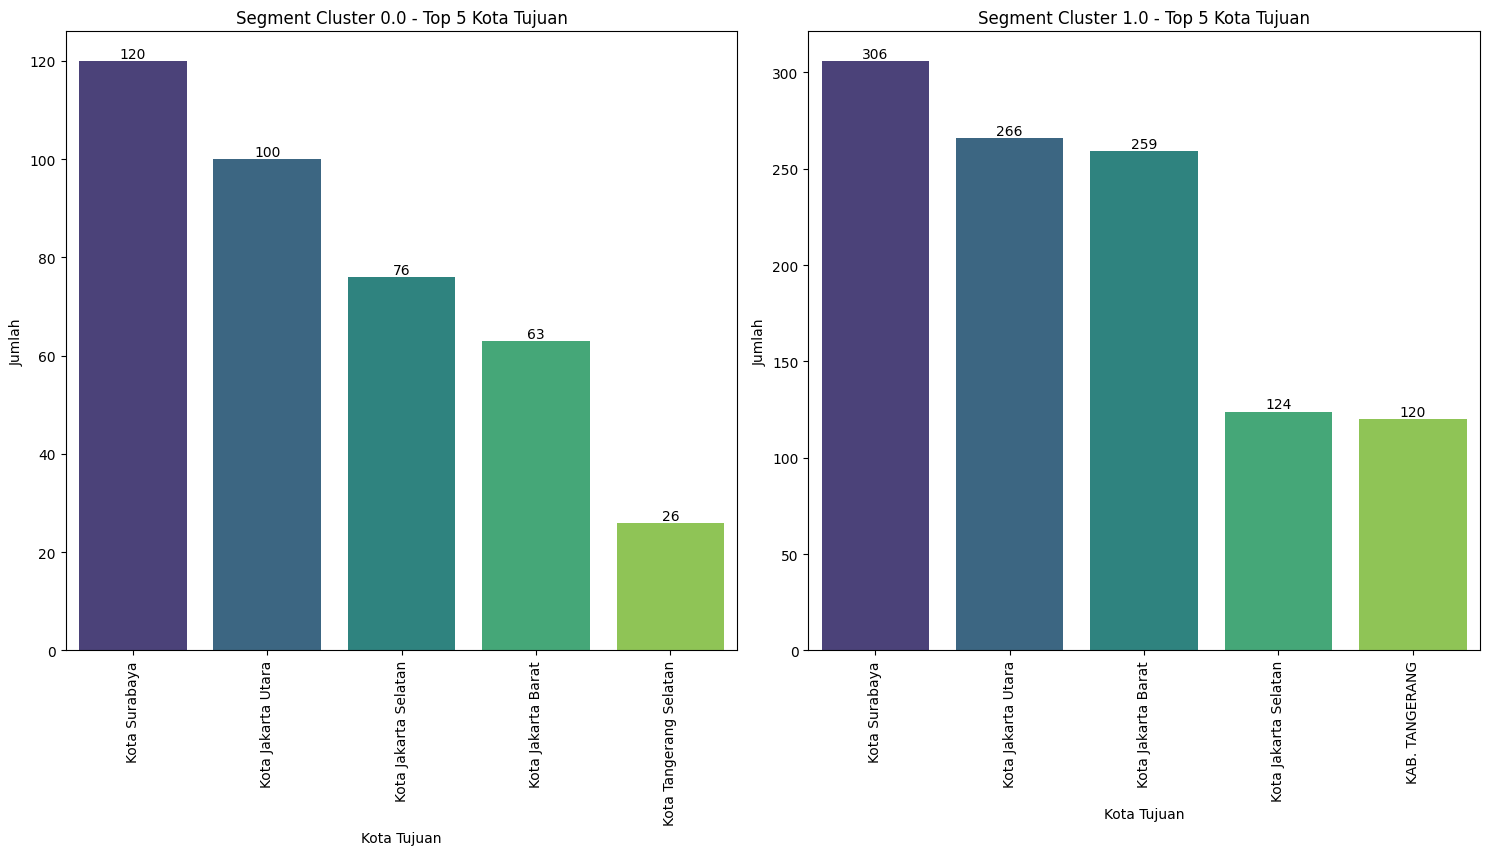

In [ ]:
# Hitung jumlah kemunculan setiap kota dalam setiap segment cluster
city_counts = df_segment.groupby(['segment', 'Kota']).size().unstack(fill_value=0)

# Pilih top 5 kota untuk setiap segment cluster
top_cities = city_counts.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)

# Plotting
plt.figure(figsize=(15, 15))

for i, segment_cluster in enumerate(top_cities.index):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=top_cities.loc[segment_cluster], y=city_counts.loc[segment_cluster, top_cities.loc[segment_cluster]], palette='viridis')

    # Menambahkan angka pasti di atas setiap bar
    for index, value in enumerate(city_counts.loc[segment_cluster, top_cities.loc[segment_cluster]]):
        plt.text(index, value, str(value), ha='center', va='bottom')

    plt.title(f'Segment Cluster {segment_cluster} - Top 5 Kota Tujuan')
    plt.xlabel('Kota Tujuan')
    plt.ylabel('Jumlah')

    # Meluruskan label X
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Terlihat dari sebaran kota pengiriman dari setiap cluster, penjualan tertinggi terjadi di Kota Surabaya untuk kedua Cluster 0 maupun Cluster 1, dan Kota Jakarta Utara menduduki peringkat kedua dalam kedua cluster tersebut.
Untuk peringkat ketiga, pada Cluster 0, Kota Jakarta Selatan menjadi yang tertinggi, sedangkan pada Cluster 1, Kota Jakarta Barat menjadi yang tertinggi. Sedangkan untuk peringkat keempat, pada Cluster 0, Kota Jakarta Barat menduduki posisi tersebut, sementara pada Cluster 1, Kota Jakarta Selatan.

Sedangkan untuk peringkat kelima, pada Cluster 0, Kota Tangerang Selatan menjadi yang tertinggi, sementara pada Cluster 1, Kabupaten Tangerang menduduki posisi tersebut.


### Analisis Jenis Pesanan Tiap Cluster

In [ ]:
df_segment['Jenis Pesanan'].value_counts()

Jenis Pesanan
Pesanan Normal    3289
Pre-Order           22
Name: count, dtype: int64

<Figure size 1400x800 with 0 Axes>

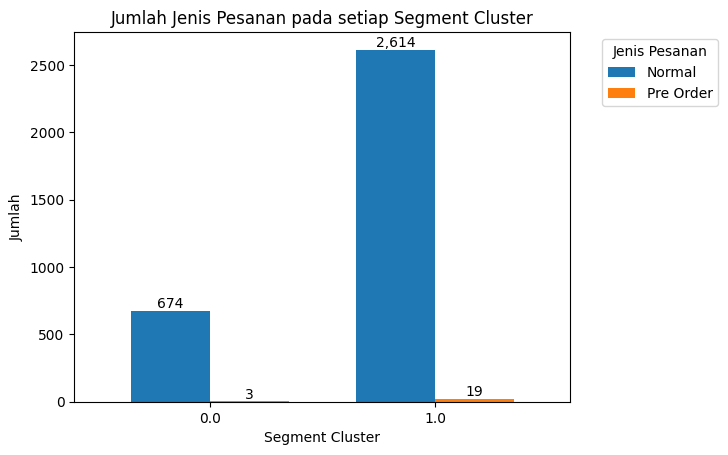

In [ ]:
# Mengelompokkan data berdasarkan segment dan Jenis Pesanan, lalu menghitung jumlah kemunculan untuk setiap kombinasi
discount_segment_counts = df_segment.groupby(['segment', 'Jenis Pesanan']).size().unstack().fillna(0)

# Mengatur ukuran visualisasi dan lebar bar
plt.figure(figsize=(14, 8))
ax = discount_segment_counts.plot(kind='bar', stacked=False, width=0.7)

# Menambahkan angka pasti di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Label dan judul
plt.xlabel('Segment Cluster')
plt.ylabel('Jumlah')
plt.title('Jumlah Jenis Pesanan pada setiap Segment Cluster')
plt.xticks(rotation=0)
plt.legend(title='Jenis Pesanan', labels=['Normal', 'Pre Order'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Dari hasil visualisasi, dapat terlihat bahwa sebagian besar pesanan adalah Pesanan Normal, dan pada setiap cluster baik cluster 0 maupun cluster 1 sama sama memiliki mayoritas pesanan Normal. Akan tetapi pada cluster 1 permintaan Pesanan Pre order 6x lipat lebih banyak dari cluster 0

## KESIMPULAN

CLUSTER 0
- Jumlahnya lebih sedikit dari cluster 1 (677)
- Rata-rata pengeluaranya 2x lipat dari cluster 1 (Rp. 488,179)
- Kebanyakan beli di Channel Toko Biru (575 transaksi)
- Kebanyakan tidak mendapatkan diskon atau potongan harga saat melakukan pembelian (584)
- Sama sama kebanyakan Checkout jam 9 – jam 10 pagi (55)
- Sama sama banyak melakukan Pembayaran melalui Digital wallet (260), tapi di cluster ini cukup banyak yang melakukan pembayaran pada Bank 2 dan Bank.
- Top ID SKU yang paling banyak terjual pada cluster ini adalah 61 (107) dan pada peringkat kedua adalah 62 (79), akan tetapi pada cluster 0 ini cukup meminati produk dengan kode 40
- Top Penjualan pada cluster 0 adalah Kota Surabaya (120), di lanjut dengan  Jakarta Utara (100), dan top 3 nya adalah Jakarta Selatan (76), lalu Jakarta Barat (63) dan yang terahir membedakan dari cluster 1 adalah Kota Tangerang Selatan (26)
- Pesanan Pre order hanya (3), jauh lebih sedikit dari cluster 1

CLUSTER 1
- Jumlahnya 4x lebih banyak dari cluster 0 (2634)
- Rata-rata pengeluaranya lebih sedikit dari cluster 0 (Rp. 212.697)
- Kebanyakan di Channel toko Ijo (2536 Transaksi)
- Kebanyakan mendapatkan diskon atau potongan harga saat melakukan pembelian (2332)
- Sama sama kebanyakan Checkout jam 9 – jam 10 (204)
- Sama sama melakukan pembayaran melalui digital wallet(1156) akan tetapi pembayaran COD, Pinjol, online payment dan Bank 6 cukup diminati.
- Top ID SKU yang paling banyak terjual pada cluster ini adalah 61 (434) dan pada peringkat kedua adalah 62 (402), akan tetapi pada cluster 0 ini cukup meminati produk dengan kode 63
- Top Penjualan pada Cluster 1 adalah Kota Surabaya (306), dilanjut dengan kota Jakarta Utara (266), lalu Jakarta Barat (259), lalu Jakarta Selatan (124), dan yang membedakan dengan cluster 0 adalah Kabupaten Tangerang (120)
- Pesanan Pre order ada (19) lebih banyak dari cluster 0


## SARAN BISNIS

CLUSTER 0
- Diberikan sebuah penawaran untuk program pre order dengan penawaran khusus untuk menguji minat pasar
- Perkuat kehadiran di Toko Biru untuk Cluster 0 dengan promosi eksklusif dan program loyalitas.
- Eksplorasi peluang untuk memberikan diskon yang tersegmentasi di Cluster 0 untuk melihat respons pasar terhadap potongan harga.
- Beri notifikasi di pagi hari dan diskon pagi hari untuk mendorong lebih banyak pembelian
- Lakukan promosi khusus untuk Tangerang Selatan di Cluster 0
- Perkenalkan lebih banyak produk premium di Cluster 0

CLUSTER 1
- Diberikan promo bundling atau promo diskon pada Cluster ini karena penjualan terbanyak dan Banyak yang menggunakan diskon ada pada cluster ini, selain itu jumlah pengeluaran yang kecil mungkin adalah tipe pembeli yang kelas menengah
- Perluas dan optimalkan channel Toko Ijo di Cluster 1 dengan penawaran diskon dan cashback.
- Perkuat kemitraan dengan penyedia digital wallet., dan mitra bank lain
- Beri notifikasi di pagi hari dan diskon pagi hari untuk mendorong lebih banyak pembelian
- Lakukan promosi khusus untuk warga Kabupaten Tangerang
- Di Cluster 1, pertahankan dan tingkatkan penawaran pre-order dengan insentif tambahan seperti diskon atau hadiah gratis.
- Perkenalkan Lebih banyak produk dengan harga terjangkau
- Ciptakan bundling produk dan penawaran spesial berdasarkan SKU terpopuler di setiap cluster.



# ***FORECASTING*** (Model Prediksi Penjualan Kedepan) : Rancangan Sebuah Model untuk dapat memprediksi revenue penjualan perusahaan kedepan

## Exploratory Data Analyst

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv(path_data + 'Data_Feature_Add_Column.csv')

In [ ]:
df.head()

Waktu Pembaruan Sinkronisasi Terakhir Tanggal Pembuatan  \
0  2024-05-15 09:32:00   2024-05-15 09:35:00  14-05-2024 11:29   
1  2024-05-14 17:45:00   2024-05-14 13:09:00  14-05-2024 10:19   
2  2024-05-15 06:05:00   2024-05-15 06:05:00  14-05-2024 08:16   
3  2024-05-15 11:22:00   2024-05-15 11:27:00  14-05-2024 07:34   
4  2024-05-14 14:03:00   2024-05-14 14:09:00  13-05-2024 12:44   

    Jenis Pesanan    Channel Nama Toko      Pembayaran     Waktu Pembayaran  \
0  Pesanan Normal   Toko Ijo    Toko 1  Online Payment  2024-05-14 11:52:00   
1  Pesanan Normal  Toko Biru    Toko 2          Bank 1  2024-05-14 10:19:00   
2  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet  2024-05-14 08:16:00   
3  Pesanan Normal   Toko Ijo    Toko 3  Digital Wallet  2024-05-14 07:34:00   
4  Pesanan Normal   Toko Ijo    Toko 1  Digital Wallet  2024-05-13 12:45:00   

      Waktu Pengiriman   Waktu Penyelesaian       Variant Produk  \
0  2024-05-14 13:40:00  2024-05-15 09:32:00  COMBO (500ML+330ML)   
1  2024-05-14 13:40:00  2024-05-15 09:32:00                  1PC   
2  2024-05-14 13:40:00  2024-05-15 06:05:00                  1pc   
3  2024-05-14 13:40:00  2024-05-15 11:22:00                  1pc   
4  2024-05-13 16:39:00  2024-05-14 14:03:00        100ML + 300ML   

   Harga Awal Produk  Total Berat(g)  Subtotal  \
0           989800.0           650.0  890820.0   
1            99900.0           250.0   99900.0   
2            39900.0           250.0   39900.0   
3            99900.0           250.0   99900.0   
4           139800.0           500.0  128616.0   

                                Kota     Total  Biaya Pengiriman  \
0                         KOTA DEPOK  829152.0               0.0   
1  Kota Administrasi Jakarta Selatan  135800.0           35000.0   
2                      KOTA SURABAYA   35431.0               0.0   
3                      KOTA SURABAYA   88711.0               0.0   
4                     KOTA TANGERANG  110224.0               0.0   

   Biaya Kirim Ditanggung Pembeli  Asuransi  Total Diskon  Biaya Komisi  \
0                         29500.0       0.0           0.0      -35633.0   
1                             0.0     900.0       23993.0           0.0   
2                             0.0       0.0           0.0       -1596.0   
3                             0.0       0.0           0.0       -3996.0   
4                             0.0       0.0           0.0      -10932.0   

   Biaya Layanan  Ongkir Dibayar Sistem  Potongan Biaya Pengiriman  Koin  \
0       -26035.0               -29500.0                    20000.0   0.0   
1            0.0                    0.0                    17000.0   0.0   
2        -2873.0                    0.0                     9000.0   0.0   
3        -7193.0                    0.0                     6500.0   0.0   
4        -7460.0                    0.0                     9000.0   0.0   

   Voucher Channel  Diskon Penjual        Alasan Pembatalan  SKU_1  SKU_2  \
0          89082.0             0.0  Others / change of mind  103.0  105.0   
1           6993.0             0.0  Others / change of mind   61.0    NaN   
2              0.0             0.0  Others / change of mind   62.0    NaN   
3              0.0             0.0  Others / change of mind   61.0    NaN   
4          19293.0             0.0  Others / change of mind  137.0  139.0   

   SKU_3  SKU_4  SKU_5  SKU_6  SKU_7  SKU_8  SKU_9  SKU_10  SKU_11  SKU_12  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   

                                   ID Pesanan Hashed is_diskon  Jumlah_SKU  \
0  747909763bd0341883eb2726872231248ee39bdf9d6fbf...        Ya           2   
1  d85e99b5b5713d2cb

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Waktu Pembaruan                 3312 non-null   object 
 1   Sinkronisasi Terakhir           3312 non-null   object 
 2   Tanggal Pembuatan               3312 non-null   object 
 3   Jenis Pesanan                   3312 non-null   object 
 4   Channel                         3312 non-null   object 
 5   Nama Toko                       3312 non-null   object 
 6   Pembayaran                      3312 non-null   object 
 7   Waktu Pembayaran                3312 non-null   object 
 8   Waktu Pengiriman                3312 non-null   object 
 9   Waktu Penyelesaian              3312 non-null   object 
 10  Variant Produk                  3312 non-null   object 
 11  Harga Awal Produk               3312 non-null   float64
 12  Total Berat(g)                  33

In [ ]:
df.describe()

Harga Awal Produk  Total Berat(g)      Subtotal         Total  \
count       3.312000e+03     3312.000000  3.312000e+03  3.312000e+03   
mean        3.444204e+05      690.570350  2.995986e+05  2.690407e+05   
std         5.567594e+05      942.898524  4.717736e+05  4.586806e+05   
min         1.490000e+03        1.000000  6.900000e+03 -5.180000e+04   
25%         9.990000e+04      250.000000  8.991000e+04  8.109900e+04   
50%         1.570790e+05      450.000000  1.656000e+05  1.414440e+05   
75%         2.999000e+05      850.000000  3.085300e+05  2.667502e+05   
max         5.499999e+06    10575.000000  5.499999e+06  5.506999e+06   

       Biaya Pengiriman  Biaya Kirim Ditanggung Pembeli      Asuransi  \
count       3312.000000                     3312.000000   3312.000000   
mean        4166.125302                     1986.790761    307.608696   
std        11291.118279                     7732.291009   1463.205034   
min       -35000.000000                        0.000000      0.000000   
25%            0.000000                        0.000000      0.000000   
50%            0.000000                        0.000000      0.000000   
75%            0.000000                        0.000000      0.000000   
max       130800.000000                   175000.000000  23200.000000   

       Total Diskon   Biaya Komisi  Biaya Layanan  Ongkir Dibayar Sistem  \
count  3.312000e+03    3312.000000    3312.000000            3312.000000   
mean   2.001975e+04  -11705.947464   -8665.690821           -2031.444444   
std    9.708864e+04   18486.404609   10260.866271            7805.711082   
min    0.000000e+00 -193135.000000  -95346.000000         -175000.000000   
25%    0.000000e+00  -14240.000000  -11768.500000               0.000000   
50%    8.000000e+03   -5526.500000   -5794.000000               0.000000   
75%    1.472850e+04   -1436.000000   -1771.500000               0.000000   
max    1.980000e+06       0.000000       0.000000               0.000000   

       Potongan Biaya Pengiriman           Koin  Voucher Channel  \
count                3312.000000    3312.000000      3312.000000   
mean                16871.062802    2854.043176      8340.477657   
std                 12966.854731   13643.414679     21186.891555   
min                     0.000000       0.000000         0.000000   
25%                  9000.000000       0.000000         0.000000   
50%                 14000.000000       0.000000         0.000000   
75%                 20000.000000       0.000000      9990.000000   
max                130800.000000  335855.000000    288889.000000   

       Diskon Penjual        SKU_1        SKU_2       SKU_3       SKU_4  \
count    3.312000e+03  3312.000000  1489.000000  637.000000  330.000000   
mean     1.356411e+04    64.773551    77.376763   76.751962   92.048485   
std      9.531442e+04    32.877973    33.833734   32.891589   42.448296   
min      0.000000e+00     0.000000     2.000000    0.000000    0.000000   
25%      0.000000e+00    52.000000    60.000000   59.000000   60.000000   
50%      0.000000e+00    61.000000    63.000000   63.000000   73.000000   
75%      1.000000e+04    77.000000   105.000000  105.000000  145.000000   
max      1.980000e+06   142.000000   148.000000  150.000000  151.000000   

            SKU_5       SKU_6       SKU_7       SKU_8       SKU_9      SKU_10  \
count  162.000000   99.000000   57.000000   31.000000   14.000000   11.000000   
mean    79.598765   79.707071   84.105263   89.709677   96.214286   66.727273   
std     39.033583   40.000575   38.686784   40.005994   36.723873   21.927567   
min      0.000000    5.000000   13.000000   13.000000   38.000000   21.000000   
25%     57.000000   56.000000   59.000000   63.500000   63.250000   59.000000   
50%     67.000000   63.000000   67.000000   67.000000   98.500000   67.000000   
75%    107.000000  107.000000  113.000000  139.500000  123.250000   72.500000   
max    150.000000  153.000000  150.000000  152.000000  154.000000  112.000000 

In [ ]:
df.isnull().sum()

Waktu Pembaruan                      0
Sinkronisasi Terakhir                0
Tanggal Pembuatan                    0
Jenis Pesanan                        0
Channel                              0
Nama Toko                            0
Pembayaran                           0
Waktu Pembayaran                     0
Waktu Pengiriman                     0
Waktu Penyelesaian                   0
Variant Produk                       0
Harga Awal Produk                    0
Total Berat(g)                       0
Subtotal                             0
Kota                                 0
Total                                0
Biaya Pengiriman                     0
Biaya Kirim Ditanggung Pembeli       0
Asuransi                             0
Total Diskon                         0
Biaya Komisi                         0
Biaya Layanan                        0
Ongkir Dibayar Sistem                0
Potongan Biaya Pengiriman            0
Koin                                 0
Voucher Channel          

## Feature Engineering

### Konversi Day ke datetime

In [ ]:
df['Day'] = pd.to_datetime(df['Day'])

### Menggabungkan semua Total Penjualan Pada Hari yang sama

In [ ]:
# Membuat df_forecast
df_forecast = df.groupby('Day')['Total'].sum().reset_index()
df_forecast

Day       Total
0  2024-02-15   6150932.0
1  2024-02-16   8176135.0
2  2024-02-17  11621019.0
3  2024-02-18   7301709.0
4  2024-02-19  10063115.0
5  2024-02-20   5993606.0
6  2024-02-21   7650572.0
7  2024-02-22   7252029.0
8  2024-02-23   3898784.0
9  2024-02-24   7943531.0
10 2024-02-25   5821067.0
11 2024-02-26   9720139.0
12 2024-02-27   5156214.0
13 2024-02-28   8372904.0
14 2024-02-29  12681442.0
15 2024-03-01   5395777.0
16 2024-03-02  25515242.0
17 2024-03-03  24089247.0
18 2024-03-04  15920258.0
19 2024-03-05  13160921.0
20 2024-03-06  12945627.0
21 2024-03-07   6172866.0
22 2024-03-08   3038301.0
23 2024-03-09   8767430.0
24 2024-03-10   7466233.0
25 2024-03-11   3844877.0
26 2024-03-12   8610235.0
27 2024-03-13  15277394.0
28 2024-03-14  13511585.0
29 2024-03-15  11662947.0
30 2024-03-16   7722936.0
31 2024-03-17   7561488.0
32 2024-03-18  15857124.0
33 2024-03-19  14069998.0
34 2024-03-20  12617839.0
35 2024-03-21  15004196.0
36 2024-03-22  13789136.0
37 2024-03-23  12174292.0
38 2024-03-24   6248982.0
39 2024-03-25  21655254.0
40 2024-03-26  12486580.0
41 2024-03-27  22328145.0
42 2024-03-28   9591824.0
43 2024-03-29  10483259.0
44 2024-03-30  19254898.0
45 2024-03-31  10977693.0
46 2024-04-01  18012713.0
47 2024-04-02  13687052.0
48 2024-04-03  18760625.0
49 2024-04-04  26294129.0
50 2024-04-05  12704326.0
51 2024-04-06   3957027.0
52 2024-04-07    244838.0
53 2024-04-08    283298.0
54 2024-04-12    459432.0
55 2024-04-13   5556179.0
56 2024-04-14   5396111.0
57 2024-04-15  13729337.0
58 2024-04-16   4072965.0
59 2024-04-17   8804031.0
60 2024-04-18   5528478.0
61 2024-04-19  12230230.0
62 2024-04-20  17196155.0
63 2024-04-21  16524996.0
64 2024-04-22   7445455.0
65 2024-04-23  11362620.0
66 2024-04-24   6848079.0
67 2024-04-25  15445071.0
68 2024-04-26   4108522.0
69 2024-04-27   6549975.0
70 2024-04-28   5791929.0
71 2024-04-29  13506147.0
72 2024-04-30   5503297.0
73 2024-05-01   8671480.0
74 2024-05-02   7263245.0
75 2024-05-03   9261377.0
76 2024-05-04  26054771.0
77 2024-05-05  24541091.0
78 2024-05-06  13597016.0
79 2024-05-07   4154695.0
80 2024-05-08   7220565.0
81 2024-05-09   5670220.0
82 2024-05-10  11730337.0
83 2024-05-11   3697115.0
84 2024-05-12   1087421.0
85 2024-05-13   1690155.0
86 2024-05-14   1414446.0

## Visualisasi Pendapatan Penjualan Harian

(pada grafiknya bisa di klik dan akan keluar deskripsi nya)

In [ ]:
figure = px.line(df_forecast, x = 'Day', y = 'Total', title = "Pendapatan Penjualan Harian")
figure.show()

## Menentukan Nilai d,p,q Untuk FORECASTING Model ARIMAX

### Mencari nilai d (Visualisasi)

<Figure size 640x480 with 0 Axes>

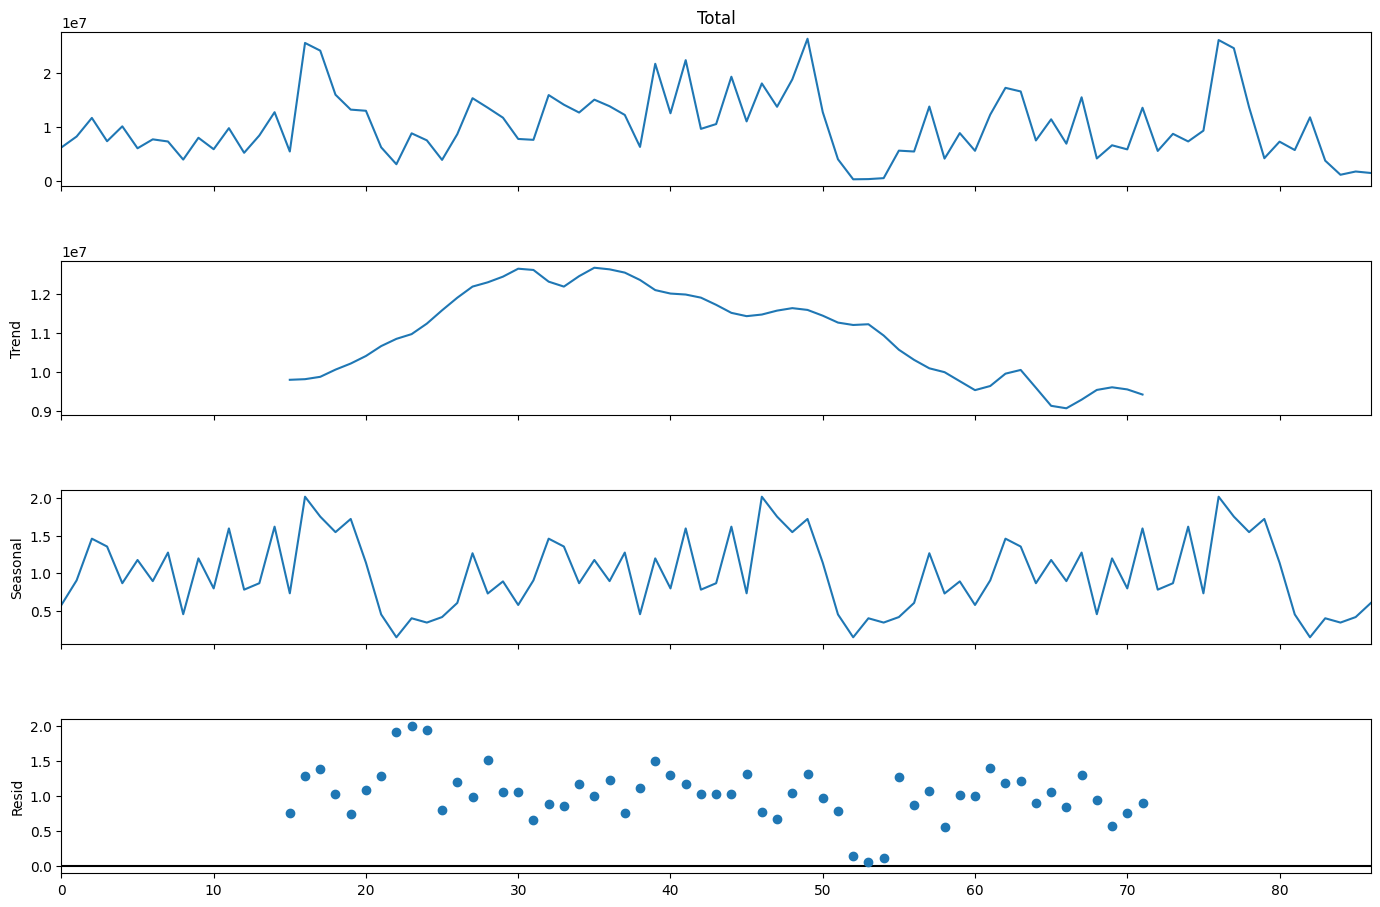

In [ ]:
result = seasonal_decompose(df_forecast['Total'], model = 'multiplicative', period = 30)
fig = plt.figure()
fig  = result.plot()
fig.set_size_inches(15,10)

Dari hasil visualisasi di atas, hasil dari lineplot kita itu sama dengan bagian visualiasi Seasonal

***maka nilai d nya = 1***

dan setelah itu mencari nilai p menggunakan plot (autocorrelation)

### Mencari Nilai p (Auto Correlation)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

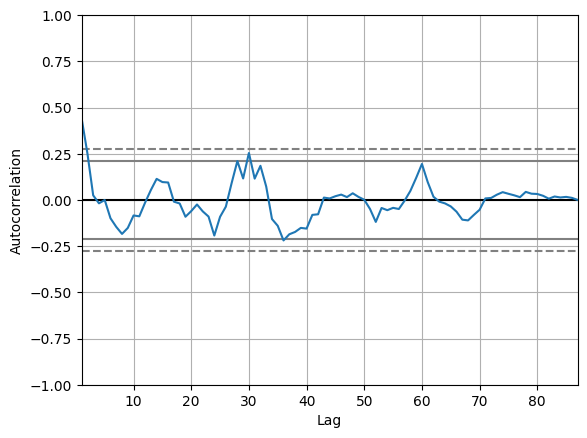

In [ ]:
pd.plotting.autocorrelation_plot(df_forecast['Total'])

karena hasil visualisasi kita memotong 4 garis

***maka nilai p = 4***

setelah itu Mencari nilai q menggunakan autocorrelation partial

### Mencari Nilai q (Auto Correlation Partial)

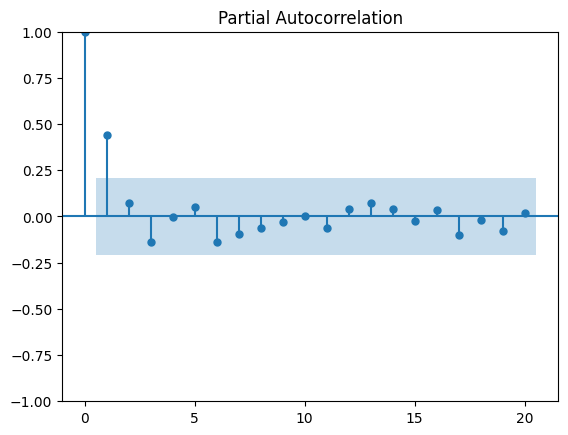

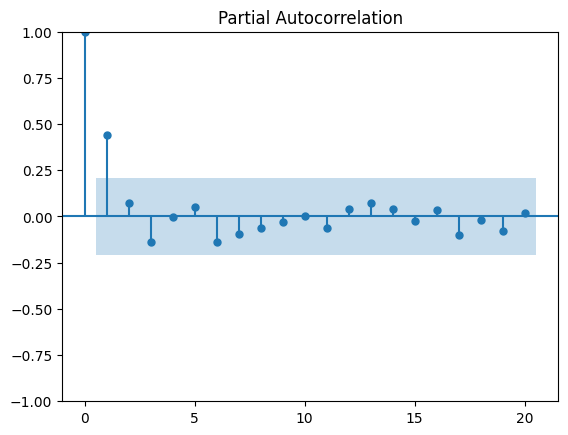

In [ ]:
plot_pacf(df_forecast['Total'], lags = 20) # lags = 20 adalah nilai tertinggi dari sumbu X adalah 20

Dari visualisasi dapat terlihat bahwa terdapat 2 titik yang paling jauh

***Maka nilai q = 2***

## Deklarasi Variable d,p,q

In [ ]:
d = 1 #(karena seasonal)
p = 4 #(karena memotong 4 garis)
q = 2 #(karena terdapat 2 titik yang terjauh)

## Membangun Model

In [ ]:
model = sm.tsa.statespace.SARIMAX(df_forecast['Total'],
                                 order=(3, d, q),  #(3 dapet dari nilai p yang tak kurangin 1), sebenarnya itu harusnya (p,d,q)
                                 seasonal_order=(p, d, q, 4))  # Lag musiman (p, d, q, 4)
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Total   No. Observations:                   87
Model:             SARIMAX(3, 1, 2)x(4, 1, 2, 4)   Log Likelihood               -1409.316
Date:                           Fri, 07 Jun 2024   AIC                           2842.632
Time:                                   03:14:44   BIC                           2871.513
Sample:                                        0   HQIC                          2854.227
                                            - 87                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3242      8.666      0.037      0.970     -16.661      17.309
ar.L2          0.1015      3.287      0.031

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



## Prediksi Model

In [ ]:
# Perkiraan Pendapatan 10 hari kedepan
predictions = model.predict(len(df_forecast), len(df_forecast)+9)
print(predictions)

87    5.326125e+06
88    5.151977e+06
89    7.315205e+06
90    4.571600e+06
91    5.071082e+06
92    7.653480e+06
93    8.580844e+06
94    5.205189e+06
95    3.566918e+06
96    3.750106e+06
Name: predicted_mean, dtype: float64


## Output Hasil Prediksi Model

In [ ]:

# Membuat DataFrame untuk prediksi
predicted_dates = pd.date_range(start=df_forecast['Day'].max() + pd.Timedelta(days=1), periods=len(predictions), freq='D')
predicted_df = pd.DataFrame({'Day': predicted_dates, 'Total': predictions})

# Menggabungkan DataFrame
combined_df = pd.concat([df_forecast, predicted_df], ignore_index=True)

# Visualisasi menggunakan Plotly Express
figure = px.line(combined_df, x='Day', y='Total', title="Pendapatan Penjualan Harian + prediksi 10 hari kedepan", template='plotly_white')

# Menandai area di bawah kurva prediksi dengan warna orange
figure.add_trace(go.Scatter(x=predicted_df['Day'].tolist() + predicted_df['Day'].tolist()[::-1],
                             y=predicted_df['Total'].tolist() + [0] * len(predicted_df),
                             fill='toself',
                             fillcolor='rgba(255, 165, 0, 0.2)',
                             line=dict(color='rgba(255, 165, 0, 0)'),
                             name='Prediksi'))

# Menambahkan annotation
figure.add_annotation(x=predicted_df['Day'].mean(), y=predicted_df['Total'].min(),
                      text="Prediksi",
                      showarrow=False,
                      font=dict(size=12, color="black"),
                      bgcolor="orange",
                      opacity=0.8,
                      xanchor="center", yanchor="top")

figure.show()

## KESIMPULAN
Dari hasil Visualisasi diatas dapat terlihat bahwa model forecasting dapat diimplementasikan, dan muncul prediksi Revenue penjualan 10 hari kedepan dimana titik tertinggi nya adalah di 21 Mei 2024 dengan pendapatan sekitar 8,5 Juta Rupiah